In [1]:
%load_ext ipycache
%load_ext autoreload
%autoreload 2

/miniconda3/lib/python3.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/miniconda3/lib/python3.7/site-packages/ipycache.py:17: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils.traitlets import Unicode


# Initialization
## Hyperparameters for discovery

In [2]:
adsorbate = 'OH'
target_energy = 1.23  # eV
# total_size_limit = 600
initial_training_size = 200
batch_size = 200
quantile_cutoff = 0.95

## Gather validation data

In [3]:
import random
import gzip
import shutil
import ase.db


# Connect to the database. If it hasn't been unzipped yet, then unzip it
db = ase.db.connect('gasdb.db')
if db.count() == 0:
    with gzip.open('gasdb.db.gz', 'rb') as f_in:
        with open('gasdb.db', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

# Grab the pointers to the data and shuffle
rows = list(db.select())
random.Random(42).shuffle(rows)


def parse_rows(rows):
    features = []
    labels = []
    surfaces = []
    
    for row in rows:
        features.append(row.id)
        data = row.data
        if data['adsorbate'] == adsorbate:
            labels.append(data['adsorption_energy'])
            surface = (data['mpid'], data['miller'], data['shift'], data['top'])
            surfaces.append(surface)
    
    return features, labels, surfaces


training_features, training_labels, training_surfaces = parse_rows(rows[:initial_training_size])
sampling_features, sampling_labels, sampling_surfaces = parse_rows(rows[initial_training_size:])

# Hallucinate
## Initialize

In [4]:
import sys
sys.path.insert(0, '../../')
from src.discoverers.adsorption.mms import MultiscaleDiscoverer


# Initialize
discoverer = MultiscaleDiscoverer(db_dir='.',
                                  target_energy=target_energy,
                                  quantile_cutoff=quantile_cutoff,
                                  batch_size=batch_size,
                                  training_features=training_features,
                                  training_labels=training_labels,
                                  training_surfaces=training_surfaces,
                                  sampling_features=sampling_features,
                                  sampling_labels=sampling_labels,
                                  sampling_surfaces=sampling_surfaces,
                                  init_train=True  # Set to `False` only for warm starts
                                 )

### Loading dataset: gasdb
### Loaded preprocessed data from:  ['./data.pt']
### Loading model: cgcnn
### Loaded CGCNN with 189121 parameters.
cmd:
  checkpoint_dir: /global/cfs/cdirs/m2755/ktran/sandbox/2020/catalyst-acquisitions/notebooks/MMS/checkpoints/2020-05-19-19-28-13-cnn
  identifier: cnn
  logs_dir: /global/cfs/cdirs/m2755/ktran/sandbox/2020/catalyst-acquisitions/notebooks/MMS/logs/2020-05-19-19-28-13-cnn
  print_every: 100
  results_dir: /global/cfs/cdirs/m2755/ktran/sandbox/2020/catalyst-acquisitions/notebooks/MMS/results/2020-05-19-19-28-13-cnn
  seed: null
  timestamp: 2020-05-19-19-28-13-cnn
dataset:
  src: .
  test_size: 0
  train_size: 1
  val_size: 0
logger: wandb
model: cgcnn
model_attributes:
  atom_embedding_size: 64
  fc_feat_size: 128
  num_fc_layers: 4
  num_graph_conv_layers: 6
optim:
  batch_size: 64
  lr_gamma: 0.1
  lr_initial: 0.001
  lr_milestones:
  - 25
  - 45
  max_epochs: 50
  warmup_epochs: 10
  warmup_factor: 0.2
task:
  dataset: gasdb
  description:

## Run

In [5]:
discoverer.simulate_discovery()

/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1824: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 201; dropping {'train/epoch': 0.14285714285714285, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 201; dropping {'train/epoch': 0.2857142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 201; dropping {'train/epoch': 0.42857142857142855, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 201; dropping {'train/epoch': 0.5714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 201; dropping {'train/epoch': 0.7142857142857143, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 201; dropping {'train/epoch': 0.8571428571428571, 'train

epoch: 1.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 11 < 201; dropping {'train/epoch': 1.5714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 12 < 201; dropping {'train/epoch': 1.7142857142857144, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 13 < 201; dropping {'train/epoch': 1.8571428571428572, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 14 < 201; dropping {'train/epoch': 2.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 15 < 201; dropping {'train/epoch': 2.142857142857143, 'train/loss': nan,

epoch: 2.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 18 < 201; dropping {'train/epoch': 2.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 19 < 201; dropping {'train/epoch': 2.7142857142857144, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 20 < 201; dropping {'train/epoch': 2.857142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 21 < 201; dropping {'train/epoch': 3.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 22 < 201; dropping {'train/epoch': 3.142857142857143, 'train/loss': nan, '

epoch: 3.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 25 < 201; dropping {'train/epoch': 3.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 26 < 201; dropping {'train/epoch': 3.7142857142857144, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 27 < 201; dropping {'train/epoch': 3.857142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 28 < 201; dropping {'train/epoch': 4.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 29 < 201; dropping {'train/epoch': 4.142857142857143, 'train/loss': nan, '

epoch: 4.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 32 < 201; dropping {'train/epoch': 4.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 33 < 201; dropping {'train/epoch': 4.714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 34 < 201; dropping {'train/epoch': 4.857142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 35 < 201; dropping {'train/epoch': 5.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 36 < 201; dropping {'train/epoch': 5.142857142857143, 'train/loss': nan, 't

epoch: 5.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 39 < 201; dropping {'train/epoch': 5.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 40 < 201; dropping {'train/epoch': 5.714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 41 < 201; dropping {'train/epoch': 5.857142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 42 < 201; dropping {'train/epoch': 6.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 43 < 201; dropping {'train/epoch': 6.142857142857143, 'train/loss': nan, 't

epoch: 6.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 46 < 201; dropping {'train/epoch': 6.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 47 < 201; dropping {'train/epoch': 6.714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 48 < 201; dropping {'train/epoch': 6.857142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 49 < 201; dropping {'train/epoch': 7.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 50 < 201; dropping {'train/epoch': 7.142857142857143, 'train/loss': nan, 't

epoch: 7.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 53 < 201; dropping {'train/epoch': 7.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 54 < 201; dropping {'train/epoch': 7.714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 55 < 201; dropping {'train/epoch': 7.857142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 56 < 201; dropping {'train/epoch': 8.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 57 < 201; dropping {'train/epoch': 8.142857142857142, 'train/loss': nan, 't

epoch: 8.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 60 < 201; dropping {'train/epoch': 8.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 61 < 201; dropping {'train/epoch': 8.714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 62 < 201; dropping {'train/epoch': 8.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 63 < 201; dropping {'train/epoch': 9.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 64 < 201; dropping {'train/epoch': 9.142857142857142, 'train/loss': nan, 't

epoch: 9.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 67 < 201; dropping {'train/epoch': 9.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 68 < 201; dropping {'train/epoch': 9.714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 69 < 201; dropping {'train/epoch': 9.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 70 < 201; dropping {'train/epoch': 10.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 71 < 201; dropping {'train/epoch': 10.142857142857142, 'train/loss': nan, 

epoch: 10.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 74 < 201; dropping {'train/epoch': 10.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 75 < 201; dropping {'train/epoch': 10.714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 76 < 201; dropping {'train/epoch': 10.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 77 < 201; dropping {'train/epoch': 11.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 78 < 201; dropping {'train/epoch': 11.142857142857142, 'train/loss': na

epoch: 11.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 81 < 201; dropping {'train/epoch': 11.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 82 < 201; dropping {'train/epoch': 11.714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 83 < 201; dropping {'train/epoch': 11.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 84 < 201; dropping {'train/epoch': 12.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 85 < 201; dropping {'train/epoch': 12.142857142857142, 'train/loss': na

epoch: 12.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 88 < 201; dropping {'train/epoch': 12.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 89 < 201; dropping {'train/epoch': 12.714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 90 < 201; dropping {'train/epoch': 12.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 91 < 201; dropping {'train/epoch': 13.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 92 < 201; dropping {'train/epoch': 13.142857142857142, 'train/loss': na

epoch: 13.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 95 < 201; dropping {'train/epoch': 13.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 96 < 201; dropping {'train/epoch': 13.714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 97 < 201; dropping {'train/epoch': 13.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 98 < 201; dropping {'train/epoch': 14.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 99 < 201; dropping {'train/epoch': 14.142857142857142, 'train/loss': na

epoch: 14.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 102 < 201; dropping {'train/epoch': 14.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 103 < 201; dropping {'train/epoch': 14.714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 104 < 201; dropping {'train/epoch': 14.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 105 < 201; dropping {'train/epoch': 15.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 106 < 201; dropping {'train/epoch': 15.142857142857142, 'train/loss

epoch: 15.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 109 < 201; dropping {'train/epoch': 15.571428571428571, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 110 < 201; dropping {'train/epoch': 15.714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 111 < 201; dropping {'train/epoch': 15.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 112 < 201; dropping {'train/epoch': 16.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 113 < 201; dropping {'train/epoch': 16.142857142857142, 'train/loss

epoch: 16.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 116 < 201; dropping {'train/epoch': 16.571428571428573, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 117 < 201; dropping {'train/epoch': 16.714285714285715, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 118 < 201; dropping {'train/epoch': 16.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 119 < 201; dropping {'train/epoch': 17.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 120 < 201; dropping {'train/epoch': 17.142857142857142, 'train/loss

epoch: 17.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 123 < 201; dropping {'train/epoch': 17.571428571428573, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 124 < 201; dropping {'train/epoch': 17.714285714285715, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 125 < 201; dropping {'train/epoch': 17.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 126 < 201; dropping {'train/epoch': 18.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 127 < 201; dropping {'train/epoch': 18.142857142857142, 'train/loss

epoch: 18.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 130 < 201; dropping {'train/epoch': 18.571428571428573, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 131 < 201; dropping {'train/epoch': 18.714285714285715, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 132 < 201; dropping {'train/epoch': 18.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 133 < 201; dropping {'train/epoch': 19.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 134 < 201; dropping {'train/epoch': 19.142857142857142, 'train/loss

epoch: 19.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 137 < 201; dropping {'train/epoch': 19.571428571428573, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 138 < 201; dropping {'train/epoch': 19.714285714285715, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 139 < 201; dropping {'train/epoch': 19.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 140 < 201; dropping {'train/epoch': 20.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 141 < 201; dropping {'train/epoch': 20.142857142857142, 'train/loss

epoch: 20.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 144 < 201; dropping {'train/epoch': 20.571428571428573, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 145 < 201; dropping {'train/epoch': 20.714285714285715, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 146 < 201; dropping {'train/epoch': 20.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 147 < 201; dropping {'train/epoch': 21.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 148 < 201; dropping {'train/epoch': 21.142857142857142, 'train/loss

epoch: 21.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 151 < 201; dropping {'train/epoch': 21.571428571428573, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 152 < 201; dropping {'train/epoch': 21.714285714285715, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 153 < 201; dropping {'train/epoch': 21.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 154 < 201; dropping {'train/epoch': 22.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 155 < 201; dropping {'train/epoch': 22.142857142857142, 'train/loss

epoch: 22.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 158 < 201; dropping {'train/epoch': 22.571428571428573, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 159 < 201; dropping {'train/epoch': 22.714285714285715, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 160 < 201; dropping {'train/epoch': 22.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 161 < 201; dropping {'train/epoch': 23.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 162 < 201; dropping {'train/epoch': 23.142857142857142, 'train/loss

epoch: 23.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 165 < 201; dropping {'train/epoch': 23.571428571428573, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 166 < 201; dropping {'train/epoch': 23.714285714285715, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 167 < 201; dropping {'train/epoch': 23.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 168 < 201; dropping {'train/epoch': 24.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 169 < 201; dropping {'train/epoch': 24.142857142857142, 'train/loss

epoch: 24.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 172 < 201; dropping {'train/epoch': 24.571428571428573, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 173 < 201; dropping {'train/epoch': 24.714285714285715, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 174 < 201; dropping {'train/epoch': 24.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 175 < 201; dropping {'train/epoch': 25.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 176 < 201; dropping {'train/epoch': 25.142857142857142, 'train/loss

epoch: 25.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 179 < 201; dropping {'train/epoch': 25.571428571428573, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 180 < 201; dropping {'train/epoch': 25.714285714285715, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 181 < 201; dropping {'train/epoch': 25.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 182 < 201; dropping {'train/epoch': 26.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 183 < 201; dropping {'train/epoch': 26.142857142857142, 'train/loss

epoch: 26.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 186 < 201; dropping {'train/epoch': 26.571428571428573, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 187 < 201; dropping {'train/epoch': 26.714285714285715, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 188 < 201; dropping {'train/epoch': 26.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 189 < 201; dropping {'train/epoch': 27.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 190 < 201; dropping {'train/epoch': 27.142857142857142, 'train/loss

epoch: 27.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 193 < 201; dropping {'train/epoch': 27.571428571428573, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 194 < 201; dropping {'train/epoch': 27.714285714285715, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 195 < 201; dropping {'train/epoch': 27.857142857142858, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 196 < 201; dropping {'train/epoch': 28.0, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 197 < 201; dropping {'train/epoch': 28.142857142857142, 'train/loss

epoch: 28.1429, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 200 < 201; dropping {'train/epoch': 28.571428571428573, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


epoch: 29.1429, loss: nan, binding energy/mae: nan
epoch: 30.1429, loss: nan, binding energy/mae: nan
epoch: 31.1429, loss: nan, binding energy/mae: nan
epoch: 32.1429, loss: nan, binding energy/mae: nan
epoch: 33.1429, loss: nan, binding energy/mae: nan
epoch: 34.1429, loss: nan, binding energy/mae: nan
epoch: 35.1429, loss: nan, binding energy/mae: nan
epoch: 36.1429, loss: nan, binding energy/mae: nan
epoch: 37.1429, loss: nan, binding energy/mae: nan
epoch: 38.1429, loss: nan, binding energy/mae: nan
epoch: 39.1429, loss: nan, binding energy/mae: nan
epoch: 40.1429, loss: nan, binding energy/mae: nan
epoch: 41.1429, loss: nan, binding energy/mae: nan
epoch: 42.1429, loss: nan, binding energy/mae: nan
epoch: 43.1429, loss: nan, binding energy/mae: nan
epoch: 44.1429, loss: nan, binding energy/mae: nan
epoch: 45.1429, loss: nan, binding energy/mae: nan
epoch: 46.1429, loss: nan, binding energy/mae: nan
epoch: 47.1429, loss: nan, binding energy/mae: nan
epoch: 48.1429, loss: nan, bind

/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1824: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 350; dropping {'train/epoch': 0.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 350; dropping {'train/epoch': 0.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 350; dropping {'train/epoch': 0.3, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 350; dropping {'train/epoch': 0.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 350; dropping {'train/epoch': 0.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 350; dropping {'train/epoch': 0.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 350; dropping {'train/epoch': 0.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward

epoch: 1.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 14 < 350; dropping {'train/epoch': 1.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 15 < 350; dropping {'train/epoch': 1.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 16 < 350; dropping {'train/epoch': 1.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 17 < 350; dropping {'train/epoch': 1.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 18 < 350; dropping {'train/epoch': 1.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBac

epoch: 2.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 24 < 350; dropping {'train/epoch': 2.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 25 < 350; dropping {'train/epoch': 2.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 26 < 350; dropping {'train/epoch': 2.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 27 < 350; dropping {'train/epoch': 2.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 28 < 350; dropping {'train/epoch': 2.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBac

epoch: 3.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 34 < 350; dropping {'train/epoch': 3.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 35 < 350; dropping {'train/epoch': 3.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 36 < 350; dropping {'train/epoch': 3.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 37 < 350; dropping {'train/epoch': 3.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 38 < 350; dropping {'train/epoch': 3.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBac

epoch: 4.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 44 < 350; dropping {'train/epoch': 4.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 45 < 350; dropping {'train/epoch': 4.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 46 < 350; dropping {'train/epoch': 4.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 47 < 350; dropping {'train/epoch': 4.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 48 < 350; dropping {'train/epoch': 4.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBac

epoch: 5.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 54 < 350; dropping {'train/epoch': 5.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 55 < 350; dropping {'train/epoch': 5.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 56 < 350; dropping {'train/epoch': 5.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 57 < 350; dropping {'train/epoch': 5.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 58 < 350; dropping {'train/epoch': 5.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBac

epoch: 6.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 64 < 350; dropping {'train/epoch': 6.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 65 < 350; dropping {'train/epoch': 6.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 66 < 350; dropping {'train/epoch': 6.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 67 < 350; dropping {'train/epoch': 6.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 68 < 350; dropping {'train/epoch': 6.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBac

epoch: 7.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 74 < 350; dropping {'train/epoch': 7.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 75 < 350; dropping {'train/epoch': 7.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 76 < 350; dropping {'train/epoch': 7.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 77 < 350; dropping {'train/epoch': 7.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 78 < 350; dropping {'train/epoch': 7.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBac

epoch: 8.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 84 < 350; dropping {'train/epoch': 8.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 85 < 350; dropping {'train/epoch': 8.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 86 < 350; dropping {'train/epoch': 8.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 87 < 350; dropping {'train/epoch': 8.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 88 < 350; dropping {'train/epoch': 8.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBac

epoch: 9.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 94 < 350; dropping {'train/epoch': 9.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 95 < 350; dropping {'train/epoch': 9.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 96 < 350; dropping {'train/epoch': 9.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 97 < 350; dropping {'train/epoch': 9.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 98 < 350; dropping {'train/epoch': 9.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBac

epoch: 10.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 104 < 350; dropping {'train/epoch': 10.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 105 < 350; dropping {'train/epoch': 10.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 106 < 350; dropping {'train/epoch': 10.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 107 < 350; dropping {'train/epoch': 10.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 108 < 350; dropping {'train/epoch': 10.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 11.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 114 < 350; dropping {'train/epoch': 11.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 115 < 350; dropping {'train/epoch': 11.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 116 < 350; dropping {'train/epoch': 11.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 117 < 350; dropping {'train/epoch': 11.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 118 < 350; dropping {'train/epoch': 11.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 12.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 124 < 350; dropping {'train/epoch': 12.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 125 < 350; dropping {'train/epoch': 12.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 126 < 350; dropping {'train/epoch': 12.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 127 < 350; dropping {'train/epoch': 12.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 128 < 350; dropping {'train/epoch': 12.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 13.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 134 < 350; dropping {'train/epoch': 13.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 135 < 350; dropping {'train/epoch': 13.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 136 < 350; dropping {'train/epoch': 13.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 137 < 350; dropping {'train/epoch': 13.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 138 < 350; dropping {'train/epoch': 13.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 14.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 144 < 350; dropping {'train/epoch': 14.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 145 < 350; dropping {'train/epoch': 14.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 146 < 350; dropping {'train/epoch': 14.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 147 < 350; dropping {'train/epoch': 14.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 148 < 350; dropping {'train/epoch': 14.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 15.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 154 < 350; dropping {'train/epoch': 15.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 155 < 350; dropping {'train/epoch': 15.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 156 < 350; dropping {'train/epoch': 15.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 157 < 350; dropping {'train/epoch': 15.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 158 < 350; dropping {'train/epoch': 15.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 16.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 164 < 350; dropping {'train/epoch': 16.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 165 < 350; dropping {'train/epoch': 16.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 166 < 350; dropping {'train/epoch': 16.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 167 < 350; dropping {'train/epoch': 16.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 168 < 350; dropping {'train/epoch': 16.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 17.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 174 < 350; dropping {'train/epoch': 17.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 175 < 350; dropping {'train/epoch': 17.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 176 < 350; dropping {'train/epoch': 17.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 177 < 350; dropping {'train/epoch': 17.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 178 < 350; dropping {'train/epoch': 17.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 18.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 184 < 350; dropping {'train/epoch': 18.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 185 < 350; dropping {'train/epoch': 18.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 186 < 350; dropping {'train/epoch': 18.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 187 < 350; dropping {'train/epoch': 18.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 188 < 350; dropping {'train/epoch': 18.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 19.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 194 < 350; dropping {'train/epoch': 19.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 195 < 350; dropping {'train/epoch': 19.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 196 < 350; dropping {'train/epoch': 19.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 197 < 350; dropping {'train/epoch': 19.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 198 < 350; dropping {'train/epoch': 19.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 20.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 204 < 350; dropping {'train/epoch': 20.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 205 < 350; dropping {'train/epoch': 20.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 206 < 350; dropping {'train/epoch': 20.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 207 < 350; dropping {'train/epoch': 20.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 208 < 350; dropping {'train/epoch': 20.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 21.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 214 < 350; dropping {'train/epoch': 21.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 215 < 350; dropping {'train/epoch': 21.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 216 < 350; dropping {'train/epoch': 21.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 217 < 350; dropping {'train/epoch': 21.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 218 < 350; dropping {'train/epoch': 21.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 22.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 224 < 350; dropping {'train/epoch': 22.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 225 < 350; dropping {'train/epoch': 22.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 226 < 350; dropping {'train/epoch': 22.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 227 < 350; dropping {'train/epoch': 22.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 228 < 350; dropping {'train/epoch': 22.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 23.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 234 < 350; dropping {'train/epoch': 23.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 235 < 350; dropping {'train/epoch': 23.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 236 < 350; dropping {'train/epoch': 23.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 237 < 350; dropping {'train/epoch': 23.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 238 < 350; dropping {'train/epoch': 23.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 24.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 244 < 350; dropping {'train/epoch': 24.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 245 < 350; dropping {'train/epoch': 24.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 246 < 350; dropping {'train/epoch': 24.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 247 < 350; dropping {'train/epoch': 24.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 248 < 350; dropping {'train/epoch': 24.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 25.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 254 < 350; dropping {'train/epoch': 25.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 255 < 350; dropping {'train/epoch': 25.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 256 < 350; dropping {'train/epoch': 25.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 257 < 350; dropping {'train/epoch': 25.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 258 < 350; dropping {'train/epoch': 25.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 26.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 264 < 350; dropping {'train/epoch': 26.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 265 < 350; dropping {'train/epoch': 26.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 266 < 350; dropping {'train/epoch': 26.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 267 < 350; dropping {'train/epoch': 26.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 268 < 350; dropping {'train/epoch': 26.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 27.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 274 < 350; dropping {'train/epoch': 27.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 275 < 350; dropping {'train/epoch': 27.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 276 < 350; dropping {'train/epoch': 27.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 277 < 350; dropping {'train/epoch': 27.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 278 < 350; dropping {'train/epoch': 27.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 28.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 284 < 350; dropping {'train/epoch': 28.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 285 < 350; dropping {'train/epoch': 28.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 286 < 350; dropping {'train/epoch': 28.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 287 < 350; dropping {'train/epoch': 28.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 288 < 350; dropping {'train/epoch': 28.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 29.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 294 < 350; dropping {'train/epoch': 29.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 295 < 350; dropping {'train/epoch': 29.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 296 < 350; dropping {'train/epoch': 29.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 297 < 350; dropping {'train/epoch': 29.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 298 < 350; dropping {'train/epoch': 29.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 30.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 304 < 350; dropping {'train/epoch': 30.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 305 < 350; dropping {'train/epoch': 30.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 306 < 350; dropping {'train/epoch': 30.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 307 < 350; dropping {'train/epoch': 30.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 308 < 350; dropping {'train/epoch': 30.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 31.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 314 < 350; dropping {'train/epoch': 31.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 315 < 350; dropping {'train/epoch': 31.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 316 < 350; dropping {'train/epoch': 31.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 317 < 350; dropping {'train/epoch': 31.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 318 < 350; dropping {'train/epoch': 31.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 32.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 324 < 350; dropping {'train/epoch': 32.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 325 < 350; dropping {'train/epoch': 32.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 326 < 350; dropping {'train/epoch': 32.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 327 < 350; dropping {'train/epoch': 32.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 328 < 350; dropping {'train/epoch': 32.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 33.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 334 < 350; dropping {'train/epoch': 33.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 335 < 350; dropping {'train/epoch': 33.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 336 < 350; dropping {'train/epoch': 33.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 337 < 350; dropping {'train/epoch': 33.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 338 < 350; dropping {'train/epoch': 33.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 34.1000, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 344 < 350; dropping {'train/epoch': 34.4, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 345 < 350; dropping {'train/epoch': 34.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 346 < 350; dropping {'train/epoch': 34.6, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 347 < 350; dropping {'train/epoch': 34.7, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 348 < 350; dropping {'train/epoch': 34.8, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=

epoch: 35.1000, loss: nan, binding energy/mae: nan
epoch: 36.1000, loss: nan, binding energy/mae: nan
epoch: 37.1000, loss: nan, binding energy/mae: nan
epoch: 38.1000, loss: nan, binding energy/mae: nan
epoch: 39.1000, loss: nan, binding energy/mae: nan
epoch: 40.1000, loss: nan, binding energy/mae: nan
epoch: 41.1000, loss: nan, binding energy/mae: nan
epoch: 42.1000, loss: nan, binding energy/mae: nan
epoch: 43.1000, loss: nan, binding energy/mae: nan
epoch: 44.1000, loss: nan, binding energy/mae: nan
epoch: 45.1000, loss: nan, binding energy/mae: nan
epoch: 46.1000, loss: nan, binding energy/mae: nan
epoch: 47.1000, loss: nan, binding energy/mae: nan
epoch: 48.1000, loss: nan, binding energy/mae: nan
epoch: 49.1000, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 1.050   lengthscale: 3.101   noise: 0.144
Finished training on 600 data points using 1 GPUs.
Iter 1/100 - Loss: 1.049   lengthscale: 3.089 

wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 500; dropping {'train/epoch': 0.07692307692307693, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 500; dropping {'train/epoch': 0.15384615384615385, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 500; dropping {'train/epoch': 0.23076923076923078, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 500; dropping {'train/epoch': 0.3076923076923077, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 500; dropping {'train/epoch': 0.38461538461538464, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 500; dropping {'train/epoch': 0.46153846153846156, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 500; dropping {'train/epoch': 0.5384615384615384, 'tra

epoch: 1.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 17 < 500; dropping {'train/epoch': 1.3076923076923077, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 18 < 500; dropping {'train/epoch': 1.3846153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 19 < 500; dropping {'train/epoch': 1.4615384615384617, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 20 < 500; dropping {'train/epoch': 1.5384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 21 < 500; dropping {'train/epoch': 1.6153846153846154, 't

epoch: 2.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 30 < 500; dropping {'train/epoch': 2.3076923076923075, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 31 < 500; dropping {'train/epoch': 2.3846153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 32 < 500; dropping {'train/epoch': 2.4615384615384617, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 33 < 500; dropping {'train/epoch': 2.5384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 34 < 500; dropping {'train/epoch': 2.6153846153846154, 't

epoch: 3.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 43 < 500; dropping {'train/epoch': 3.3076923076923075, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 44 < 500; dropping {'train/epoch': 3.3846153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 45 < 500; dropping {'train/epoch': 3.4615384615384617, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 46 < 500; dropping {'train/epoch': 3.5384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 47 < 500; dropping {'train/epoch': 3.6153846153846154, 't

epoch: 4.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 56 < 500; dropping {'train/epoch': 4.3076923076923075, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 57 < 500; dropping {'train/epoch': 4.384615384615385, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 58 < 500; dropping {'train/epoch': 4.461538461538462, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 59 < 500; dropping {'train/epoch': 4.538461538461538, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 60 < 500; dropping {'train/epoch': 4.615384615384615, 'train

epoch: 5.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 69 < 500; dropping {'train/epoch': 5.3076923076923075, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 70 < 500; dropping {'train/epoch': 5.384615384615385, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 71 < 500; dropping {'train/epoch': 5.461538461538462, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 72 < 500; dropping {'train/epoch': 5.538461538461538, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 73 < 500; dropping {'train/epoch': 5.615384615384615, 'train

epoch: 6.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 82 < 500; dropping {'train/epoch': 6.3076923076923075, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 83 < 500; dropping {'train/epoch': 6.384615384615385, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 84 < 500; dropping {'train/epoch': 6.461538461538462, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 85 < 500; dropping {'train/epoch': 6.538461538461538, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 86 < 500; dropping {'train/epoch': 6.615384615384615, 'train

epoch: 7.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 95 < 500; dropping {'train/epoch': 7.3076923076923075, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 96 < 500; dropping {'train/epoch': 7.384615384615385, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 97 < 500; dropping {'train/epoch': 7.461538461538462, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 98 < 500; dropping {'train/epoch': 7.538461538461538, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 99 < 500; dropping {'train/epoch': 7.615384615384615, 'train

epoch: 8.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 108 < 500; dropping {'train/epoch': 8.307692307692308, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 109 < 500; dropping {'train/epoch': 8.384615384615385, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 110 < 500; dropping {'train/epoch': 8.461538461538462, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 111 < 500; dropping {'train/epoch': 8.538461538461538, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 112 < 500; dropping {'train/epoch': 8.615384615384615, 't

epoch: 9.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 121 < 500; dropping {'train/epoch': 9.307692307692308, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 122 < 500; dropping {'train/epoch': 9.384615384615385, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 123 < 500; dropping {'train/epoch': 9.461538461538462, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 124 < 500; dropping {'train/epoch': 9.538461538461538, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 125 < 500; dropping {'train/epoch': 9.615384615384615, 't

epoch: 10.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 134 < 500; dropping {'train/epoch': 10.307692307692308, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 135 < 500; dropping {'train/epoch': 10.384615384615385, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 136 < 500; dropping {'train/epoch': 10.461538461538462, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 137 < 500; dropping {'train/epoch': 10.538461538461538, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 138 < 500; dropping {'train/epoch': 10.61538461538461

epoch: 11.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 147 < 500; dropping {'train/epoch': 11.307692307692308, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 148 < 500; dropping {'train/epoch': 11.384615384615385, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 149 < 500; dropping {'train/epoch': 11.461538461538462, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 150 < 500; dropping {'train/epoch': 11.538461538461538, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 151 < 500; dropping {'train/epoch': 11.61538461538461

epoch: 12.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 160 < 500; dropping {'train/epoch': 12.307692307692308, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 161 < 500; dropping {'train/epoch': 12.384615384615385, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 162 < 500; dropping {'train/epoch': 12.461538461538462, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 163 < 500; dropping {'train/epoch': 12.538461538461538, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 164 < 500; dropping {'train/epoch': 12.61538461538461

epoch: 13.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 173 < 500; dropping {'train/epoch': 13.307692307692308, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 174 < 500; dropping {'train/epoch': 13.384615384615385, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 175 < 500; dropping {'train/epoch': 13.461538461538462, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 176 < 500; dropping {'train/epoch': 13.538461538461538, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 177 < 500; dropping {'train/epoch': 13.61538461538461

epoch: 14.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 186 < 500; dropping {'train/epoch': 14.307692307692308, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 187 < 500; dropping {'train/epoch': 14.384615384615385, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 188 < 500; dropping {'train/epoch': 14.461538461538462, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 189 < 500; dropping {'train/epoch': 14.538461538461538, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 190 < 500; dropping {'train/epoch': 14.61538461538461

epoch: 15.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 199 < 500; dropping {'train/epoch': 15.307692307692308, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 200 < 500; dropping {'train/epoch': 15.384615384615385, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 201 < 500; dropping {'train/epoch': 15.461538461538462, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 202 < 500; dropping {'train/epoch': 15.538461538461538, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 203 < 500; dropping {'train/epoch': 15.61538461538461

epoch: 16.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 212 < 500; dropping {'train/epoch': 16.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 213 < 500; dropping {'train/epoch': 16.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 214 < 500; dropping {'train/epoch': 16.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 215 < 500; dropping {'train/epoch': 16.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 216 < 500; dropping {'train/epoch': 16.615384615384617,

epoch: 17.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 225 < 500; dropping {'train/epoch': 17.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 226 < 500; dropping {'train/epoch': 17.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 227 < 500; dropping {'train/epoch': 17.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 228 < 500; dropping {'train/epoch': 17.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 229 < 500; dropping {'train/epoch': 17.615384615384617,

epoch: 18.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 238 < 500; dropping {'train/epoch': 18.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 239 < 500; dropping {'train/epoch': 18.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 240 < 500; dropping {'train/epoch': 18.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 241 < 500; dropping {'train/epoch': 18.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 242 < 500; dropping {'train/epoch': 18.615384615384617,

epoch: 19.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 251 < 500; dropping {'train/epoch': 19.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 252 < 500; dropping {'train/epoch': 19.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 253 < 500; dropping {'train/epoch': 19.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 254 < 500; dropping {'train/epoch': 19.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 255 < 500; dropping {'train/epoch': 19.615384615384617,

epoch: 20.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 264 < 500; dropping {'train/epoch': 20.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 265 < 500; dropping {'train/epoch': 20.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 266 < 500; dropping {'train/epoch': 20.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 267 < 500; dropping {'train/epoch': 20.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 268 < 500; dropping {'train/epoch': 20.615384615384617,

epoch: 21.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 277 < 500; dropping {'train/epoch': 21.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 278 < 500; dropping {'train/epoch': 21.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 279 < 500; dropping {'train/epoch': 21.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 280 < 500; dropping {'train/epoch': 21.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 281 < 500; dropping {'train/epoch': 21.615384615384617,

epoch: 22.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 290 < 500; dropping {'train/epoch': 22.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 291 < 500; dropping {'train/epoch': 22.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 292 < 500; dropping {'train/epoch': 22.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 293 < 500; dropping {'train/epoch': 22.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 294 < 500; dropping {'train/epoch': 22.615384615384617,

epoch: 23.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 303 < 500; dropping {'train/epoch': 23.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 304 < 500; dropping {'train/epoch': 23.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 305 < 500; dropping {'train/epoch': 23.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 306 < 500; dropping {'train/epoch': 23.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 307 < 500; dropping {'train/epoch': 23.615384615384617,

epoch: 24.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 316 < 500; dropping {'train/epoch': 24.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 317 < 500; dropping {'train/epoch': 24.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 318 < 500; dropping {'train/epoch': 24.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 319 < 500; dropping {'train/epoch': 24.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 320 < 500; dropping {'train/epoch': 24.615384615384617,

epoch: 25.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 329 < 500; dropping {'train/epoch': 25.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 330 < 500; dropping {'train/epoch': 25.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 331 < 500; dropping {'train/epoch': 25.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 332 < 500; dropping {'train/epoch': 25.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 333 < 500; dropping {'train/epoch': 25.615384615384617,

epoch: 26.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 342 < 500; dropping {'train/epoch': 26.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 343 < 500; dropping {'train/epoch': 26.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 344 < 500; dropping {'train/epoch': 26.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 345 < 500; dropping {'train/epoch': 26.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 346 < 500; dropping {'train/epoch': 26.615384615384617,

epoch: 27.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 355 < 500; dropping {'train/epoch': 27.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 356 < 500; dropping {'train/epoch': 27.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 357 < 500; dropping {'train/epoch': 27.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 358 < 500; dropping {'train/epoch': 27.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 359 < 500; dropping {'train/epoch': 27.615384615384617,

epoch: 28.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 368 < 500; dropping {'train/epoch': 28.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 369 < 500; dropping {'train/epoch': 28.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 370 < 500; dropping {'train/epoch': 28.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 371 < 500; dropping {'train/epoch': 28.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 372 < 500; dropping {'train/epoch': 28.615384615384617,

epoch: 29.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 381 < 500; dropping {'train/epoch': 29.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 382 < 500; dropping {'train/epoch': 29.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 383 < 500; dropping {'train/epoch': 29.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 384 < 500; dropping {'train/epoch': 29.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 385 < 500; dropping {'train/epoch': 29.615384615384617,

epoch: 30.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 394 < 500; dropping {'train/epoch': 30.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 395 < 500; dropping {'train/epoch': 30.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 396 < 500; dropping {'train/epoch': 30.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 397 < 500; dropping {'train/epoch': 30.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 398 < 500; dropping {'train/epoch': 30.615384615384617,

epoch: 31.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 407 < 500; dropping {'train/epoch': 31.307692307692307, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 408 < 500; dropping {'train/epoch': 31.384615384615383, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 409 < 500; dropping {'train/epoch': 31.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 410 < 500; dropping {'train/epoch': 31.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 411 < 500; dropping {'train/epoch': 31.615384615384617,

epoch: 32.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 420 < 500; dropping {'train/epoch': 32.30769230769231, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 421 < 500; dropping {'train/epoch': 32.38461538461539, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 422 < 500; dropping {'train/epoch': 32.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 423 < 500; dropping {'train/epoch': 32.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 424 < 500; dropping {'train/epoch': 32.61538461538461, 't

epoch: 33.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 433 < 500; dropping {'train/epoch': 33.30769230769231, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 434 < 500; dropping {'train/epoch': 33.38461538461539, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 435 < 500; dropping {'train/epoch': 33.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 436 < 500; dropping {'train/epoch': 33.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 437 < 500; dropping {'train/epoch': 33.61538461538461, 't

epoch: 34.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 446 < 500; dropping {'train/epoch': 34.30769230769231, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 447 < 500; dropping {'train/epoch': 34.38461538461539, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 448 < 500; dropping {'train/epoch': 34.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 449 < 500; dropping {'train/epoch': 34.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 450 < 500; dropping {'train/epoch': 34.61538461538461, 't

epoch: 35.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 459 < 500; dropping {'train/epoch': 35.30769230769231, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 460 < 500; dropping {'train/epoch': 35.38461538461539, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 461 < 500; dropping {'train/epoch': 35.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 462 < 500; dropping {'train/epoch': 35.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 463 < 500; dropping {'train/epoch': 35.61538461538461, 't

epoch: 36.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 472 < 500; dropping {'train/epoch': 36.30769230769231, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 473 < 500; dropping {'train/epoch': 36.38461538461539, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 474 < 500; dropping {'train/epoch': 36.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 475 < 500; dropping {'train/epoch': 36.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 476 < 500; dropping {'train/epoch': 36.61538461538461, 't

epoch: 37.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 485 < 500; dropping {'train/epoch': 37.30769230769231, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 486 < 500; dropping {'train/epoch': 37.38461538461539, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 487 < 500; dropping {'train/epoch': 37.46153846153846, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 488 < 500; dropping {'train/epoch': 37.53846153846154, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 489 < 500; dropping {'train/epoch': 37.61538461538461, 't

epoch: 38.0769, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 498 < 500; dropping {'train/epoch': 38.30769230769231, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 499 < 500; dropping {'train/epoch': 38.38461538461539, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


epoch: 39.0769, loss: nan, binding energy/mae: nan
epoch: 40.0769, loss: nan, binding energy/mae: nan
epoch: 41.0769, loss: nan, binding energy/mae: nan
epoch: 42.0769, loss: nan, binding energy/mae: nan
epoch: 43.0769, loss: nan, binding energy/mae: nan
epoch: 44.0769, loss: nan, binding energy/mae: nan
epoch: 45.0769, loss: nan, binding energy/mae: nan
epoch: 46.0769, loss: nan, binding energy/mae: nan
epoch: 47.0769, loss: nan, binding energy/mae: nan
epoch: 48.0769, loss: nan, binding energy/mae: nan
epoch: 49.0769, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.959   lengthscale: 1.003   noise: 0.000
Finished training on 800 data points using 1 GPUs.
Iter 1/100 - Loss: 0.953   lengthscale: 0.999   noise: 0.000
Iter 2/100 - Loss: 0.948   lengthscale: 1.001   noise: 0.000
Iter 3/100 - Loss: 0.945   lengthscale: 1.008   noise: 0.000
Iter 4/100 - Loss: 0.941   lengthscale: 1.018   noise: 0.000
Iter 5

wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 650; dropping {'train/epoch': 0.0625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 650; dropping {'train/epoch': 0.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 650; dropping {'train/epoch': 0.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 650; dropping {'train/epoch': 0.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 650; dropping {'train/epoch': 0.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 650; dropping {'train/epoch': 0.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 650; dropping {'train/epoch': 0.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<Se

epoch: 1.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 20 < 650; dropping {'train/epoch': 1.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 21 < 650; dropping {'train/epoch': 1.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 22 < 650; dropping {'train/epoch': 1.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 23 < 650; dropping {'train/epoch': 1.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 24 < 650; dropping {'train/epoch': 1.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<

epoch: 2.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 36 < 650; dropping {'train/epoch': 2.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 37 < 650; dropping {'train/epoch': 2.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 38 < 650; dropping {'train/epoch': 2.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 39 < 650; dropping {'train/epoch': 2.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 40 < 650; dropping {'train/epoch': 2.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<

epoch: 3.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 52 < 650; dropping {'train/epoch': 3.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 53 < 650; dropping {'train/epoch': 3.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 54 < 650; dropping {'train/epoch': 3.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 55 < 650; dropping {'train/epoch': 3.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 56 < 650; dropping {'train/epoch': 3.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<

epoch: 4.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 68 < 650; dropping {'train/epoch': 4.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 69 < 650; dropping {'train/epoch': 4.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 70 < 650; dropping {'train/epoch': 4.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 71 < 650; dropping {'train/epoch': 4.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 72 < 650; dropping {'train/epoch': 4.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<

epoch: 5.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 84 < 650; dropping {'train/epoch': 5.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 85 < 650; dropping {'train/epoch': 5.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 86 < 650; dropping {'train/epoch': 5.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 87 < 650; dropping {'train/epoch': 5.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 88 < 650; dropping {'train/epoch': 5.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<

epoch: 6.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 100 < 650; dropping {'train/epoch': 6.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 101 < 650; dropping {'train/epoch': 6.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 102 < 650; dropping {'train/epoch': 6.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 103 < 650; dropping {'train/epoch': 6.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 104 < 650; dropping {'train/epoch': 6.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 7.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 116 < 650; dropping {'train/epoch': 7.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 117 < 650; dropping {'train/epoch': 7.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 118 < 650; dropping {'train/epoch': 7.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 119 < 650; dropping {'train/epoch': 7.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 120 < 650; dropping {'train/epoch': 7.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 8.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 132 < 650; dropping {'train/epoch': 8.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 133 < 650; dropping {'train/epoch': 8.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 134 < 650; dropping {'train/epoch': 8.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 135 < 650; dropping {'train/epoch': 8.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 136 < 650; dropping {'train/epoch': 8.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 9.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 148 < 650; dropping {'train/epoch': 9.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 149 < 650; dropping {'train/epoch': 9.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 150 < 650; dropping {'train/epoch': 9.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 151 < 650; dropping {'train/epoch': 9.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 152 < 650; dropping {'train/epoch': 9.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 10.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 164 < 650; dropping {'train/epoch': 10.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 165 < 650; dropping {'train/epoch': 10.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 166 < 650; dropping {'train/epoch': 10.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 167 < 650; dropping {'train/epoch': 10.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 168 < 650; dropping {'train/epoch': 10.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 11.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 180 < 650; dropping {'train/epoch': 11.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 181 < 650; dropping {'train/epoch': 11.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 182 < 650; dropping {'train/epoch': 11.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 183 < 650; dropping {'train/epoch': 11.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 184 < 650; dropping {'train/epoch': 11.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 12.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 196 < 650; dropping {'train/epoch': 12.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 197 < 650; dropping {'train/epoch': 12.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 198 < 650; dropping {'train/epoch': 12.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 199 < 650; dropping {'train/epoch': 12.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 200 < 650; dropping {'train/epoch': 12.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 13.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 212 < 650; dropping {'train/epoch': 13.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 213 < 650; dropping {'train/epoch': 13.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 214 < 650; dropping {'train/epoch': 13.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 215 < 650; dropping {'train/epoch': 13.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 216 < 650; dropping {'train/epoch': 13.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 14.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 228 < 650; dropping {'train/epoch': 14.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 229 < 650; dropping {'train/epoch': 14.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 230 < 650; dropping {'train/epoch': 14.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 231 < 650; dropping {'train/epoch': 14.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 232 < 650; dropping {'train/epoch': 14.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 15.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 244 < 650; dropping {'train/epoch': 15.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 245 < 650; dropping {'train/epoch': 15.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 246 < 650; dropping {'train/epoch': 15.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 247 < 650; dropping {'train/epoch': 15.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 248 < 650; dropping {'train/epoch': 15.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 16.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 260 < 650; dropping {'train/epoch': 16.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 261 < 650; dropping {'train/epoch': 16.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 262 < 650; dropping {'train/epoch': 16.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 263 < 650; dropping {'train/epoch': 16.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 264 < 650; dropping {'train/epoch': 16.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 17.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 276 < 650; dropping {'train/epoch': 17.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 277 < 650; dropping {'train/epoch': 17.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 278 < 650; dropping {'train/epoch': 17.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 279 < 650; dropping {'train/epoch': 17.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 280 < 650; dropping {'train/epoch': 17.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 18.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 292 < 650; dropping {'train/epoch': 18.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 293 < 650; dropping {'train/epoch': 18.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 294 < 650; dropping {'train/epoch': 18.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 295 < 650; dropping {'train/epoch': 18.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 296 < 650; dropping {'train/epoch': 18.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 19.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 308 < 650; dropping {'train/epoch': 19.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 309 < 650; dropping {'train/epoch': 19.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 310 < 650; dropping {'train/epoch': 19.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 311 < 650; dropping {'train/epoch': 19.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 312 < 650; dropping {'train/epoch': 19.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 20.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 324 < 650; dropping {'train/epoch': 20.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 325 < 650; dropping {'train/epoch': 20.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 326 < 650; dropping {'train/epoch': 20.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 327 < 650; dropping {'train/epoch': 20.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 328 < 650; dropping {'train/epoch': 20.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 21.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 340 < 650; dropping {'train/epoch': 21.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 341 < 650; dropping {'train/epoch': 21.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 342 < 650; dropping {'train/epoch': 21.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 343 < 650; dropping {'train/epoch': 21.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 344 < 650; dropping {'train/epoch': 21.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 22.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 356 < 650; dropping {'train/epoch': 22.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 357 < 650; dropping {'train/epoch': 22.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 358 < 650; dropping {'train/epoch': 22.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 359 < 650; dropping {'train/epoch': 22.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 360 < 650; dropping {'train/epoch': 22.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 23.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 372 < 650; dropping {'train/epoch': 23.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 373 < 650; dropping {'train/epoch': 23.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 374 < 650; dropping {'train/epoch': 23.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 375 < 650; dropping {'train/epoch': 23.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 376 < 650; dropping {'train/epoch': 23.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 24.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 388 < 650; dropping {'train/epoch': 24.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 389 < 650; dropping {'train/epoch': 24.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 390 < 650; dropping {'train/epoch': 24.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 391 < 650; dropping {'train/epoch': 24.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 392 < 650; dropping {'train/epoch': 24.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 25.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 404 < 650; dropping {'train/epoch': 25.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 405 < 650; dropping {'train/epoch': 25.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 406 < 650; dropping {'train/epoch': 25.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 407 < 650; dropping {'train/epoch': 25.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 408 < 650; dropping {'train/epoch': 25.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 26.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 420 < 650; dropping {'train/epoch': 26.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 421 < 650; dropping {'train/epoch': 26.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 422 < 650; dropping {'train/epoch': 26.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 423 < 650; dropping {'train/epoch': 26.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 424 < 650; dropping {'train/epoch': 26.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 27.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 436 < 650; dropping {'train/epoch': 27.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 437 < 650; dropping {'train/epoch': 27.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 438 < 650; dropping {'train/epoch': 27.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 439 < 650; dropping {'train/epoch': 27.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 440 < 650; dropping {'train/epoch': 27.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 28.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 452 < 650; dropping {'train/epoch': 28.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 453 < 650; dropping {'train/epoch': 28.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 454 < 650; dropping {'train/epoch': 28.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 455 < 650; dropping {'train/epoch': 28.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 456 < 650; dropping {'train/epoch': 28.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 29.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 468 < 650; dropping {'train/epoch': 29.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 469 < 650; dropping {'train/epoch': 29.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 470 < 650; dropping {'train/epoch': 29.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 471 < 650; dropping {'train/epoch': 29.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 472 < 650; dropping {'train/epoch': 29.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 30.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 484 < 650; dropping {'train/epoch': 30.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 485 < 650; dropping {'train/epoch': 30.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 486 < 650; dropping {'train/epoch': 30.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 487 < 650; dropping {'train/epoch': 30.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 488 < 650; dropping {'train/epoch': 30.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 31.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 500 < 650; dropping {'train/epoch': 31.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 501 < 650; dropping {'train/epoch': 31.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 502 < 650; dropping {'train/epoch': 31.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 503 < 650; dropping {'train/epoch': 31.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 504 < 650; dropping {'train/epoch': 31.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 32.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 516 < 650; dropping {'train/epoch': 32.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 517 < 650; dropping {'train/epoch': 32.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 518 < 650; dropping {'train/epoch': 32.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 519 < 650; dropping {'train/epoch': 32.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 520 < 650; dropping {'train/epoch': 32.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 33.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 532 < 650; dropping {'train/epoch': 33.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 533 < 650; dropping {'train/epoch': 33.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 534 < 650; dropping {'train/epoch': 33.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 535 < 650; dropping {'train/epoch': 33.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 536 < 650; dropping {'train/epoch': 33.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 34.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 548 < 650; dropping {'train/epoch': 34.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 549 < 650; dropping {'train/epoch': 34.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 550 < 650; dropping {'train/epoch': 34.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 551 < 650; dropping {'train/epoch': 34.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 552 < 650; dropping {'train/epoch': 34.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 35.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 564 < 650; dropping {'train/epoch': 35.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 565 < 650; dropping {'train/epoch': 35.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 566 < 650; dropping {'train/epoch': 35.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 567 < 650; dropping {'train/epoch': 35.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 568 < 650; dropping {'train/epoch': 35.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 36.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 580 < 650; dropping {'train/epoch': 36.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 581 < 650; dropping {'train/epoch': 36.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 582 < 650; dropping {'train/epoch': 36.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 583 < 650; dropping {'train/epoch': 36.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 584 < 650; dropping {'train/epoch': 36.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 37.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 596 < 650; dropping {'train/epoch': 37.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 597 < 650; dropping {'train/epoch': 37.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 598 < 650; dropping {'train/epoch': 37.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 599 < 650; dropping {'train/epoch': 37.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 600 < 650; dropping {'train/epoch': 37.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 38.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 612 < 650; dropping {'train/epoch': 38.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 613 < 650; dropping {'train/epoch': 38.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 614 < 650; dropping {'train/epoch': 38.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 615 < 650; dropping {'train/epoch': 38.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 616 < 650; dropping {'train/epoch': 38.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 39.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 628 < 650; dropping {'train/epoch': 39.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 629 < 650; dropping {'train/epoch': 39.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 630 < 650; dropping {'train/epoch': 39.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 631 < 650; dropping {'train/epoch': 39.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 632 < 650; dropping {'train/epoch': 39.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 40.0625, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 644 < 650; dropping {'train/epoch': 40.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 645 < 650; dropping {'train/epoch': 40.3125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 646 < 650; dropping {'train/epoch': 40.375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 647 < 650; dropping {'train/epoch': 40.4375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 648 < 650; dropping {'train/epoch': 40.5, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 41.0625, loss: nan, binding energy/mae: nan
epoch: 42.0625, loss: nan, binding energy/mae: nan
epoch: 43.0625, loss: nan, binding energy/mae: nan
epoch: 44.0625, loss: nan, binding energy/mae: nan
epoch: 45.0625, loss: nan, binding energy/mae: nan
epoch: 46.0625, loss: nan, binding energy/mae: nan
epoch: 47.0625, loss: nan, binding energy/mae: nan
epoch: 48.0625, loss: nan, binding energy/mae: nan
epoch: 49.0625, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.883   lengthscale: 1.092   noise: 0.001
Finished training on 1000 data points using 1 GPUs.
Iter 1/100 - Loss: 0.873   lengthscale: 0.975   noise: 0.001
Iter 2/100 - Loss: 0.884   lengthscale: 0.975   noise: 0.001
Convergence reached!
Finished training on 1000 data points using 1 GPUs.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 800; dropping {'train/epoch': 0.05263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 800; dropping {'train/epoch': 0.10526315789473684, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 800; dropping {'train/epoch': 0.15789473684210525, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 800; dropping {'train/epoch': 0.21052631578947367, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 800; dropping {'train/epoch': 0.2631578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 800; dropping {'train/epoch': 0.3157894736842105, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 800; dropping {'train/epoch': 0.3684210526315789, 'trai

epoch: 1.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 23 < 800; dropping {'train/epoch': 1.2105263157894737, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 24 < 800; dropping {'train/epoch': 1.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 25 < 800; dropping {'train/epoch': 1.3157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 26 < 800; dropping {'train/epoch': 1.368421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 27 < 800; dropping {'train/epoch': 1.4210526315789473, 'tra

epoch: 2.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 42 < 800; dropping {'train/epoch': 2.2105263157894735, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 43 < 800; dropping {'train/epoch': 2.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 44 < 800; dropping {'train/epoch': 2.3157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 45 < 800; dropping {'train/epoch': 2.3684210526315788, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 46 < 800; dropping {'train/epoch': 2.4210526315789473, 'tr

epoch: 3.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 61 < 800; dropping {'train/epoch': 3.2105263157894735, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 62 < 800; dropping {'train/epoch': 3.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 63 < 800; dropping {'train/epoch': 3.3157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 64 < 800; dropping {'train/epoch': 3.3684210526315788, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 65 < 800; dropping {'train/epoch': 3.4210526315789473, 'tr

epoch: 4.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 80 < 800; dropping {'train/epoch': 4.2105263157894735, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 81 < 800; dropping {'train/epoch': 4.2631578947368425, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 82 < 800; dropping {'train/epoch': 4.315789473684211, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 83 < 800; dropping {'train/epoch': 4.368421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 84 < 800; dropping {'train/epoch': 4.421052631578947, 'trai

epoch: 5.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 99 < 800; dropping {'train/epoch': 5.2105263157894735, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 100 < 800; dropping {'train/epoch': 5.2631578947368425, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 101 < 800; dropping {'train/epoch': 5.315789473684211, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 102 < 800; dropping {'train/epoch': 5.368421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 103 < 800; dropping {'train/epoch': 5.421052631578947, '

epoch: 6.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 118 < 800; dropping {'train/epoch': 6.2105263157894735, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 119 < 800; dropping {'train/epoch': 6.2631578947368425, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 120 < 800; dropping {'train/epoch': 6.315789473684211, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 121 < 800; dropping {'train/epoch': 6.368421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 122 < 800; dropping {'train/epoch': 6.421052631578947, 

epoch: 7.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 137 < 800; dropping {'train/epoch': 7.2105263157894735, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 138 < 800; dropping {'train/epoch': 7.2631578947368425, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 139 < 800; dropping {'train/epoch': 7.315789473684211, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 140 < 800; dropping {'train/epoch': 7.368421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 141 < 800; dropping {'train/epoch': 7.421052631578947, 

epoch: 8.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 156 < 800; dropping {'train/epoch': 8.210526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 157 < 800; dropping {'train/epoch': 8.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 158 < 800; dropping {'train/epoch': 8.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 159 < 800; dropping {'train/epoch': 8.368421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 160 < 800; dropping {'train/epoch': 8.421052631578947, 'tr

epoch: 9.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 175 < 800; dropping {'train/epoch': 9.210526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 176 < 800; dropping {'train/epoch': 9.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 177 < 800; dropping {'train/epoch': 9.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 178 < 800; dropping {'train/epoch': 9.368421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 179 < 800; dropping {'train/epoch': 9.421052631578947, 'tr

epoch: 10.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 194 < 800; dropping {'train/epoch': 10.210526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 195 < 800; dropping {'train/epoch': 10.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 196 < 800; dropping {'train/epoch': 10.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 197 < 800; dropping {'train/epoch': 10.368421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 198 < 800; dropping {'train/epoch': 10.421052631578947

epoch: 11.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 213 < 800; dropping {'train/epoch': 11.210526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 214 < 800; dropping {'train/epoch': 11.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 215 < 800; dropping {'train/epoch': 11.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 216 < 800; dropping {'train/epoch': 11.368421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 217 < 800; dropping {'train/epoch': 11.421052631578947

epoch: 12.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 232 < 800; dropping {'train/epoch': 12.210526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 233 < 800; dropping {'train/epoch': 12.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 234 < 800; dropping {'train/epoch': 12.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 235 < 800; dropping {'train/epoch': 12.368421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 236 < 800; dropping {'train/epoch': 12.421052631578947

epoch: 13.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 251 < 800; dropping {'train/epoch': 13.210526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 252 < 800; dropping {'train/epoch': 13.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 253 < 800; dropping {'train/epoch': 13.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 254 < 800; dropping {'train/epoch': 13.368421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 255 < 800; dropping {'train/epoch': 13.421052631578947

epoch: 14.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 270 < 800; dropping {'train/epoch': 14.210526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 271 < 800; dropping {'train/epoch': 14.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 272 < 800; dropping {'train/epoch': 14.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 273 < 800; dropping {'train/epoch': 14.368421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 274 < 800; dropping {'train/epoch': 14.421052631578947

epoch: 15.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 289 < 800; dropping {'train/epoch': 15.210526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 290 < 800; dropping {'train/epoch': 15.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 291 < 800; dropping {'train/epoch': 15.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 292 < 800; dropping {'train/epoch': 15.368421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 293 < 800; dropping {'train/epoch': 15.421052631578947

epoch: 16.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 308 < 800; dropping {'train/epoch': 16.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 309 < 800; dropping {'train/epoch': 16.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 310 < 800; dropping {'train/epoch': 16.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 311 < 800; dropping {'train/epoch': 16.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 312 < 800; dropping {'train/epoch': 16.42105263157895, 

epoch: 17.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 327 < 800; dropping {'train/epoch': 17.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 328 < 800; dropping {'train/epoch': 17.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 329 < 800; dropping {'train/epoch': 17.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 330 < 800; dropping {'train/epoch': 17.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 331 < 800; dropping {'train/epoch': 17.42105263157895, 

epoch: 18.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 346 < 800; dropping {'train/epoch': 18.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 347 < 800; dropping {'train/epoch': 18.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 348 < 800; dropping {'train/epoch': 18.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 349 < 800; dropping {'train/epoch': 18.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 350 < 800; dropping {'train/epoch': 18.42105263157895, 

epoch: 19.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 365 < 800; dropping {'train/epoch': 19.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 366 < 800; dropping {'train/epoch': 19.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 367 < 800; dropping {'train/epoch': 19.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 368 < 800; dropping {'train/epoch': 19.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 369 < 800; dropping {'train/epoch': 19.42105263157895, 

epoch: 20.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 384 < 800; dropping {'train/epoch': 20.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 385 < 800; dropping {'train/epoch': 20.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 386 < 800; dropping {'train/epoch': 20.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 387 < 800; dropping {'train/epoch': 20.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 388 < 800; dropping {'train/epoch': 20.42105263157895, 

epoch: 21.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 403 < 800; dropping {'train/epoch': 21.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 404 < 800; dropping {'train/epoch': 21.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 405 < 800; dropping {'train/epoch': 21.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 406 < 800; dropping {'train/epoch': 21.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 407 < 800; dropping {'train/epoch': 21.42105263157895, 

epoch: 22.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 422 < 800; dropping {'train/epoch': 22.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 423 < 800; dropping {'train/epoch': 22.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 424 < 800; dropping {'train/epoch': 22.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 425 < 800; dropping {'train/epoch': 22.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 426 < 800; dropping {'train/epoch': 22.42105263157895, 

epoch: 23.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 440 < 800; dropping {'train/epoch': 23.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 441 < 800; dropping {'train/epoch': 23.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 442 < 800; dropping {'train/epoch': 23.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 443 < 800; dropping {'train/epoch': 23.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 444 < 800; dropping {'train/epoch': 23.36842105263158,

epoch: 24.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 460 < 800; dropping {'train/epoch': 24.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 461 < 800; dropping {'train/epoch': 24.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 462 < 800; dropping {'train/epoch': 24.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 463 < 800; dropping {'train/epoch': 24.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 464 < 800; dropping {'train/epoch': 24.42105263157895, 

epoch: 25.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 479 < 800; dropping {'train/epoch': 25.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 480 < 800; dropping {'train/epoch': 25.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 481 < 800; dropping {'train/epoch': 25.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 482 < 800; dropping {'train/epoch': 25.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 483 < 800; dropping {'train/epoch': 25.42105263157895, 

epoch: 26.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 498 < 800; dropping {'train/epoch': 26.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 499 < 800; dropping {'train/epoch': 26.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 500 < 800; dropping {'train/epoch': 26.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 501 < 800; dropping {'train/epoch': 26.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 502 < 800; dropping {'train/epoch': 26.42105263157895, 

epoch: 27.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 517 < 800; dropping {'train/epoch': 27.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 518 < 800; dropping {'train/epoch': 27.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 519 < 800; dropping {'train/epoch': 27.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 520 < 800; dropping {'train/epoch': 27.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 521 < 800; dropping {'train/epoch': 27.42105263157895, 

epoch: 28.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 536 < 800; dropping {'train/epoch': 28.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 537 < 800; dropping {'train/epoch': 28.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 538 < 800; dropping {'train/epoch': 28.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 539 < 800; dropping {'train/epoch': 28.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 540 < 800; dropping {'train/epoch': 28.42105263157895, 

epoch: 29.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 555 < 800; dropping {'train/epoch': 29.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 556 < 800; dropping {'train/epoch': 29.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 557 < 800; dropping {'train/epoch': 29.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 558 < 800; dropping {'train/epoch': 29.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 559 < 800; dropping {'train/epoch': 29.42105263157895, 

epoch: 30.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 574 < 800; dropping {'train/epoch': 30.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 575 < 800; dropping {'train/epoch': 30.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 576 < 800; dropping {'train/epoch': 30.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 577 < 800; dropping {'train/epoch': 30.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 578 < 800; dropping {'train/epoch': 30.42105263157895, 

epoch: 31.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 593 < 800; dropping {'train/epoch': 31.210526315789473, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 594 < 800; dropping {'train/epoch': 31.263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 595 < 800; dropping {'train/epoch': 31.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 596 < 800; dropping {'train/epoch': 31.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 597 < 800; dropping {'train/epoch': 31.42105263157895, 

epoch: 32.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 612 < 800; dropping {'train/epoch': 32.21052631578947, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 613 < 800; dropping {'train/epoch': 32.26315789473684, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 614 < 800; dropping {'train/epoch': 32.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 615 < 800; dropping {'train/epoch': 32.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 616 < 800; dropping {'train/epoch': 32.421052631578945, '

epoch: 33.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 631 < 800; dropping {'train/epoch': 33.21052631578947, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 632 < 800; dropping {'train/epoch': 33.26315789473684, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 633 < 800; dropping {'train/epoch': 33.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 634 < 800; dropping {'train/epoch': 33.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 635 < 800; dropping {'train/epoch': 33.421052631578945, '

epoch: 34.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 650 < 800; dropping {'train/epoch': 34.21052631578947, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 651 < 800; dropping {'train/epoch': 34.26315789473684, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 652 < 800; dropping {'train/epoch': 34.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 653 < 800; dropping {'train/epoch': 34.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 654 < 800; dropping {'train/epoch': 34.421052631578945, '

epoch: 35.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 669 < 800; dropping {'train/epoch': 35.21052631578947, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 670 < 800; dropping {'train/epoch': 35.26315789473684, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 671 < 800; dropping {'train/epoch': 35.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 672 < 800; dropping {'train/epoch': 35.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 673 < 800; dropping {'train/epoch': 35.421052631578945, '

epoch: 36.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 688 < 800; dropping {'train/epoch': 36.21052631578947, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 689 < 800; dropping {'train/epoch': 36.26315789473684, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 690 < 800; dropping {'train/epoch': 36.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 691 < 800; dropping {'train/epoch': 36.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 692 < 800; dropping {'train/epoch': 36.421052631578945, '

epoch: 37.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 707 < 800; dropping {'train/epoch': 37.21052631578947, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 708 < 800; dropping {'train/epoch': 37.26315789473684, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 709 < 800; dropping {'train/epoch': 37.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 710 < 800; dropping {'train/epoch': 37.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 711 < 800; dropping {'train/epoch': 37.421052631578945, '

epoch: 38.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 726 < 800; dropping {'train/epoch': 38.21052631578947, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 727 < 800; dropping {'train/epoch': 38.26315789473684, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 728 < 800; dropping {'train/epoch': 38.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 729 < 800; dropping {'train/epoch': 38.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 730 < 800; dropping {'train/epoch': 38.421052631578945, '

epoch: 39.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 745 < 800; dropping {'train/epoch': 39.21052631578947, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 746 < 800; dropping {'train/epoch': 39.26315789473684, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 747 < 800; dropping {'train/epoch': 39.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 748 < 800; dropping {'train/epoch': 39.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 749 < 800; dropping {'train/epoch': 39.421052631578945, '

epoch: 40.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 764 < 800; dropping {'train/epoch': 40.21052631578947, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 765 < 800; dropping {'train/epoch': 40.26315789473684, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 766 < 800; dropping {'train/epoch': 40.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 767 < 800; dropping {'train/epoch': 40.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 768 < 800; dropping {'train/epoch': 40.421052631578945, '

epoch: 41.0526, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 783 < 800; dropping {'train/epoch': 41.21052631578947, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 784 < 800; dropping {'train/epoch': 41.26315789473684, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 785 < 800; dropping {'train/epoch': 41.31578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 786 < 800; dropping {'train/epoch': 41.36842105263158, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 787 < 800; dropping {'train/epoch': 41.421052631578945, '

epoch: 42.0526, loss: nan, binding energy/mae: nan
epoch: 43.0526, loss: nan, binding energy/mae: nan
epoch: 44.0526, loss: nan, binding energy/mae: nan
epoch: 45.0526, loss: nan, binding energy/mae: nan
epoch: 46.0526, loss: nan, binding energy/mae: nan
epoch: 47.0526, loss: nan, binding energy/mae: nan
epoch: 48.0526, loss: nan, binding energy/mae: nan
epoch: 49.0526, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.831   lengthscale: 0.974   noise: 0.001
Finished training on 1200 data points using 1 GPUs.
Iter 1/100 - Loss: 0.827   lengthscale: 0.975   noise: 0.001
Iter 2/100 - Loss: 0.831   lengthscale: 0.975   noise: 0.001
Convergence reached!
Finished training on 1200 data points using 1 GPUs.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 950; dropping {'train/epoch': 0.045454545454545456, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 950; dropping {'train/epoch': 0.09090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 950; dropping {'train/epoch': 0.13636363636363635, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 950; dropping {'train/epoch': 0.18181818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 950; dropping {'train/epoch': 0.22727272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 950; dropping {'train/epoch': 0.2727272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 950; dropping {'train/epoch': 0.3181818181818182, 'tra

epoch: 1.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 26 < 950; dropping {'train/epoch': 1.1818181818181819, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 27 < 950; dropping {'train/epoch': 1.2272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 28 < 950; dropping {'train/epoch': 1.2727272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 29 < 950; dropping {'train/epoch': 1.3181818181818181, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 30 < 950; dropping {'train/epoch': 1.3636363636363638, 't

epoch: 2.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 48 < 950; dropping {'train/epoch': 2.1818181818181817, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 49 < 950; dropping {'train/epoch': 2.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 50 < 950; dropping {'train/epoch': 2.2727272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 51 < 950; dropping {'train/epoch': 2.3181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 52 < 950; dropping {'train/epoch': 2.3636363636363638, 'tr

epoch: 3.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 70 < 950; dropping {'train/epoch': 3.1818181818181817, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 71 < 950; dropping {'train/epoch': 3.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 72 < 950; dropping {'train/epoch': 3.2727272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 73 < 950; dropping {'train/epoch': 3.3181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 74 < 950; dropping {'train/epoch': 3.3636363636363638, 'tr

epoch: 4.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 92 < 950; dropping {'train/epoch': 4.181818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 93 < 950; dropping {'train/epoch': 4.2272727272727275, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 94 < 950; dropping {'train/epoch': 4.2727272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 95 < 950; dropping {'train/epoch': 4.318181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 96 < 950; dropping {'train/epoch': 4.363636363636363, 'trai

epoch: 5.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 114 < 950; dropping {'train/epoch': 5.181818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 115 < 950; dropping {'train/epoch': 5.2272727272727275, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 116 < 950; dropping {'train/epoch': 5.2727272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 117 < 950; dropping {'train/epoch': 5.318181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 118 < 950; dropping {'train/epoch': 5.363636363636363, 

epoch: 6.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 136 < 950; dropping {'train/epoch': 6.181818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 137 < 950; dropping {'train/epoch': 6.2272727272727275, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 138 < 950; dropping {'train/epoch': 6.2727272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 139 < 950; dropping {'train/epoch': 6.318181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 140 < 950; dropping {'train/epoch': 6.363636363636363, 

epoch: 7.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 158 < 950; dropping {'train/epoch': 7.181818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 159 < 950; dropping {'train/epoch': 7.2272727272727275, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 160 < 950; dropping {'train/epoch': 7.2727272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 161 < 950; dropping {'train/epoch': 7.318181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 162 < 950; dropping {'train/epoch': 7.363636363636363, 

epoch: 8.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 180 < 950; dropping {'train/epoch': 8.181818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 181 < 950; dropping {'train/epoch': 8.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 182 < 950; dropping {'train/epoch': 8.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 183 < 950; dropping {'train/epoch': 8.318181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 184 < 950; dropping {'train/epoch': 8.363636363636363, 't

epoch: 9.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 202 < 950; dropping {'train/epoch': 9.181818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 203 < 950; dropping {'train/epoch': 9.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 204 < 950; dropping {'train/epoch': 9.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 205 < 950; dropping {'train/epoch': 9.318181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 206 < 950; dropping {'train/epoch': 9.363636363636363, 't

epoch: 10.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 224 < 950; dropping {'train/epoch': 10.181818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 225 < 950; dropping {'train/epoch': 10.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 226 < 950; dropping {'train/epoch': 10.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 227 < 950; dropping {'train/epoch': 10.318181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 228 < 950; dropping {'train/epoch': 10.36363636363636

epoch: 11.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 246 < 950; dropping {'train/epoch': 11.181818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 247 < 950; dropping {'train/epoch': 11.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 248 < 950; dropping {'train/epoch': 11.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 249 < 950; dropping {'train/epoch': 11.318181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 250 < 950; dropping {'train/epoch': 11.36363636363636

epoch: 12.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 268 < 950; dropping {'train/epoch': 12.181818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 269 < 950; dropping {'train/epoch': 12.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 270 < 950; dropping {'train/epoch': 12.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 271 < 950; dropping {'train/epoch': 12.318181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 272 < 950; dropping {'train/epoch': 12.36363636363636

epoch: 13.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 290 < 950; dropping {'train/epoch': 13.181818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 291 < 950; dropping {'train/epoch': 13.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 292 < 950; dropping {'train/epoch': 13.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 293 < 950; dropping {'train/epoch': 13.318181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 294 < 950; dropping {'train/epoch': 13.36363636363636

epoch: 14.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 312 < 950; dropping {'train/epoch': 14.181818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 313 < 950; dropping {'train/epoch': 14.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 314 < 950; dropping {'train/epoch': 14.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 315 < 950; dropping {'train/epoch': 14.318181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 316 < 950; dropping {'train/epoch': 14.36363636363636

epoch: 15.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 334 < 950; dropping {'train/epoch': 15.181818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 335 < 950; dropping {'train/epoch': 15.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 336 < 950; dropping {'train/epoch': 15.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 337 < 950; dropping {'train/epoch': 15.318181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 338 < 950; dropping {'train/epoch': 15.36363636363636

epoch: 16.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 356 < 950; dropping {'train/epoch': 16.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 357 < 950; dropping {'train/epoch': 16.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 358 < 950; dropping {'train/epoch': 16.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 359 < 950; dropping {'train/epoch': 16.318181818181817, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 360 < 950; dropping {'train/epoch': 16.36363636363636

epoch: 17.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 378 < 950; dropping {'train/epoch': 17.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 379 < 950; dropping {'train/epoch': 17.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 380 < 950; dropping {'train/epoch': 17.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 381 < 950; dropping {'train/epoch': 17.318181818181817, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 382 < 950; dropping {'train/epoch': 17.36363636363636

epoch: 18.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 400 < 950; dropping {'train/epoch': 18.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 401 < 950; dropping {'train/epoch': 18.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 402 < 950; dropping {'train/epoch': 18.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 403 < 950; dropping {'train/epoch': 18.318181818181817, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 404 < 950; dropping {'train/epoch': 18.36363636363636

epoch: 19.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 422 < 950; dropping {'train/epoch': 19.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 423 < 950; dropping {'train/epoch': 19.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 424 < 950; dropping {'train/epoch': 19.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 425 < 950; dropping {'train/epoch': 19.318181818181817, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 426 < 950; dropping {'train/epoch': 19.36363636363636

epoch: 20.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 444 < 950; dropping {'train/epoch': 20.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 445 < 950; dropping {'train/epoch': 20.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 446 < 950; dropping {'train/epoch': 20.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 447 < 950; dropping {'train/epoch': 20.318181818181817, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 448 < 950; dropping {'train/epoch': 20.36363636363636

epoch: 21.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 465 < 950; dropping {'train/epoch': 21.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 466 < 950; dropping {'train/epoch': 21.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 467 < 950; dropping {'train/epoch': 21.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 468 < 950; dropping {'train/epoch': 21.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 469 < 950; dropping {'train/epoch': 21.31818181818181

epoch: 22.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 488 < 950; dropping {'train/epoch': 22.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 489 < 950; dropping {'train/epoch': 22.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 490 < 950; dropping {'train/epoch': 22.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 491 < 950; dropping {'train/epoch': 22.318181818181817, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 492 < 950; dropping {'train/epoch': 22.36363636363636

epoch: 23.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 509 < 950; dropping {'train/epoch': 23.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 510 < 950; dropping {'train/epoch': 23.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 511 < 950; dropping {'train/epoch': 23.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 512 < 950; dropping {'train/epoch': 23.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 513 < 950; dropping {'train/epoch': 23.31818181818181

epoch: 24.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 531 < 950; dropping {'train/epoch': 24.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 532 < 950; dropping {'train/epoch': 24.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 533 < 950; dropping {'train/epoch': 24.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 534 < 950; dropping {'train/epoch': 24.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 535 < 950; dropping {'train/epoch': 24.31818181818181

epoch: 25.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 554 < 950; dropping {'train/epoch': 25.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 555 < 950; dropping {'train/epoch': 25.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 556 < 950; dropping {'train/epoch': 25.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 557 < 950; dropping {'train/epoch': 25.318181818181817, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 558 < 950; dropping {'train/epoch': 25.36363636363636

epoch: 26.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 575 < 950; dropping {'train/epoch': 26.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 576 < 950; dropping {'train/epoch': 26.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 577 < 950; dropping {'train/epoch': 26.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 578 < 950; dropping {'train/epoch': 26.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 579 < 950; dropping {'train/epoch': 26.31818181818181

epoch: 27.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 597 < 950; dropping {'train/epoch': 27.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 598 < 950; dropping {'train/epoch': 27.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 599 < 950; dropping {'train/epoch': 27.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 600 < 950; dropping {'train/epoch': 27.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 601 < 950; dropping {'train/epoch': 27.31818181818181

epoch: 28.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 619 < 950; dropping {'train/epoch': 28.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 620 < 950; dropping {'train/epoch': 28.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 621 < 950; dropping {'train/epoch': 28.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 622 < 950; dropping {'train/epoch': 28.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 623 < 950; dropping {'train/epoch': 28.31818181818181

epoch: 29.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 642 < 950; dropping {'train/epoch': 29.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 643 < 950; dropping {'train/epoch': 29.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 644 < 950; dropping {'train/epoch': 29.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 645 < 950; dropping {'train/epoch': 29.318181818181817, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 646 < 950; dropping {'train/epoch': 29.36363636363636

epoch: 30.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 664 < 950; dropping {'train/epoch': 30.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 665 < 950; dropping {'train/epoch': 30.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 666 < 950; dropping {'train/epoch': 30.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 667 < 950; dropping {'train/epoch': 30.318181818181817, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 668 < 950; dropping {'train/epoch': 30.36363636363636

epoch: 31.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 685 < 950; dropping {'train/epoch': 31.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 686 < 950; dropping {'train/epoch': 31.181818181818183, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 687 < 950; dropping {'train/epoch': 31.227272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 688 < 950; dropping {'train/epoch': 31.272727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 689 < 950; dropping {'train/epoch': 31.31818181818181

epoch: 32.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 708 < 950; dropping {'train/epoch': 32.18181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 709 < 950; dropping {'train/epoch': 32.22727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 710 < 950; dropping {'train/epoch': 32.27272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 711 < 950; dropping {'train/epoch': 32.31818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 712 < 950; dropping {'train/epoch': 32.36363636363637, 't

epoch: 33.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 729 < 950; dropping {'train/epoch': 33.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 730 < 950; dropping {'train/epoch': 33.18181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 731 < 950; dropping {'train/epoch': 33.22727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 732 < 950; dropping {'train/epoch': 33.27272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 733 < 950; dropping {'train/epoch': 33.31818181818182, 't

epoch: 34.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 751 < 950; dropping {'train/epoch': 34.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 752 < 950; dropping {'train/epoch': 34.18181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 753 < 950; dropping {'train/epoch': 34.22727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 754 < 950; dropping {'train/epoch': 34.27272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 755 < 950; dropping {'train/epoch': 34.31818181818182, 't

epoch: 35.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 773 < 950; dropping {'train/epoch': 35.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 774 < 950; dropping {'train/epoch': 35.18181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 775 < 950; dropping {'train/epoch': 35.22727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 776 < 950; dropping {'train/epoch': 35.27272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 777 < 950; dropping {'train/epoch': 35.31818181818182, 't

epoch: 36.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 796 < 950; dropping {'train/epoch': 36.18181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 797 < 950; dropping {'train/epoch': 36.22727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 798 < 950; dropping {'train/epoch': 36.27272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 799 < 950; dropping {'train/epoch': 36.31818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 800 < 950; dropping {'train/epoch': 36.36363636363637, 't

epoch: 37.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 817 < 950; dropping {'train/epoch': 37.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 818 < 950; dropping {'train/epoch': 37.18181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 819 < 950; dropping {'train/epoch': 37.22727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 820 < 950; dropping {'train/epoch': 37.27272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 821 < 950; dropping {'train/epoch': 37.31818181818182, 't

epoch: 38.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 840 < 950; dropping {'train/epoch': 38.18181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 841 < 950; dropping {'train/epoch': 38.22727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 842 < 950; dropping {'train/epoch': 38.27272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 843 < 950; dropping {'train/epoch': 38.31818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 844 < 950; dropping {'train/epoch': 38.36363636363637, 't

epoch: 39.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 862 < 950; dropping {'train/epoch': 39.18181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 863 < 950; dropping {'train/epoch': 39.22727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 864 < 950; dropping {'train/epoch': 39.27272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 865 < 950; dropping {'train/epoch': 39.31818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 866 < 950; dropping {'train/epoch': 39.36363636363637, 't

epoch: 40.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 884 < 950; dropping {'train/epoch': 40.18181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 885 < 950; dropping {'train/epoch': 40.22727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 886 < 950; dropping {'train/epoch': 40.27272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 887 < 950; dropping {'train/epoch': 40.31818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 888 < 950; dropping {'train/epoch': 40.36363636363637, 't

epoch: 41.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 905 < 950; dropping {'train/epoch': 41.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 906 < 950; dropping {'train/epoch': 41.18181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 907 < 950; dropping {'train/epoch': 41.22727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 908 < 950; dropping {'train/epoch': 41.27272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 909 < 950; dropping {'train/epoch': 41.31818181818182, 't

epoch: 42.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 927 < 950; dropping {'train/epoch': 42.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 928 < 950; dropping {'train/epoch': 42.18181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 929 < 950; dropping {'train/epoch': 42.22727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 930 < 950; dropping {'train/epoch': 42.27272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 931 < 950; dropping {'train/epoch': 42.31818181818182, 't

epoch: 43.0455, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 949 < 950; dropping {'train/epoch': 43.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


epoch: 44.0455, loss: nan, binding energy/mae: nan
epoch: 45.0455, loss: nan, binding energy/mae: nan
epoch: 46.0455, loss: nan, binding energy/mae: nan
epoch: 47.0455, loss: nan, binding energy/mae: nan
epoch: 48.0455, loss: nan, binding energy/mae: nan
epoch: 49.0455, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.824   lengthscale: 0.975   noise: 0.001
Convergence reached!
Finished training on 1400 data points using 1 GPUs.
Iter 1/100 - Loss: 0.808   lengthscale: 0.975   noise: 0.001
Iter 2/100 - Loss: 0.812   lengthscale: 0.975   noise: 0.001
Convergence reached!
Finished training on 1400 data points using 1 GPUs.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 1100; dropping {'train/epoch': 0.04, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 1100; dropping {'train/epoch': 0.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 1100; dropping {'train/epoch': 0.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 1100; dropping {'train/epoch': 0.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 1100; dropping {'train/epoch': 0.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 1100; dropping {'train/epoch': 0.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 1100; dropping {'train/epoch': 0.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<Selec

epoch: 1.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 29 < 1100; dropping {'train/epoch': 1.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 30 < 1100; dropping {'train/epoch': 1.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 31 < 1100; dropping {'train/epoch': 1.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 32 < 1100; dropping {'train/epoch': 1.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 33 < 1100; dropping {'train/epoch': 1.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<

epoch: 2.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 54 < 1100; dropping {'train/epoch': 2.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 55 < 1100; dropping {'train/epoch': 2.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 56 < 1100; dropping {'train/epoch': 2.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 57 < 1100; dropping {'train/epoch': 2.2800000000000002, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 58 < 1100; dropping {'train/epoch': 2.32, 'train/loss': nan, 'train/binding energy/mae': tensor(

epoch: 3.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 79 < 1100; dropping {'train/epoch': 3.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 80 < 1100; dropping {'train/epoch': 3.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 81 < 1100; dropping {'train/epoch': 3.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 82 < 1100; dropping {'train/epoch': 3.2800000000000002, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 83 < 1100; dropping {'train/epoch': 3.32, 'train/loss': nan, 'train/binding energy/mae': tensor(

epoch: 4.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 104 < 1100; dropping {'train/epoch': 4.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 105 < 1100; dropping {'train/epoch': 4.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 106 < 1100; dropping {'train/epoch': 4.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 107 < 1100; dropping {'train/epoch': 4.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 108 < 1100; dropping {'train/epoch': 4.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 5.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 129 < 1100; dropping {'train/epoch': 5.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 130 < 1100; dropping {'train/epoch': 5.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 131 < 1100; dropping {'train/epoch': 5.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 132 < 1100; dropping {'train/epoch': 5.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 133 < 1100; dropping {'train/epoch': 5.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 6.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 154 < 1100; dropping {'train/epoch': 6.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 155 < 1100; dropping {'train/epoch': 6.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 156 < 1100; dropping {'train/epoch': 6.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 157 < 1100; dropping {'train/epoch': 6.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 158 < 1100; dropping {'train/epoch': 6.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 7.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 179 < 1100; dropping {'train/epoch': 7.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 180 < 1100; dropping {'train/epoch': 7.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 181 < 1100; dropping {'train/epoch': 7.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 182 < 1100; dropping {'train/epoch': 7.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 183 < 1100; dropping {'train/epoch': 7.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 8.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 204 < 1100; dropping {'train/epoch': 8.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 205 < 1100; dropping {'train/epoch': 8.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 206 < 1100; dropping {'train/epoch': 8.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 207 < 1100; dropping {'train/epoch': 8.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 208 < 1100; dropping {'train/epoch': 8.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 9.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 229 < 1100; dropping {'train/epoch': 9.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 230 < 1100; dropping {'train/epoch': 9.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 231 < 1100; dropping {'train/epoch': 9.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 232 < 1100; dropping {'train/epoch': 9.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 233 < 1100; dropping {'train/epoch': 9.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 10.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 254 < 1100; dropping {'train/epoch': 10.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 255 < 1100; dropping {'train/epoch': 10.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 256 < 1100; dropping {'train/epoch': 10.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 257 < 1100; dropping {'train/epoch': 10.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 258 < 1100; dropping {'train/epoch': 10.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 11.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 278 < 1100; dropping {'train/epoch': 11.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 279 < 1100; dropping {'train/epoch': 11.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 280 < 1100; dropping {'train/epoch': 11.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 281 < 1100; dropping {'train/epoch': 11.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 282 < 1100; dropping {'train/epoch': 11.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 12.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 304 < 1100; dropping {'train/epoch': 12.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 305 < 1100; dropping {'train/epoch': 12.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 306 < 1100; dropping {'train/epoch': 12.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 307 < 1100; dropping {'train/epoch': 12.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 308 < 1100; dropping {'train/epoch': 12.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 13.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 328 < 1100; dropping {'train/epoch': 13.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 329 < 1100; dropping {'train/epoch': 13.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 330 < 1100; dropping {'train/epoch': 13.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 331 < 1100; dropping {'train/epoch': 13.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 332 < 1100; dropping {'train/epoch': 13.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 14.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 353 < 1100; dropping {'train/epoch': 14.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 354 < 1100; dropping {'train/epoch': 14.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 355 < 1100; dropping {'train/epoch': 14.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 356 < 1100; dropping {'train/epoch': 14.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 357 < 1100; dropping {'train/epoch': 14.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 15.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 379 < 1100; dropping {'train/epoch': 15.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 380 < 1100; dropping {'train/epoch': 15.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 381 < 1100; dropping {'train/epoch': 15.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 382 < 1100; dropping {'train/epoch': 15.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 383 < 1100; dropping {'train/epoch': 15.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 16.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 403 < 1100; dropping {'train/epoch': 16.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 404 < 1100; dropping {'train/epoch': 16.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 405 < 1100; dropping {'train/epoch': 16.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 406 < 1100; dropping {'train/epoch': 16.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 407 < 1100; dropping {'train/epoch': 16.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 17.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 428 < 1100; dropping {'train/epoch': 17.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 429 < 1100; dropping {'train/epoch': 17.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 430 < 1100; dropping {'train/epoch': 17.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 431 < 1100; dropping {'train/epoch': 17.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 432 < 1100; dropping {'train/epoch': 17.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 18.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 454 < 1100; dropping {'train/epoch': 18.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 455 < 1100; dropping {'train/epoch': 18.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 456 < 1100; dropping {'train/epoch': 18.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 457 < 1100; dropping {'train/epoch': 18.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 458 < 1100; dropping {'train/epoch': 18.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 19.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 479 < 1100; dropping {'train/epoch': 19.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 480 < 1100; dropping {'train/epoch': 19.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 481 < 1100; dropping {'train/epoch': 19.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 482 < 1100; dropping {'train/epoch': 19.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 483 < 1100; dropping {'train/epoch': 19.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 20.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 503 < 1100; dropping {'train/epoch': 20.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 504 < 1100; dropping {'train/epoch': 20.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 505 < 1100; dropping {'train/epoch': 20.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 506 < 1100; dropping {'train/epoch': 20.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 507 < 1100; dropping {'train/epoch': 20.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 21.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 528 < 1100; dropping {'train/epoch': 21.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 529 < 1100; dropping {'train/epoch': 21.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 530 < 1100; dropping {'train/epoch': 21.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 531 < 1100; dropping {'train/epoch': 21.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 532 < 1100; dropping {'train/epoch': 21.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 22.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 553 < 1100; dropping {'train/epoch': 22.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 554 < 1100; dropping {'train/epoch': 22.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 555 < 1100; dropping {'train/epoch': 22.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 556 < 1100; dropping {'train/epoch': 22.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 557 < 1100; dropping {'train/epoch': 22.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 23.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 578 < 1100; dropping {'train/epoch': 23.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 579 < 1100; dropping {'train/epoch': 23.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 580 < 1100; dropping {'train/epoch': 23.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 581 < 1100; dropping {'train/epoch': 23.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 582 < 1100; dropping {'train/epoch': 23.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 24.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 603 < 1100; dropping {'train/epoch': 24.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 604 < 1100; dropping {'train/epoch': 24.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 605 < 1100; dropping {'train/epoch': 24.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 606 < 1100; dropping {'train/epoch': 24.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 607 < 1100; dropping {'train/epoch': 24.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 25.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 628 < 1100; dropping {'train/epoch': 25.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 629 < 1100; dropping {'train/epoch': 25.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 630 < 1100; dropping {'train/epoch': 25.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 631 < 1100; dropping {'train/epoch': 25.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 632 < 1100; dropping {'train/epoch': 25.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 26.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 654 < 1100; dropping {'train/epoch': 26.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 655 < 1100; dropping {'train/epoch': 26.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 656 < 1100; dropping {'train/epoch': 26.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 657 < 1100; dropping {'train/epoch': 26.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 658 < 1100; dropping {'train/epoch': 26.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 27.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 679 < 1100; dropping {'train/epoch': 27.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 680 < 1100; dropping {'train/epoch': 27.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 681 < 1100; dropping {'train/epoch': 27.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 682 < 1100; dropping {'train/epoch': 27.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 683 < 1100; dropping {'train/epoch': 27.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 28.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 704 < 1100; dropping {'train/epoch': 28.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 705 < 1100; dropping {'train/epoch': 28.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 706 < 1100; dropping {'train/epoch': 28.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 707 < 1100; dropping {'train/epoch': 28.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 708 < 1100; dropping {'train/epoch': 28.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 29.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 729 < 1100; dropping {'train/epoch': 29.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 730 < 1100; dropping {'train/epoch': 29.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 731 < 1100; dropping {'train/epoch': 29.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 732 < 1100; dropping {'train/epoch': 29.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 733 < 1100; dropping {'train/epoch': 29.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 30.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 754 < 1100; dropping {'train/epoch': 30.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 755 < 1100; dropping {'train/epoch': 30.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 756 < 1100; dropping {'train/epoch': 30.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 757 < 1100; dropping {'train/epoch': 30.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 758 < 1100; dropping {'train/epoch': 30.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 31.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 779 < 1100; dropping {'train/epoch': 31.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 780 < 1100; dropping {'train/epoch': 31.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 781 < 1100; dropping {'train/epoch': 31.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 782 < 1100; dropping {'train/epoch': 31.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 783 < 1100; dropping {'train/epoch': 31.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 32.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 804 < 1100; dropping {'train/epoch': 32.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 805 < 1100; dropping {'train/epoch': 32.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 806 < 1100; dropping {'train/epoch': 32.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 807 < 1100; dropping {'train/epoch': 32.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 808 < 1100; dropping {'train/epoch': 32.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 33.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 829 < 1100; dropping {'train/epoch': 33.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 830 < 1100; dropping {'train/epoch': 33.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 831 < 1100; dropping {'train/epoch': 33.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 832 < 1100; dropping {'train/epoch': 33.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 833 < 1100; dropping {'train/epoch': 33.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 34.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 853 < 1100; dropping {'train/epoch': 34.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 854 < 1100; dropping {'train/epoch': 34.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 855 < 1100; dropping {'train/epoch': 34.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 856 < 1100; dropping {'train/epoch': 34.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 857 < 1100; dropping {'train/epoch': 34.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 35.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 878 < 1100; dropping {'train/epoch': 35.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 879 < 1100; dropping {'train/epoch': 35.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 880 < 1100; dropping {'train/epoch': 35.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 881 < 1100; dropping {'train/epoch': 35.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 882 < 1100; dropping {'train/epoch': 35.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 36.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 903 < 1100; dropping {'train/epoch': 36.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 904 < 1100; dropping {'train/epoch': 36.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 905 < 1100; dropping {'train/epoch': 36.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 906 < 1100; dropping {'train/epoch': 36.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 907 < 1100; dropping {'train/epoch': 36.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 37.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 928 < 1100; dropping {'train/epoch': 37.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 929 < 1100; dropping {'train/epoch': 37.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 930 < 1100; dropping {'train/epoch': 37.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 931 < 1100; dropping {'train/epoch': 37.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 932 < 1100; dropping {'train/epoch': 37.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 38.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 953 < 1100; dropping {'train/epoch': 38.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 954 < 1100; dropping {'train/epoch': 38.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 955 < 1100; dropping {'train/epoch': 38.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 956 < 1100; dropping {'train/epoch': 38.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 957 < 1100; dropping {'train/epoch': 38.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 39.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 979 < 1100; dropping {'train/epoch': 39.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 980 < 1100; dropping {'train/epoch': 39.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 981 < 1100; dropping {'train/epoch': 39.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 982 < 1100; dropping {'train/epoch': 39.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 983 < 1100; dropping {'train/epoch': 39.32, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 40.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1003 < 1100; dropping {'train/epoch': 40.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1004 < 1100; dropping {'train/epoch': 40.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1005 < 1100; dropping {'train/epoch': 40.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1006 < 1100; dropping {'train/epoch': 40.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1007 < 1100; dropping {'train/epoch': 40.28, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 41.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1029 < 1100; dropping {'train/epoch': 41.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1030 < 1100; dropping {'train/epoch': 41.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1031 < 1100; dropping {'train/epoch': 41.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1032 < 1100; dropping {'train/epoch': 41.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1033 < 1100; dropping {'train/epoch': 41.32, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 42.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1054 < 1100; dropping {'train/epoch': 42.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1055 < 1100; dropping {'train/epoch': 42.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1056 < 1100; dropping {'train/epoch': 42.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1057 < 1100; dropping {'train/epoch': 42.28, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1058 < 1100; dropping {'train/epoch': 42.32, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 43.0400, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1078 < 1100; dropping {'train/epoch': 43.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1079 < 1100; dropping {'train/epoch': 43.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1080 < 1100; dropping {'train/epoch': 43.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1081 < 1100; dropping {'train/epoch': 43.24, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1082 < 1100; dropping {'train/epoch': 43.28, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 44.0400, loss: nan, binding energy/mae: nan
epoch: 45.0400, loss: nan, binding energy/mae: nan
epoch: 46.0400, loss: nan, binding energy/mae: nan
epoch: 47.0400, loss: nan, binding energy/mae: nan
epoch: 48.0400, loss: nan, binding energy/mae: nan
epoch: 49.0400, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.810   lengthscale: 0.975   noise: 0.001
Convergence reached!
Finished training on 1600 data points using 1 GPUs.
Iter 1/100 - Loss: 0.812   lengthscale: 0.975   noise: 0.001
Convergence reached!
Finished training on 1600 data points using 1 GPUs.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 1250; dropping {'train/epoch': 0.034482758620689655, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 1250; dropping {'train/epoch': 0.06896551724137931, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 1250; dropping {'train/epoch': 0.10344827586206896, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 1250; dropping {'train/epoch': 0.13793103448275862, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 1250; dropping {'train/epoch': 0.1724137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 1250; dropping {'train/epoch': 0.20689655172413793

epoch: 1.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 33 < 1250; dropping {'train/epoch': 1.1379310344827587, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 34 < 1250; dropping {'train/epoch': 1.1724137931034484, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 35 < 1250; dropping {'train/epoch': 1.206896551724138, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 36 < 1250; dropping {'train/epoch': 1.2413793103448276, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 37 < 1250; dropping {'train/epoch': 1.2758620689655173

epoch: 2.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 62 < 1250; dropping {'train/epoch': 2.1379310344827585, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 63 < 1250; dropping {'train/epoch': 2.1724137931034484, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 64 < 1250; dropping {'train/epoch': 2.206896551724138, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 65 < 1250; dropping {'train/epoch': 2.2413793103448274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 66 < 1250; dropping {'train/epoch': 2.2758620689655173

epoch: 3.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 91 < 1250; dropping {'train/epoch': 3.1379310344827585, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 92 < 1250; dropping {'train/epoch': 3.1724137931034484, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 93 < 1250; dropping {'train/epoch': 3.206896551724138, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 94 < 1250; dropping {'train/epoch': 3.2413793103448274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 95 < 1250; dropping {'train/epoch': 3.2758620689655173

epoch: 4.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 120 < 1250; dropping {'train/epoch': 4.137931034482759, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 121 < 1250; dropping {'train/epoch': 4.172413793103448, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 122 < 1250; dropping {'train/epoch': 4.206896551724138, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 123 < 1250; dropping {'train/epoch': 4.241379310344827, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 124 < 1250; dropping {'train/epoch': 4.27586206896551

epoch: 5.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 149 < 1250; dropping {'train/epoch': 5.137931034482759, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 150 < 1250; dropping {'train/epoch': 5.172413793103448, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 151 < 1250; dropping {'train/epoch': 5.206896551724138, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 152 < 1250; dropping {'train/epoch': 5.241379310344827, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 153 < 1250; dropping {'train/epoch': 5.27586206896551

epoch: 6.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 178 < 1250; dropping {'train/epoch': 6.137931034482759, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 179 < 1250; dropping {'train/epoch': 6.172413793103448, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 180 < 1250; dropping {'train/epoch': 6.206896551724138, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 181 < 1250; dropping {'train/epoch': 6.241379310344827, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 182 < 1250; dropping {'train/epoch': 6.27586206896551

epoch: 7.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 207 < 1250; dropping {'train/epoch': 7.137931034482759, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 208 < 1250; dropping {'train/epoch': 7.172413793103448, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 209 < 1250; dropping {'train/epoch': 7.206896551724138, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 210 < 1250; dropping {'train/epoch': 7.241379310344827, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 211 < 1250; dropping {'train/epoch': 7.27586206896551

epoch: 8.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 236 < 1250; dropping {'train/epoch': 8.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 237 < 1250; dropping {'train/epoch': 8.172413793103448, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 238 < 1250; dropping {'train/epoch': 8.206896551724139, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 239 < 1250; dropping {'train/epoch': 8.241379310344827, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 240 < 1250; dropping {'train/epoch': 8.27586206896551

epoch: 9.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 265 < 1250; dropping {'train/epoch': 9.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 266 < 1250; dropping {'train/epoch': 9.172413793103448, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 267 < 1250; dropping {'train/epoch': 9.206896551724139, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 268 < 1250; dropping {'train/epoch': 9.241379310344827, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 269 < 1250; dropping {'train/epoch': 9.27586206896551

epoch: 10.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 294 < 1250; dropping {'train/epoch': 10.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 295 < 1250; dropping {'train/epoch': 10.172413793103448, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 296 < 1250; dropping {'train/epoch': 10.206896551724139, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 297 < 1250; dropping {'train/epoch': 10.241379310344827, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 298 < 1250; dropping {'train/epoch': 10.275862068

epoch: 11.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 323 < 1250; dropping {'train/epoch': 11.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 324 < 1250; dropping {'train/epoch': 11.172413793103448, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 325 < 1250; dropping {'train/epoch': 11.206896551724139, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 326 < 1250; dropping {'train/epoch': 11.241379310344827, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 327 < 1250; dropping {'train/epoch': 11.275862068

epoch: 12.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 352 < 1250; dropping {'train/epoch': 12.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 353 < 1250; dropping {'train/epoch': 12.172413793103448, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 354 < 1250; dropping {'train/epoch': 12.206896551724139, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 355 < 1250; dropping {'train/epoch': 12.241379310344827, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 356 < 1250; dropping {'train/epoch': 12.275862068

epoch: 13.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 381 < 1250; dropping {'train/epoch': 13.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 382 < 1250; dropping {'train/epoch': 13.172413793103448, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 383 < 1250; dropping {'train/epoch': 13.206896551724139, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 384 < 1250; dropping {'train/epoch': 13.241379310344827, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 385 < 1250; dropping {'train/epoch': 13.275862068

epoch: 14.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 410 < 1250; dropping {'train/epoch': 14.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 411 < 1250; dropping {'train/epoch': 14.172413793103448, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 412 < 1250; dropping {'train/epoch': 14.206896551724139, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 413 < 1250; dropping {'train/epoch': 14.241379310344827, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 414 < 1250; dropping {'train/epoch': 14.275862068

epoch: 15.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 439 < 1250; dropping {'train/epoch': 15.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 440 < 1250; dropping {'train/epoch': 15.172413793103448, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 441 < 1250; dropping {'train/epoch': 15.206896551724139, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 442 < 1250; dropping {'train/epoch': 15.241379310344827, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 443 < 1250; dropping {'train/epoch': 15.275862068

epoch: 16.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 468 < 1250; dropping {'train/epoch': 16.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 469 < 1250; dropping {'train/epoch': 16.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 470 < 1250; dropping {'train/epoch': 16.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 471 < 1250; dropping {'train/epoch': 16.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 472 < 1250; dropping {'train/epoch': 16.275862068965

epoch: 17.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 497 < 1250; dropping {'train/epoch': 17.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 498 < 1250; dropping {'train/epoch': 17.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 499 < 1250; dropping {'train/epoch': 17.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 500 < 1250; dropping {'train/epoch': 17.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 501 < 1250; dropping {'train/epoch': 17.275862068965

epoch: 18.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 526 < 1250; dropping {'train/epoch': 18.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 527 < 1250; dropping {'train/epoch': 18.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 528 < 1250; dropping {'train/epoch': 18.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 529 < 1250; dropping {'train/epoch': 18.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 530 < 1250; dropping {'train/epoch': 18.275862068965

epoch: 19.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 555 < 1250; dropping {'train/epoch': 19.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 556 < 1250; dropping {'train/epoch': 19.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 557 < 1250; dropping {'train/epoch': 19.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 558 < 1250; dropping {'train/epoch': 19.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 559 < 1250; dropping {'train/epoch': 19.275862068965

epoch: 20.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 584 < 1250; dropping {'train/epoch': 20.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 585 < 1250; dropping {'train/epoch': 20.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 586 < 1250; dropping {'train/epoch': 20.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 587 < 1250; dropping {'train/epoch': 20.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 588 < 1250; dropping {'train/epoch': 20.275862068965

epoch: 21.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 613 < 1250; dropping {'train/epoch': 21.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 614 < 1250; dropping {'train/epoch': 21.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 615 < 1250; dropping {'train/epoch': 21.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 616 < 1250; dropping {'train/epoch': 21.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 617 < 1250; dropping {'train/epoch': 21.275862068965

epoch: 22.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 642 < 1250; dropping {'train/epoch': 22.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 643 < 1250; dropping {'train/epoch': 22.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 644 < 1250; dropping {'train/epoch': 22.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 645 < 1250; dropping {'train/epoch': 22.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 646 < 1250; dropping {'train/epoch': 22.275862068965

epoch: 23.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 671 < 1250; dropping {'train/epoch': 23.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 672 < 1250; dropping {'train/epoch': 23.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 673 < 1250; dropping {'train/epoch': 23.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 674 < 1250; dropping {'train/epoch': 23.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 675 < 1250; dropping {'train/epoch': 23.275862068965

epoch: 24.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 700 < 1250; dropping {'train/epoch': 24.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 701 < 1250; dropping {'train/epoch': 24.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 702 < 1250; dropping {'train/epoch': 24.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 703 < 1250; dropping {'train/epoch': 24.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 704 < 1250; dropping {'train/epoch': 24.275862068965

epoch: 25.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 729 < 1250; dropping {'train/epoch': 25.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 730 < 1250; dropping {'train/epoch': 25.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 731 < 1250; dropping {'train/epoch': 25.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 732 < 1250; dropping {'train/epoch': 25.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 733 < 1250; dropping {'train/epoch': 25.275862068965

epoch: 26.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 758 < 1250; dropping {'train/epoch': 26.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 759 < 1250; dropping {'train/epoch': 26.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 760 < 1250; dropping {'train/epoch': 26.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 761 < 1250; dropping {'train/epoch': 26.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 762 < 1250; dropping {'train/epoch': 26.275862068965

epoch: 27.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 787 < 1250; dropping {'train/epoch': 27.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 788 < 1250; dropping {'train/epoch': 27.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 789 < 1250; dropping {'train/epoch': 27.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 790 < 1250; dropping {'train/epoch': 27.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 791 < 1250; dropping {'train/epoch': 27.275862068965

epoch: 28.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 816 < 1250; dropping {'train/epoch': 28.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 817 < 1250; dropping {'train/epoch': 28.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 818 < 1250; dropping {'train/epoch': 28.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 819 < 1250; dropping {'train/epoch': 28.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 820 < 1250; dropping {'train/epoch': 28.275862068965

epoch: 29.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 845 < 1250; dropping {'train/epoch': 29.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 846 < 1250; dropping {'train/epoch': 29.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 847 < 1250; dropping {'train/epoch': 29.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 848 < 1250; dropping {'train/epoch': 29.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 849 < 1250; dropping {'train/epoch': 29.275862068965

epoch: 30.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 874 < 1250; dropping {'train/epoch': 30.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 875 < 1250; dropping {'train/epoch': 30.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 876 < 1250; dropping {'train/epoch': 30.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 877 < 1250; dropping {'train/epoch': 30.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 878 < 1250; dropping {'train/epoch': 30.275862068965

epoch: 31.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 903 < 1250; dropping {'train/epoch': 31.137931034482758, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 904 < 1250; dropping {'train/epoch': 31.17241379310345, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 905 < 1250; dropping {'train/epoch': 31.20689655172414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 906 < 1250; dropping {'train/epoch': 31.24137931034483, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 907 < 1250; dropping {'train/epoch': 31.275862068965

epoch: 32.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 932 < 1250; dropping {'train/epoch': 32.13793103448276, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 933 < 1250; dropping {'train/epoch': 32.172413793103445, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 934 < 1250; dropping {'train/epoch': 32.206896551724135, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 935 < 1250; dropping {'train/epoch': 32.241379310344826, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 936 < 1250; dropping {'train/epoch': 32.2758620689

epoch: 33.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 961 < 1250; dropping {'train/epoch': 33.13793103448276, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 962 < 1250; dropping {'train/epoch': 33.172413793103445, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 963 < 1250; dropping {'train/epoch': 33.206896551724135, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 964 < 1250; dropping {'train/epoch': 33.241379310344826, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 965 < 1250; dropping {'train/epoch': 33.2758620689

epoch: 34.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 990 < 1250; dropping {'train/epoch': 34.13793103448276, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 991 < 1250; dropping {'train/epoch': 34.172413793103445, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 992 < 1250; dropping {'train/epoch': 34.206896551724135, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 993 < 1250; dropping {'train/epoch': 34.241379310344826, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 994 < 1250; dropping {'train/epoch': 34.2758620689

epoch: 35.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1019 < 1250; dropping {'train/epoch': 35.13793103448276, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1020 < 1250; dropping {'train/epoch': 35.172413793103445, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1021 < 1250; dropping {'train/epoch': 35.206896551724135, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1022 < 1250; dropping {'train/epoch': 35.241379310344826, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1023 < 1250; dropping {'train/epoch': 35.27586

epoch: 36.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1048 < 1250; dropping {'train/epoch': 36.13793103448276, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1049 < 1250; dropping {'train/epoch': 36.172413793103445, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1050 < 1250; dropping {'train/epoch': 36.206896551724135, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1051 < 1250; dropping {'train/epoch': 36.241379310344826, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1052 < 1250; dropping {'train/epoch': 36.27586

epoch: 37.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1077 < 1250; dropping {'train/epoch': 37.13793103448276, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1078 < 1250; dropping {'train/epoch': 37.172413793103445, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1079 < 1250; dropping {'train/epoch': 37.206896551724135, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1080 < 1250; dropping {'train/epoch': 37.241379310344826, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1081 < 1250; dropping {'train/epoch': 37.27586

epoch: 38.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1106 < 1250; dropping {'train/epoch': 38.13793103448276, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1107 < 1250; dropping {'train/epoch': 38.172413793103445, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1108 < 1250; dropping {'train/epoch': 38.206896551724135, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1109 < 1250; dropping {'train/epoch': 38.241379310344826, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1110 < 1250; dropping {'train/epoch': 38.27586

epoch: 39.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1135 < 1250; dropping {'train/epoch': 39.13793103448276, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1136 < 1250; dropping {'train/epoch': 39.172413793103445, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1137 < 1250; dropping {'train/epoch': 39.206896551724135, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1138 < 1250; dropping {'train/epoch': 39.241379310344826, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1139 < 1250; dropping {'train/epoch': 39.27586

epoch: 40.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1164 < 1250; dropping {'train/epoch': 40.13793103448276, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1165 < 1250; dropping {'train/epoch': 40.172413793103445, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1166 < 1250; dropping {'train/epoch': 40.206896551724135, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1167 < 1250; dropping {'train/epoch': 40.241379310344826, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1168 < 1250; dropping {'train/epoch': 40.27586

epoch: 41.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1193 < 1250; dropping {'train/epoch': 41.13793103448276, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1194 < 1250; dropping {'train/epoch': 41.172413793103445, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1195 < 1250; dropping {'train/epoch': 41.206896551724135, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1196 < 1250; dropping {'train/epoch': 41.241379310344826, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1197 < 1250; dropping {'train/epoch': 41.27586

epoch: 42.0345, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1222 < 1250; dropping {'train/epoch': 42.13793103448276, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1223 < 1250; dropping {'train/epoch': 42.172413793103445, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1224 < 1250; dropping {'train/epoch': 42.206896551724135, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1225 < 1250; dropping {'train/epoch': 42.241379310344826, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1226 < 1250; dropping {'train/epoch': 42.27586

epoch: 43.0345, loss: nan, binding energy/mae: nan
epoch: 44.0345, loss: nan, binding energy/mae: nan
epoch: 45.0345, loss: nan, binding energy/mae: nan
epoch: 46.0345, loss: nan, binding energy/mae: nan
epoch: 47.0345, loss: nan, binding energy/mae: nan
epoch: 48.0345, loss: nan, binding energy/mae: nan
epoch: 49.0345, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.768   lengthscale: 0.975   noise: 0.001
Convergence reached!
Finished training on 1800 data points using 1 GPUs.
Iter 1/100 - Loss: 0.763   lengthscale: 0.975   noise: 0.001
Convergence reached!
Finished training on 1800 data points using 1 GPUs.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 1450; dropping {'train/epoch': 0.03125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 1450; dropping {'train/epoch': 0.0625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 1450; dropping {'train/epoch': 0.09375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 1450; dropping {'train/epoch': 0.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 1450; dropping {'train/epoch': 0.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 1450; dropping {'train/epoch': 0.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, gr

epoch: 1.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 36 < 1450; dropping {'train/epoch': 1.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 37 < 1450; dropping {'train/epoch': 1.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 38 < 1450; dropping {'train/epoch': 1.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 39 < 1450; dropping {'train/epoch': 1.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 40 < 1450; dropping {'train/epoch': 1.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 2.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 68 < 1450; dropping {'train/epoch': 2.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 69 < 1450; dropping {'train/epoch': 2.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 70 < 1450; dropping {'train/epoch': 2.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 71 < 1450; dropping {'train/epoch': 2.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 72 < 1450; dropping {'train/epoch': 2.25, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 3.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 100 < 1450; dropping {'train/epoch': 3.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 101 < 1450; dropping {'train/epoch': 3.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 102 < 1450; dropping {'train/epoch': 3.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 103 < 1450; dropping {'train/epoch': 3.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 104 < 1450; dropping {'train/epoch': 3.25, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 4.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 132 < 1450; dropping {'train/epoch': 4.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 133 < 1450; dropping {'train/epoch': 4.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 134 < 1450; dropping {'train/epoch': 4.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 135 < 1450; dropping {'train/epoch': 4.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 136 < 1450; dropping {'train/epoch': 4.25, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 5.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 164 < 1450; dropping {'train/epoch': 5.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 165 < 1450; dropping {'train/epoch': 5.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 166 < 1450; dropping {'train/epoch': 5.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 167 < 1450; dropping {'train/epoch': 5.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 168 < 1450; dropping {'train/epoch': 5.25, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 6.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 196 < 1450; dropping {'train/epoch': 6.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 197 < 1450; dropping {'train/epoch': 6.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 198 < 1450; dropping {'train/epoch': 6.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 199 < 1450; dropping {'train/epoch': 6.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 200 < 1450; dropping {'train/epoch': 6.25, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 7.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 227 < 1450; dropping {'train/epoch': 7.09375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 228 < 1450; dropping {'train/epoch': 7.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 229 < 1450; dropping {'train/epoch': 7.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 230 < 1450; dropping {'train/epoch': 7.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 231 < 1450; dropping {'train/epoch': 7.21875, 'train/loss': nan, 'train/binding energy/mae': ten

epoch: 8.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 260 < 1450; dropping {'train/epoch': 8.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 261 < 1450; dropping {'train/epoch': 8.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 262 < 1450; dropping {'train/epoch': 8.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 263 < 1450; dropping {'train/epoch': 8.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 264 < 1450; dropping {'train/epoch': 8.25, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 9.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 292 < 1450; dropping {'train/epoch': 9.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 293 < 1450; dropping {'train/epoch': 9.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 294 < 1450; dropping {'train/epoch': 9.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 295 < 1450; dropping {'train/epoch': 9.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 296 < 1450; dropping {'train/epoch': 9.25, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 10.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 324 < 1450; dropping {'train/epoch': 10.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 325 < 1450; dropping {'train/epoch': 10.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 326 < 1450; dropping {'train/epoch': 10.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 327 < 1450; dropping {'train/epoch': 10.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 328 < 1450; dropping {'train/epoch': 10.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 11.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 356 < 1450; dropping {'train/epoch': 11.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 357 < 1450; dropping {'train/epoch': 11.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 358 < 1450; dropping {'train/epoch': 11.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 359 < 1450; dropping {'train/epoch': 11.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 360 < 1450; dropping {'train/epoch': 11.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 12.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 388 < 1450; dropping {'train/epoch': 12.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 389 < 1450; dropping {'train/epoch': 12.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 390 < 1450; dropping {'train/epoch': 12.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 391 < 1450; dropping {'train/epoch': 12.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 392 < 1450; dropping {'train/epoch': 12.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 13.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 420 < 1450; dropping {'train/epoch': 13.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 421 < 1450; dropping {'train/epoch': 13.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 422 < 1450; dropping {'train/epoch': 13.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 423 < 1450; dropping {'train/epoch': 13.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 424 < 1450; dropping {'train/epoch': 13.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 14.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 451 < 1450; dropping {'train/epoch': 14.09375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 452 < 1450; dropping {'train/epoch': 14.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 453 < 1450; dropping {'train/epoch': 14.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 454 < 1450; dropping {'train/epoch': 14.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 455 < 1450; dropping {'train/epoch': 14.21875, 'train/loss': nan, 'train/binding energy/mae'

epoch: 15.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 484 < 1450; dropping {'train/epoch': 15.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 485 < 1450; dropping {'train/epoch': 15.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 486 < 1450; dropping {'train/epoch': 15.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 487 < 1450; dropping {'train/epoch': 15.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 488 < 1450; dropping {'train/epoch': 15.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 16.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 516 < 1450; dropping {'train/epoch': 16.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 517 < 1450; dropping {'train/epoch': 16.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 518 < 1450; dropping {'train/epoch': 16.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 519 < 1450; dropping {'train/epoch': 16.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 520 < 1450; dropping {'train/epoch': 16.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 17.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 548 < 1450; dropping {'train/epoch': 17.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 549 < 1450; dropping {'train/epoch': 17.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 550 < 1450; dropping {'train/epoch': 17.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 551 < 1450; dropping {'train/epoch': 17.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 552 < 1450; dropping {'train/epoch': 17.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 18.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 580 < 1450; dropping {'train/epoch': 18.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 581 < 1450; dropping {'train/epoch': 18.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 582 < 1450; dropping {'train/epoch': 18.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 583 < 1450; dropping {'train/epoch': 18.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 584 < 1450; dropping {'train/epoch': 18.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 19.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 612 < 1450; dropping {'train/epoch': 19.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 613 < 1450; dropping {'train/epoch': 19.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 614 < 1450; dropping {'train/epoch': 19.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 615 < 1450; dropping {'train/epoch': 19.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 616 < 1450; dropping {'train/epoch': 19.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 20.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 644 < 1450; dropping {'train/epoch': 20.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 645 < 1450; dropping {'train/epoch': 20.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 646 < 1450; dropping {'train/epoch': 20.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 647 < 1450; dropping {'train/epoch': 20.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 648 < 1450; dropping {'train/epoch': 20.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 21.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 676 < 1450; dropping {'train/epoch': 21.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 677 < 1450; dropping {'train/epoch': 21.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 678 < 1450; dropping {'train/epoch': 21.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 679 < 1450; dropping {'train/epoch': 21.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 680 < 1450; dropping {'train/epoch': 21.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 22.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 708 < 1450; dropping {'train/epoch': 22.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 709 < 1450; dropping {'train/epoch': 22.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 710 < 1450; dropping {'train/epoch': 22.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 711 < 1450; dropping {'train/epoch': 22.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 712 < 1450; dropping {'train/epoch': 22.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 23.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 740 < 1450; dropping {'train/epoch': 23.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 741 < 1450; dropping {'train/epoch': 23.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 742 < 1450; dropping {'train/epoch': 23.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 743 < 1450; dropping {'train/epoch': 23.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 744 < 1450; dropping {'train/epoch': 23.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 24.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 772 < 1450; dropping {'train/epoch': 24.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 773 < 1450; dropping {'train/epoch': 24.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 774 < 1450; dropping {'train/epoch': 24.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 775 < 1450; dropping {'train/epoch': 24.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 776 < 1450; dropping {'train/epoch': 24.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 25.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 804 < 1450; dropping {'train/epoch': 25.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 805 < 1450; dropping {'train/epoch': 25.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 806 < 1450; dropping {'train/epoch': 25.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 807 < 1450; dropping {'train/epoch': 25.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 808 < 1450; dropping {'train/epoch': 25.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 26.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 836 < 1450; dropping {'train/epoch': 26.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 837 < 1450; dropping {'train/epoch': 26.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 838 < 1450; dropping {'train/epoch': 26.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 839 < 1450; dropping {'train/epoch': 26.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 840 < 1450; dropping {'train/epoch': 26.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 27.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 868 < 1450; dropping {'train/epoch': 27.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 869 < 1450; dropping {'train/epoch': 27.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 870 < 1450; dropping {'train/epoch': 27.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 871 < 1450; dropping {'train/epoch': 27.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 872 < 1450; dropping {'train/epoch': 27.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 28.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 900 < 1450; dropping {'train/epoch': 28.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 901 < 1450; dropping {'train/epoch': 28.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 902 < 1450; dropping {'train/epoch': 28.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 903 < 1450; dropping {'train/epoch': 28.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 904 < 1450; dropping {'train/epoch': 28.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 29.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 932 < 1450; dropping {'train/epoch': 29.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 933 < 1450; dropping {'train/epoch': 29.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 934 < 1450; dropping {'train/epoch': 29.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 935 < 1450; dropping {'train/epoch': 29.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 936 < 1450; dropping {'train/epoch': 29.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 30.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 964 < 1450; dropping {'train/epoch': 30.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 965 < 1450; dropping {'train/epoch': 30.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 966 < 1450; dropping {'train/epoch': 30.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 967 < 1450; dropping {'train/epoch': 30.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 968 < 1450; dropping {'train/epoch': 30.25, 'train/loss': nan, 'train/binding energy/mae': t

epoch: 31.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 996 < 1450; dropping {'train/epoch': 31.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 997 < 1450; dropping {'train/epoch': 31.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 998 < 1450; dropping {'train/epoch': 31.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 999 < 1450; dropping {'train/epoch': 31.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1000 < 1450; dropping {'train/epoch': 31.25, 'train/loss': nan, 'train/binding energy/mae': 

epoch: 32.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1028 < 1450; dropping {'train/epoch': 32.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1029 < 1450; dropping {'train/epoch': 32.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1030 < 1450; dropping {'train/epoch': 32.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1031 < 1450; dropping {'train/epoch': 32.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1032 < 1450; dropping {'train/epoch': 32.25, 'train/loss': nan, 'train/binding energy/ma

epoch: 33.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1060 < 1450; dropping {'train/epoch': 33.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1061 < 1450; dropping {'train/epoch': 33.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1062 < 1450; dropping {'train/epoch': 33.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1063 < 1450; dropping {'train/epoch': 33.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1064 < 1450; dropping {'train/epoch': 33.25, 'train/loss': nan, 'train/binding energy/ma

epoch: 34.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1092 < 1450; dropping {'train/epoch': 34.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1093 < 1450; dropping {'train/epoch': 34.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1094 < 1450; dropping {'train/epoch': 34.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1095 < 1450; dropping {'train/epoch': 34.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1096 < 1450; dropping {'train/epoch': 34.25, 'train/loss': nan, 'train/binding energy/ma

epoch: 35.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1124 < 1450; dropping {'train/epoch': 35.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1125 < 1450; dropping {'train/epoch': 35.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1126 < 1450; dropping {'train/epoch': 35.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1127 < 1450; dropping {'train/epoch': 35.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1128 < 1450; dropping {'train/epoch': 35.25, 'train/loss': nan, 'train/binding energy/ma

epoch: 36.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1156 < 1450; dropping {'train/epoch': 36.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1157 < 1450; dropping {'train/epoch': 36.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1158 < 1450; dropping {'train/epoch': 36.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1159 < 1450; dropping {'train/epoch': 36.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1160 < 1450; dropping {'train/epoch': 36.25, 'train/loss': nan, 'train/binding energy/ma

epoch: 37.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1188 < 1450; dropping {'train/epoch': 37.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1189 < 1450; dropping {'train/epoch': 37.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1190 < 1450; dropping {'train/epoch': 37.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1191 < 1450; dropping {'train/epoch': 37.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1192 < 1450; dropping {'train/epoch': 37.25, 'train/loss': nan, 'train/binding energy/ma

epoch: 38.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1220 < 1450; dropping {'train/epoch': 38.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1221 < 1450; dropping {'train/epoch': 38.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1222 < 1450; dropping {'train/epoch': 38.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1223 < 1450; dropping {'train/epoch': 38.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1224 < 1450; dropping {'train/epoch': 38.25, 'train/loss': nan, 'train/binding energy/ma

epoch: 39.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1251 < 1450; dropping {'train/epoch': 39.09375, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1252 < 1450; dropping {'train/epoch': 39.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1253 < 1450; dropping {'train/epoch': 39.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1254 < 1450; dropping {'train/epoch': 39.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1255 < 1450; dropping {'train/epoch': 39.21875, 'train/loss': nan, 'train/binding energy

epoch: 40.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1284 < 1450; dropping {'train/epoch': 40.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1285 < 1450; dropping {'train/epoch': 40.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1286 < 1450; dropping {'train/epoch': 40.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1287 < 1450; dropping {'train/epoch': 40.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1288 < 1450; dropping {'train/epoch': 40.25, 'train/loss': nan, 'train/binding energy/ma

epoch: 41.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1316 < 1450; dropping {'train/epoch': 41.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1317 < 1450; dropping {'train/epoch': 41.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1318 < 1450; dropping {'train/epoch': 41.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1319 < 1450; dropping {'train/epoch': 41.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1320 < 1450; dropping {'train/epoch': 41.25, 'train/loss': nan, 'train/binding energy/ma

epoch: 42.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1348 < 1450; dropping {'train/epoch': 42.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1349 < 1450; dropping {'train/epoch': 42.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1350 < 1450; dropping {'train/epoch': 42.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1351 < 1450; dropping {'train/epoch': 42.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1352 < 1450; dropping {'train/epoch': 42.25, 'train/loss': nan, 'train/binding energy/ma

epoch: 43.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1380 < 1450; dropping {'train/epoch': 43.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1381 < 1450; dropping {'train/epoch': 43.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1382 < 1450; dropping {'train/epoch': 43.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1383 < 1450; dropping {'train/epoch': 43.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1384 < 1450; dropping {'train/epoch': 43.25, 'train/loss': nan, 'train/binding energy/ma

epoch: 44.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1412 < 1450; dropping {'train/epoch': 44.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1413 < 1450; dropping {'train/epoch': 44.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1414 < 1450; dropping {'train/epoch': 44.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1415 < 1450; dropping {'train/epoch': 44.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1416 < 1450; dropping {'train/epoch': 44.25, 'train/loss': nan, 'train/binding energy/ma

epoch: 45.0312, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1444 < 1450; dropping {'train/epoch': 45.125, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1445 < 1450; dropping {'train/epoch': 45.15625, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1446 < 1450; dropping {'train/epoch': 45.1875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1447 < 1450; dropping {'train/epoch': 45.21875, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1448 < 1450; dropping {'train/epoch': 45.25, 'train/loss': nan, 'train/binding energy/ma

epoch: 46.0312, loss: nan, binding energy/mae: nan
epoch: 47.0312, loss: nan, binding energy/mae: nan
epoch: 48.0312, loss: nan, binding energy/mae: nan
epoch: 49.0312, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.654   lengthscale: 0.975   noise: 0.001
Convergence reached!
Finished training on 2000 data points using 1 GPUs.
Iter 1/100 - Loss: 0.655   lengthscale: 0.984   noise: 0.001
Iter 2/100 - Loss: 0.642   lengthscale: 0.984   noise: 0.001
Convergence reached!
Finished training on 2000 data points using 1 GPUs.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 1600; dropping {'train/epoch': 0.02857142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 1600; dropping {'train/epoch': 0.05714285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 1600; dropping {'train/epoch': 0.08571428571428572, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 1600; dropping {'train/epoch': 0.11428571428571428, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 1600; dropping {'train/epoch': 0.14285714285714285, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 1600; dropping {'train/epoch': 0.17142857142857143, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 1600; dropping {'train/epoch': 0.2, 'train/loss':

epoch: 1.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 39 < 1600; dropping {'train/epoch': 1.1142857142857143, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 40 < 1600; dropping {'train/epoch': 1.1428571428571428, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 41 < 1600; dropping {'train/epoch': 1.1714285714285715, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 42 < 1600; dropping {'train/epoch': 1.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 43 < 1600; dropping {'train/epoch': 1.2285714285714286, 'train/loss'

epoch: 2.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 74 < 1600; dropping {'train/epoch': 2.1142857142857143, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 75 < 1600; dropping {'train/epoch': 2.142857142857143, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 76 < 1600; dropping {'train/epoch': 2.1714285714285713, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 77 < 1600; dropping {'train/epoch': 2.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 78 < 1600; dropping {'train/epoch': 2.2285714285714286, 'train/loss':

epoch: 3.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 109 < 1600; dropping {'train/epoch': 3.1142857142857143, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 110 < 1600; dropping {'train/epoch': 3.142857142857143, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 111 < 1600; dropping {'train/epoch': 3.1714285714285713, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 112 < 1600; dropping {'train/epoch': 3.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 113 < 1600; dropping {'train/epoch': 3.2285714285714286, 'train/l

epoch: 4.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 144 < 1600; dropping {'train/epoch': 4.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 145 < 1600; dropping {'train/epoch': 4.142857142857143, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 146 < 1600; dropping {'train/epoch': 4.171428571428572, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 147 < 1600; dropping {'train/epoch': 4.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 148 < 1600; dropping {'train/epoch': 4.228571428571429, 'train/loss

epoch: 5.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 179 < 1600; dropping {'train/epoch': 5.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 180 < 1600; dropping {'train/epoch': 5.142857142857143, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 181 < 1600; dropping {'train/epoch': 5.171428571428572, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 182 < 1600; dropping {'train/epoch': 5.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 183 < 1600; dropping {'train/epoch': 5.228571428571429, 'train/loss

epoch: 6.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 214 < 1600; dropping {'train/epoch': 6.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 215 < 1600; dropping {'train/epoch': 6.142857142857143, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 216 < 1600; dropping {'train/epoch': 6.171428571428572, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 217 < 1600; dropping {'train/epoch': 6.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 218 < 1600; dropping {'train/epoch': 6.228571428571429, 'train/loss

epoch: 7.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 249 < 1600; dropping {'train/epoch': 7.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 250 < 1600; dropping {'train/epoch': 7.142857142857143, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 251 < 1600; dropping {'train/epoch': 7.171428571428572, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 252 < 1600; dropping {'train/epoch': 7.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 253 < 1600; dropping {'train/epoch': 7.228571428571429, 'train/loss

epoch: 8.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 284 < 1600; dropping {'train/epoch': 8.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 285 < 1600; dropping {'train/epoch': 8.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 286 < 1600; dropping {'train/epoch': 8.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 287 < 1600; dropping {'train/epoch': 8.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 288 < 1600; dropping {'train/epoch': 8.228571428571428, 'train/loss'

epoch: 9.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 319 < 1600; dropping {'train/epoch': 9.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 320 < 1600; dropping {'train/epoch': 9.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 321 < 1600; dropping {'train/epoch': 9.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 322 < 1600; dropping {'train/epoch': 9.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 323 < 1600; dropping {'train/epoch': 9.228571428571428, 'train/loss'

epoch: 10.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 354 < 1600; dropping {'train/epoch': 10.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 355 < 1600; dropping {'train/epoch': 10.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 356 < 1600; dropping {'train/epoch': 10.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 357 < 1600; dropping {'train/epoch': 10.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 358 < 1600; dropping {'train/epoch': 10.228571428571428, 'train/

epoch: 11.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 389 < 1600; dropping {'train/epoch': 11.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 390 < 1600; dropping {'train/epoch': 11.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 391 < 1600; dropping {'train/epoch': 11.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 392 < 1600; dropping {'train/epoch': 11.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 393 < 1600; dropping {'train/epoch': 11.228571428571428, 'train/

epoch: 12.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 424 < 1600; dropping {'train/epoch': 12.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 425 < 1600; dropping {'train/epoch': 12.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 426 < 1600; dropping {'train/epoch': 12.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 427 < 1600; dropping {'train/epoch': 12.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 428 < 1600; dropping {'train/epoch': 12.228571428571428, 'train/

epoch: 13.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 459 < 1600; dropping {'train/epoch': 13.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 460 < 1600; dropping {'train/epoch': 13.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 461 < 1600; dropping {'train/epoch': 13.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 462 < 1600; dropping {'train/epoch': 13.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 463 < 1600; dropping {'train/epoch': 13.228571428571428, 'train/

epoch: 14.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 494 < 1600; dropping {'train/epoch': 14.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 495 < 1600; dropping {'train/epoch': 14.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 496 < 1600; dropping {'train/epoch': 14.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 497 < 1600; dropping {'train/epoch': 14.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 498 < 1600; dropping {'train/epoch': 14.228571428571428, 'train/

epoch: 15.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 529 < 1600; dropping {'train/epoch': 15.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 530 < 1600; dropping {'train/epoch': 15.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 531 < 1600; dropping {'train/epoch': 15.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 532 < 1600; dropping {'train/epoch': 15.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 533 < 1600; dropping {'train/epoch': 15.228571428571428, 'train/

epoch: 16.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 564 < 1600; dropping {'train/epoch': 16.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 565 < 1600; dropping {'train/epoch': 16.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 566 < 1600; dropping {'train/epoch': 16.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 567 < 1600; dropping {'train/epoch': 16.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 568 < 1600; dropping {'train/epoch': 16.228571428571428, 'train/

epoch: 17.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 599 < 1600; dropping {'train/epoch': 17.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 600 < 1600; dropping {'train/epoch': 17.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 601 < 1600; dropping {'train/epoch': 17.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 602 < 1600; dropping {'train/epoch': 17.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 603 < 1600; dropping {'train/epoch': 17.228571428571428, 'train/

epoch: 18.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 634 < 1600; dropping {'train/epoch': 18.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 635 < 1600; dropping {'train/epoch': 18.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 636 < 1600; dropping {'train/epoch': 18.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 637 < 1600; dropping {'train/epoch': 18.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 638 < 1600; dropping {'train/epoch': 18.228571428571428, 'train/

epoch: 19.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 669 < 1600; dropping {'train/epoch': 19.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 670 < 1600; dropping {'train/epoch': 19.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 671 < 1600; dropping {'train/epoch': 19.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 672 < 1600; dropping {'train/epoch': 19.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 673 < 1600; dropping {'train/epoch': 19.228571428571428, 'train/

epoch: 20.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 704 < 1600; dropping {'train/epoch': 20.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 705 < 1600; dropping {'train/epoch': 20.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 706 < 1600; dropping {'train/epoch': 20.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 707 < 1600; dropping {'train/epoch': 20.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 708 < 1600; dropping {'train/epoch': 20.228571428571428, 'train/

epoch: 21.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 739 < 1600; dropping {'train/epoch': 21.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 740 < 1600; dropping {'train/epoch': 21.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 741 < 1600; dropping {'train/epoch': 21.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 742 < 1600; dropping {'train/epoch': 21.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 743 < 1600; dropping {'train/epoch': 21.228571428571428, 'train/

epoch: 22.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 774 < 1600; dropping {'train/epoch': 22.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 775 < 1600; dropping {'train/epoch': 22.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 776 < 1600; dropping {'train/epoch': 22.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 777 < 1600; dropping {'train/epoch': 22.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 778 < 1600; dropping {'train/epoch': 22.228571428571428, 'train/

epoch: 23.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 809 < 1600; dropping {'train/epoch': 23.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 810 < 1600; dropping {'train/epoch': 23.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 811 < 1600; dropping {'train/epoch': 23.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 812 < 1600; dropping {'train/epoch': 23.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 813 < 1600; dropping {'train/epoch': 23.228571428571428, 'train/

epoch: 24.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 844 < 1600; dropping {'train/epoch': 24.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 845 < 1600; dropping {'train/epoch': 24.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 846 < 1600; dropping {'train/epoch': 24.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 847 < 1600; dropping {'train/epoch': 24.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 848 < 1600; dropping {'train/epoch': 24.228571428571428, 'train/

epoch: 25.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 879 < 1600; dropping {'train/epoch': 25.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 880 < 1600; dropping {'train/epoch': 25.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 881 < 1600; dropping {'train/epoch': 25.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 882 < 1600; dropping {'train/epoch': 25.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 883 < 1600; dropping {'train/epoch': 25.228571428571428, 'train/

epoch: 26.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 914 < 1600; dropping {'train/epoch': 26.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 915 < 1600; dropping {'train/epoch': 26.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 916 < 1600; dropping {'train/epoch': 26.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 917 < 1600; dropping {'train/epoch': 26.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 918 < 1600; dropping {'train/epoch': 26.228571428571428, 'train/

epoch: 27.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 949 < 1600; dropping {'train/epoch': 27.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 950 < 1600; dropping {'train/epoch': 27.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 951 < 1600; dropping {'train/epoch': 27.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 952 < 1600; dropping {'train/epoch': 27.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 953 < 1600; dropping {'train/epoch': 27.228571428571428, 'train/

epoch: 28.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 984 < 1600; dropping {'train/epoch': 28.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 985 < 1600; dropping {'train/epoch': 28.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 986 < 1600; dropping {'train/epoch': 28.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 987 < 1600; dropping {'train/epoch': 28.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 988 < 1600; dropping {'train/epoch': 28.228571428571428, 'train/

epoch: 29.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1019 < 1600; dropping {'train/epoch': 29.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1020 < 1600; dropping {'train/epoch': 29.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1021 < 1600; dropping {'train/epoch': 29.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1022 < 1600; dropping {'train/epoch': 29.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1023 < 1600; dropping {'train/epoch': 29.228571428571428, 't

epoch: 30.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1054 < 1600; dropping {'train/epoch': 30.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1055 < 1600; dropping {'train/epoch': 30.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1056 < 1600; dropping {'train/epoch': 30.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1057 < 1600; dropping {'train/epoch': 30.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1058 < 1600; dropping {'train/epoch': 30.228571428571428, 't

epoch: 31.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1089 < 1600; dropping {'train/epoch': 31.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1090 < 1600; dropping {'train/epoch': 31.142857142857142, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1091 < 1600; dropping {'train/epoch': 31.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1092 < 1600; dropping {'train/epoch': 31.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1093 < 1600; dropping {'train/epoch': 31.228571428571428, 't

epoch: 32.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1124 < 1600; dropping {'train/epoch': 32.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1125 < 1600; dropping {'train/epoch': 32.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1126 < 1600; dropping {'train/epoch': 32.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1127 < 1600; dropping {'train/epoch': 32.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1128 < 1600; dropping {'train/epoch': 32.22857142857143, 'tr

epoch: 33.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1159 < 1600; dropping {'train/epoch': 33.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1160 < 1600; dropping {'train/epoch': 33.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1161 < 1600; dropping {'train/epoch': 33.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1162 < 1600; dropping {'train/epoch': 33.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1163 < 1600; dropping {'train/epoch': 33.22857142857143, 'tr

epoch: 34.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1194 < 1600; dropping {'train/epoch': 34.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1195 < 1600; dropping {'train/epoch': 34.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1196 < 1600; dropping {'train/epoch': 34.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1197 < 1600; dropping {'train/epoch': 34.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1198 < 1600; dropping {'train/epoch': 34.22857142857143, 'tr

epoch: 35.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1229 < 1600; dropping {'train/epoch': 35.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1230 < 1600; dropping {'train/epoch': 35.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1231 < 1600; dropping {'train/epoch': 35.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1232 < 1600; dropping {'train/epoch': 35.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1233 < 1600; dropping {'train/epoch': 35.22857142857143, 'tr

epoch: 36.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1264 < 1600; dropping {'train/epoch': 36.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1265 < 1600; dropping {'train/epoch': 36.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1266 < 1600; dropping {'train/epoch': 36.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1267 < 1600; dropping {'train/epoch': 36.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1268 < 1600; dropping {'train/epoch': 36.22857142857143, 'tr

epoch: 37.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1299 < 1600; dropping {'train/epoch': 37.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1300 < 1600; dropping {'train/epoch': 37.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1301 < 1600; dropping {'train/epoch': 37.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1302 < 1600; dropping {'train/epoch': 37.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1303 < 1600; dropping {'train/epoch': 37.22857142857143, 'tr

epoch: 38.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1334 < 1600; dropping {'train/epoch': 38.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1335 < 1600; dropping {'train/epoch': 38.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1336 < 1600; dropping {'train/epoch': 38.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1337 < 1600; dropping {'train/epoch': 38.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1338 < 1600; dropping {'train/epoch': 38.22857142857143, 'tr

epoch: 39.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1369 < 1600; dropping {'train/epoch': 39.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1370 < 1600; dropping {'train/epoch': 39.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1371 < 1600; dropping {'train/epoch': 39.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1372 < 1600; dropping {'train/epoch': 39.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1373 < 1600; dropping {'train/epoch': 39.22857142857143, 'tr

epoch: 40.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1404 < 1600; dropping {'train/epoch': 40.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1405 < 1600; dropping {'train/epoch': 40.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1406 < 1600; dropping {'train/epoch': 40.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1407 < 1600; dropping {'train/epoch': 40.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1408 < 1600; dropping {'train/epoch': 40.22857142857143, 'tr

epoch: 41.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1439 < 1600; dropping {'train/epoch': 41.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1440 < 1600; dropping {'train/epoch': 41.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1441 < 1600; dropping {'train/epoch': 41.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1442 < 1600; dropping {'train/epoch': 41.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1443 < 1600; dropping {'train/epoch': 41.22857142857143, 'tr

epoch: 42.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1474 < 1600; dropping {'train/epoch': 42.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1475 < 1600; dropping {'train/epoch': 42.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1476 < 1600; dropping {'train/epoch': 42.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1477 < 1600; dropping {'train/epoch': 42.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1478 < 1600; dropping {'train/epoch': 42.22857142857143, 'tr

epoch: 43.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1509 < 1600; dropping {'train/epoch': 43.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1510 < 1600; dropping {'train/epoch': 43.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1511 < 1600; dropping {'train/epoch': 43.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1512 < 1600; dropping {'train/epoch': 43.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1513 < 1600; dropping {'train/epoch': 43.22857142857143, 'tr

epoch: 44.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1544 < 1600; dropping {'train/epoch': 44.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1545 < 1600; dropping {'train/epoch': 44.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1546 < 1600; dropping {'train/epoch': 44.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1547 < 1600; dropping {'train/epoch': 44.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1548 < 1600; dropping {'train/epoch': 44.22857142857143, 'tr

epoch: 45.0286, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1579 < 1600; dropping {'train/epoch': 45.114285714285714, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1580 < 1600; dropping {'train/epoch': 45.142857142857146, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1581 < 1600; dropping {'train/epoch': 45.17142857142857, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1582 < 1600; dropping {'train/epoch': 45.2, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1583 < 1600; dropping {'train/epoch': 45.22857142857143, 'tr

epoch: 46.0286, loss: nan, binding energy/mae: nan
epoch: 47.0286, loss: nan, binding energy/mae: nan
epoch: 48.0286, loss: nan, binding energy/mae: nan
epoch: 49.0286, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.600   lengthscale: 0.984   noise: 0.001
Convergence reached!
Finished training on 2200 data points using 1 GPUs.
Iter 1/100 - Loss: 0.599   lengthscale: 0.992   noise: 0.001
Iter 2/100 - Loss: 0.577   lengthscale: 0.992   noise: 0.001
Convergence reached!
Finished training on 2200 data points using 1 GPUs.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 1750; dropping {'train/epoch': 0.02631578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 1750; dropping {'train/epoch': 0.05263157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 1750; dropping {'train/epoch': 0.07894736842105263, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 1750; dropping {'train/epoch': 0.10526315789473684, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 1750; dropping {'train/epoch': 0.13157894736842105, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 1750; dropping {'train/epoch': 0.15789473684210525, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 1750; dropping {'train/epoch': 0.1842105263157894

epoch: 1.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 42 < 1750; dropping {'train/epoch': 1.1052631578947367, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 43 < 1750; dropping {'train/epoch': 1.131578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 44 < 1750; dropping {'train/epoch': 1.1578947368421053, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 45 < 1750; dropping {'train/epoch': 1.1842105263157894, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 46 < 1750; dropping {'train/epoch': 1.2105263157894737

epoch: 2.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 80 < 1750; dropping {'train/epoch': 2.1052631578947367, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 81 < 1750; dropping {'train/epoch': 2.1315789473684212, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 82 < 1750; dropping {'train/epoch': 2.1578947368421053, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 83 < 1750; dropping {'train/epoch': 2.1842105263157894, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 84 < 1750; dropping {'train/epoch': 2.210526315789473

epoch: 3.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 118 < 1750; dropping {'train/epoch': 3.1052631578947367, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 119 < 1750; dropping {'train/epoch': 3.1315789473684212, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 120 < 1750; dropping {'train/epoch': 3.1578947368421053, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 121 < 1750; dropping {'train/epoch': 3.1842105263157894, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 122 < 1750; dropping {'train/epoch': 3.2105263157

epoch: 4.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 156 < 1750; dropping {'train/epoch': 4.105263157894737, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 157 < 1750; dropping {'train/epoch': 4.131578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 158 < 1750; dropping {'train/epoch': 4.157894736842105, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 159 < 1750; dropping {'train/epoch': 4.184210526315789, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 160 < 1750; dropping {'train/epoch': 4.21052631578947

epoch: 5.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 194 < 1750; dropping {'train/epoch': 5.105263157894737, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 195 < 1750; dropping {'train/epoch': 5.131578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 196 < 1750; dropping {'train/epoch': 5.157894736842105, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 197 < 1750; dropping {'train/epoch': 5.184210526315789, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 198 < 1750; dropping {'train/epoch': 5.21052631578947

epoch: 6.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 232 < 1750; dropping {'train/epoch': 6.105263157894737, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 233 < 1750; dropping {'train/epoch': 6.131578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 234 < 1750; dropping {'train/epoch': 6.157894736842105, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 235 < 1750; dropping {'train/epoch': 6.184210526315789, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 236 < 1750; dropping {'train/epoch': 6.21052631578947

epoch: 7.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 270 < 1750; dropping {'train/epoch': 7.105263157894737, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 271 < 1750; dropping {'train/epoch': 7.131578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 272 < 1750; dropping {'train/epoch': 7.157894736842105, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 273 < 1750; dropping {'train/epoch': 7.184210526315789, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 274 < 1750; dropping {'train/epoch': 7.21052631578947

epoch: 8.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 308 < 1750; dropping {'train/epoch': 8.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 309 < 1750; dropping {'train/epoch': 8.131578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 310 < 1750; dropping {'train/epoch': 8.157894736842104, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 311 < 1750; dropping {'train/epoch': 8.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 312 < 1750; dropping {'train/epoch': 8.210526315789474

epoch: 9.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 346 < 1750; dropping {'train/epoch': 9.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 347 < 1750; dropping {'train/epoch': 9.131578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 348 < 1750; dropping {'train/epoch': 9.157894736842104, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 349 < 1750; dropping {'train/epoch': 9.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 350 < 1750; dropping {'train/epoch': 9.210526315789474

epoch: 10.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 384 < 1750; dropping {'train/epoch': 10.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 385 < 1750; dropping {'train/epoch': 10.131578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 386 < 1750; dropping {'train/epoch': 10.157894736842104, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 387 < 1750; dropping {'train/epoch': 10.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 388 < 1750; dropping {'train/epoch': 10.2105263157

epoch: 11.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 422 < 1750; dropping {'train/epoch': 11.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 423 < 1750; dropping {'train/epoch': 11.131578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 424 < 1750; dropping {'train/epoch': 11.157894736842104, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 425 < 1750; dropping {'train/epoch': 11.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 426 < 1750; dropping {'train/epoch': 11.2105263157

epoch: 12.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 460 < 1750; dropping {'train/epoch': 12.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 461 < 1750; dropping {'train/epoch': 12.131578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 462 < 1750; dropping {'train/epoch': 12.157894736842104, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 463 < 1750; dropping {'train/epoch': 12.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 464 < 1750; dropping {'train/epoch': 12.2105263157

epoch: 13.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 498 < 1750; dropping {'train/epoch': 13.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 499 < 1750; dropping {'train/epoch': 13.131578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 500 < 1750; dropping {'train/epoch': 13.157894736842104, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 501 < 1750; dropping {'train/epoch': 13.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 502 < 1750; dropping {'train/epoch': 13.2105263157

epoch: 14.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 536 < 1750; dropping {'train/epoch': 14.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 537 < 1750; dropping {'train/epoch': 14.131578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 538 < 1750; dropping {'train/epoch': 14.157894736842104, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 539 < 1750; dropping {'train/epoch': 14.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 540 < 1750; dropping {'train/epoch': 14.2105263157

epoch: 15.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 574 < 1750; dropping {'train/epoch': 15.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 575 < 1750; dropping {'train/epoch': 15.131578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 576 < 1750; dropping {'train/epoch': 15.157894736842104, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 577 < 1750; dropping {'train/epoch': 15.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 578 < 1750; dropping {'train/epoch': 15.2105263157

epoch: 16.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 612 < 1750; dropping {'train/epoch': 16.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 613 < 1750; dropping {'train/epoch': 16.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 614 < 1750; dropping {'train/epoch': 16.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 615 < 1750; dropping {'train/epoch': 16.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 616 < 1750; dropping {'train/epoch': 16.21052631578

epoch: 17.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 650 < 1750; dropping {'train/epoch': 17.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 651 < 1750; dropping {'train/epoch': 17.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 652 < 1750; dropping {'train/epoch': 17.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 653 < 1750; dropping {'train/epoch': 17.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 654 < 1750; dropping {'train/epoch': 17.21052631578

epoch: 18.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 688 < 1750; dropping {'train/epoch': 18.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 689 < 1750; dropping {'train/epoch': 18.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 690 < 1750; dropping {'train/epoch': 18.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 691 < 1750; dropping {'train/epoch': 18.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 692 < 1750; dropping {'train/epoch': 18.21052631578

epoch: 19.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 726 < 1750; dropping {'train/epoch': 19.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 727 < 1750; dropping {'train/epoch': 19.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 728 < 1750; dropping {'train/epoch': 19.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 729 < 1750; dropping {'train/epoch': 19.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 730 < 1750; dropping {'train/epoch': 19.21052631578

epoch: 20.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 764 < 1750; dropping {'train/epoch': 20.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 765 < 1750; dropping {'train/epoch': 20.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 766 < 1750; dropping {'train/epoch': 20.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 767 < 1750; dropping {'train/epoch': 20.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 768 < 1750; dropping {'train/epoch': 20.21052631578

epoch: 21.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 801 < 1750; dropping {'train/epoch': 21.07894736842105, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 802 < 1750; dropping {'train/epoch': 21.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 803 < 1750; dropping {'train/epoch': 21.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 804 < 1750; dropping {'train/epoch': 21.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 805 < 1750; dropping {'train/epoch': 21.18421052631

epoch: 22.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 840 < 1750; dropping {'train/epoch': 22.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 841 < 1750; dropping {'train/epoch': 22.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 842 < 1750; dropping {'train/epoch': 22.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 843 < 1750; dropping {'train/epoch': 22.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 844 < 1750; dropping {'train/epoch': 22.21052631578

epoch: 23.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 878 < 1750; dropping {'train/epoch': 23.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 879 < 1750; dropping {'train/epoch': 23.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 880 < 1750; dropping {'train/epoch': 23.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 881 < 1750; dropping {'train/epoch': 23.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 882 < 1750; dropping {'train/epoch': 23.21052631578

epoch: 24.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 916 < 1750; dropping {'train/epoch': 24.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 917 < 1750; dropping {'train/epoch': 24.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 918 < 1750; dropping {'train/epoch': 24.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 919 < 1750; dropping {'train/epoch': 24.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 920 < 1750; dropping {'train/epoch': 24.21052631578

epoch: 25.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 954 < 1750; dropping {'train/epoch': 25.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 955 < 1750; dropping {'train/epoch': 25.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 956 < 1750; dropping {'train/epoch': 25.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 957 < 1750; dropping {'train/epoch': 25.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 958 < 1750; dropping {'train/epoch': 25.21052631578

epoch: 26.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 992 < 1750; dropping {'train/epoch': 26.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 993 < 1750; dropping {'train/epoch': 26.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 994 < 1750; dropping {'train/epoch': 26.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 995 < 1750; dropping {'train/epoch': 26.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 996 < 1750; dropping {'train/epoch': 26.21052631578

epoch: 27.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1030 < 1750; dropping {'train/epoch': 27.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1031 < 1750; dropping {'train/epoch': 27.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1032 < 1750; dropping {'train/epoch': 27.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1033 < 1750; dropping {'train/epoch': 27.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1034 < 1750; dropping {'train/epoch': 27.210526

epoch: 28.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1068 < 1750; dropping {'train/epoch': 28.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1069 < 1750; dropping {'train/epoch': 28.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1070 < 1750; dropping {'train/epoch': 28.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1071 < 1750; dropping {'train/epoch': 28.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1072 < 1750; dropping {'train/epoch': 28.210526

epoch: 29.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1106 < 1750; dropping {'train/epoch': 29.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1107 < 1750; dropping {'train/epoch': 29.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1108 < 1750; dropping {'train/epoch': 29.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1109 < 1750; dropping {'train/epoch': 29.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1110 < 1750; dropping {'train/epoch': 29.210526

epoch: 30.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1144 < 1750; dropping {'train/epoch': 30.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1145 < 1750; dropping {'train/epoch': 30.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1146 < 1750; dropping {'train/epoch': 30.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1147 < 1750; dropping {'train/epoch': 30.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1148 < 1750; dropping {'train/epoch': 30.210526

epoch: 31.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1182 < 1750; dropping {'train/epoch': 31.105263157894736, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1183 < 1750; dropping {'train/epoch': 31.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1184 < 1750; dropping {'train/epoch': 31.157894736842106, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1185 < 1750; dropping {'train/epoch': 31.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1186 < 1750; dropping {'train/epoch': 31.210526

epoch: 32.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1220 < 1750; dropping {'train/epoch': 32.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1221 < 1750; dropping {'train/epoch': 32.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1222 < 1750; dropping {'train/epoch': 32.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1223 < 1750; dropping {'train/epoch': 32.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1224 < 1750; dropping {'train/epoch': 32.210526315

epoch: 33.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1258 < 1750; dropping {'train/epoch': 33.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1259 < 1750; dropping {'train/epoch': 33.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1260 < 1750; dropping {'train/epoch': 33.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1261 < 1750; dropping {'train/epoch': 33.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1262 < 1750; dropping {'train/epoch': 33.210526315

epoch: 34.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1296 < 1750; dropping {'train/epoch': 34.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1297 < 1750; dropping {'train/epoch': 34.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1298 < 1750; dropping {'train/epoch': 34.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1299 < 1750; dropping {'train/epoch': 34.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1300 < 1750; dropping {'train/epoch': 34.210526315

epoch: 35.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1334 < 1750; dropping {'train/epoch': 35.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1335 < 1750; dropping {'train/epoch': 35.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1336 < 1750; dropping {'train/epoch': 35.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1337 < 1750; dropping {'train/epoch': 35.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1338 < 1750; dropping {'train/epoch': 35.210526315

epoch: 36.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1372 < 1750; dropping {'train/epoch': 36.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1373 < 1750; dropping {'train/epoch': 36.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1374 < 1750; dropping {'train/epoch': 36.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1375 < 1750; dropping {'train/epoch': 36.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1376 < 1750; dropping {'train/epoch': 36.210526315

epoch: 37.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1410 < 1750; dropping {'train/epoch': 37.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1411 < 1750; dropping {'train/epoch': 37.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1412 < 1750; dropping {'train/epoch': 37.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1413 < 1750; dropping {'train/epoch': 37.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1414 < 1750; dropping {'train/epoch': 37.210526315

epoch: 38.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1448 < 1750; dropping {'train/epoch': 38.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1449 < 1750; dropping {'train/epoch': 38.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1450 < 1750; dropping {'train/epoch': 38.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1451 < 1750; dropping {'train/epoch': 38.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1452 < 1750; dropping {'train/epoch': 38.210526315

epoch: 39.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1486 < 1750; dropping {'train/epoch': 39.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1487 < 1750; dropping {'train/epoch': 39.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1488 < 1750; dropping {'train/epoch': 39.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1489 < 1750; dropping {'train/epoch': 39.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1490 < 1750; dropping {'train/epoch': 39.210526315

epoch: 40.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1524 < 1750; dropping {'train/epoch': 40.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1525 < 1750; dropping {'train/epoch': 40.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1526 < 1750; dropping {'train/epoch': 40.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1527 < 1750; dropping {'train/epoch': 40.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1528 < 1750; dropping {'train/epoch': 40.210526315

epoch: 41.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1562 < 1750; dropping {'train/epoch': 41.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1563 < 1750; dropping {'train/epoch': 41.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1564 < 1750; dropping {'train/epoch': 41.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1565 < 1750; dropping {'train/epoch': 41.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1566 < 1750; dropping {'train/epoch': 41.210526315

epoch: 42.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1600 < 1750; dropping {'train/epoch': 42.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1601 < 1750; dropping {'train/epoch': 42.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1602 < 1750; dropping {'train/epoch': 42.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1603 < 1750; dropping {'train/epoch': 42.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1604 < 1750; dropping {'train/epoch': 42.210526315

epoch: 43.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1638 < 1750; dropping {'train/epoch': 43.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1639 < 1750; dropping {'train/epoch': 43.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1640 < 1750; dropping {'train/epoch': 43.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1641 < 1750; dropping {'train/epoch': 43.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1642 < 1750; dropping {'train/epoch': 43.210526315

epoch: 44.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1676 < 1750; dropping {'train/epoch': 44.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1677 < 1750; dropping {'train/epoch': 44.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1678 < 1750; dropping {'train/epoch': 44.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1679 < 1750; dropping {'train/epoch': 44.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1680 < 1750; dropping {'train/epoch': 44.210526315

epoch: 45.0263, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1714 < 1750; dropping {'train/epoch': 45.10526315789474, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1715 < 1750; dropping {'train/epoch': 45.13157894736842, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1716 < 1750; dropping {'train/epoch': 45.1578947368421, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1717 < 1750; dropping {'train/epoch': 45.18421052631579, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1718 < 1750; dropping {'train/epoch': 45.210526315

epoch: 46.0263, loss: nan, binding energy/mae: nan
epoch: 47.0263, loss: nan, binding energy/mae: nan
epoch: 48.0263, loss: nan, binding energy/mae: nan
epoch: 49.0263, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.566   lengthscale: 0.992   noise: 0.001
Convergence reached!
Finished training on 2400 data points using 1 GPUs.
Iter 1/100 - Loss: 0.550   lengthscale: 0.994   noise: 0.001
Iter 2/100 - Loss: 0.545   lengthscale: 0.994   noise: 0.001
Convergence reached!
Finished training on 2400 data points using 1 GPUs.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 1900; dropping {'train/epoch': 0.024390243902439025, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 1900; dropping {'train/epoch': 0.04878048780487805, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 1900; dropping {'train/epoch': 0.07317073170731707, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 1900; dropping {'train/epoch': 0.0975609756097561, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 1900; dropping {'train/epoch': 0.12195121951219512, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 1900; dropping {'train/epoch': 0.14634146341463414, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 1900; dropping {'train/epoch': 0.17073170731707318

epoch: 1.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 45 < 1900; dropping {'train/epoch': 1.0975609756097562, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 46 < 1900; dropping {'train/epoch': 1.1219512195121952, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 47 < 1900; dropping {'train/epoch': 1.146341463414634, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 48 < 1900; dropping {'train/epoch': 1.170731707317073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 49 < 1900; dropping {'train/epoch': 1.1951219512195121,

epoch: 2.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 86 < 1900; dropping {'train/epoch': 2.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 87 < 1900; dropping {'train/epoch': 2.1219512195121952, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 88 < 1900; dropping {'train/epoch': 2.1463414634146343, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 89 < 1900; dropping {'train/epoch': 2.1707317073170733, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 90 < 1900; dropping {'train/epoch': 2.1951219512195124

epoch: 3.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 127 < 1900; dropping {'train/epoch': 3.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 128 < 1900; dropping {'train/epoch': 3.1219512195121952, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 129 < 1900; dropping {'train/epoch': 3.1463414634146343, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 130 < 1900; dropping {'train/epoch': 3.1707317073170733, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 131 < 1900; dropping {'train/epoch': 3.19512195121

epoch: 4.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 168 < 1900; dropping {'train/epoch': 4.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 169 < 1900; dropping {'train/epoch': 4.121951219512195, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 170 < 1900; dropping {'train/epoch': 4.146341463414634, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 171 < 1900; dropping {'train/epoch': 4.170731707317073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 172 < 1900; dropping {'train/epoch': 4.19512195121951

epoch: 5.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 209 < 1900; dropping {'train/epoch': 5.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 210 < 1900; dropping {'train/epoch': 5.121951219512195, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 211 < 1900; dropping {'train/epoch': 5.146341463414634, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 212 < 1900; dropping {'train/epoch': 5.170731707317073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 213 < 1900; dropping {'train/epoch': 5.19512195121951

epoch: 6.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 250 < 1900; dropping {'train/epoch': 6.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 251 < 1900; dropping {'train/epoch': 6.121951219512195, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 252 < 1900; dropping {'train/epoch': 6.146341463414634, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 253 < 1900; dropping {'train/epoch': 6.170731707317073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 254 < 1900; dropping {'train/epoch': 6.19512195121951

epoch: 7.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 291 < 1900; dropping {'train/epoch': 7.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 292 < 1900; dropping {'train/epoch': 7.121951219512195, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 293 < 1900; dropping {'train/epoch': 7.146341463414634, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 294 < 1900; dropping {'train/epoch': 7.170731707317073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 295 < 1900; dropping {'train/epoch': 7.19512195121951

epoch: 8.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 332 < 1900; dropping {'train/epoch': 8.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 333 < 1900; dropping {'train/epoch': 8.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 334 < 1900; dropping {'train/epoch': 8.146341463414634, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 335 < 1900; dropping {'train/epoch': 8.170731707317072, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 336 < 1900; dropping {'train/epoch': 8.19512195121951

epoch: 9.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 373 < 1900; dropping {'train/epoch': 9.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 374 < 1900; dropping {'train/epoch': 9.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 375 < 1900; dropping {'train/epoch': 9.146341463414634, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 376 < 1900; dropping {'train/epoch': 9.170731707317072, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 377 < 1900; dropping {'train/epoch': 9.19512195121951

epoch: 10.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 414 < 1900; dropping {'train/epoch': 10.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 415 < 1900; dropping {'train/epoch': 10.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 416 < 1900; dropping {'train/epoch': 10.146341463414634, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 417 < 1900; dropping {'train/epoch': 10.170731707317072, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 418 < 1900; dropping {'train/epoch': 10.195121951

epoch: 11.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 455 < 1900; dropping {'train/epoch': 11.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 456 < 1900; dropping {'train/epoch': 11.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 457 < 1900; dropping {'train/epoch': 11.146341463414634, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 458 < 1900; dropping {'train/epoch': 11.170731707317072, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 459 < 1900; dropping {'train/epoch': 11.195121951

epoch: 12.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 496 < 1900; dropping {'train/epoch': 12.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 497 < 1900; dropping {'train/epoch': 12.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 498 < 1900; dropping {'train/epoch': 12.146341463414634, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 499 < 1900; dropping {'train/epoch': 12.170731707317072, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 500 < 1900; dropping {'train/epoch': 12.195121951

epoch: 13.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 537 < 1900; dropping {'train/epoch': 13.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 538 < 1900; dropping {'train/epoch': 13.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 539 < 1900; dropping {'train/epoch': 13.146341463414634, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 540 < 1900; dropping {'train/epoch': 13.170731707317072, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 541 < 1900; dropping {'train/epoch': 13.195121951

epoch: 14.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 578 < 1900; dropping {'train/epoch': 14.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 579 < 1900; dropping {'train/epoch': 14.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 580 < 1900; dropping {'train/epoch': 14.146341463414634, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 581 < 1900; dropping {'train/epoch': 14.170731707317072, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 582 < 1900; dropping {'train/epoch': 14.195121951

epoch: 15.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 619 < 1900; dropping {'train/epoch': 15.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 620 < 1900; dropping {'train/epoch': 15.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 621 < 1900; dropping {'train/epoch': 15.146341463414634, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 622 < 1900; dropping {'train/epoch': 15.170731707317072, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 623 < 1900; dropping {'train/epoch': 15.195121951

epoch: 16.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 660 < 1900; dropping {'train/epoch': 16.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 661 < 1900; dropping {'train/epoch': 16.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 662 < 1900; dropping {'train/epoch': 16.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 663 < 1900; dropping {'train/epoch': 16.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 664 < 1900; dropping {'train/epoch': 16.195121951

epoch: 17.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 700 < 1900; dropping {'train/epoch': 17.073170731707318, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 701 < 1900; dropping {'train/epoch': 17.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 702 < 1900; dropping {'train/epoch': 17.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 703 < 1900; dropping {'train/epoch': 17.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 704 < 1900; dropping {'train/epoch': 17.170731707

epoch: 18.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 742 < 1900; dropping {'train/epoch': 18.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 743 < 1900; dropping {'train/epoch': 18.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 744 < 1900; dropping {'train/epoch': 18.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 745 < 1900; dropping {'train/epoch': 18.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 746 < 1900; dropping {'train/epoch': 18.195121951

epoch: 19.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 783 < 1900; dropping {'train/epoch': 19.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 784 < 1900; dropping {'train/epoch': 19.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 785 < 1900; dropping {'train/epoch': 19.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 786 < 1900; dropping {'train/epoch': 19.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 787 < 1900; dropping {'train/epoch': 19.195121951

epoch: 20.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 824 < 1900; dropping {'train/epoch': 20.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 825 < 1900; dropping {'train/epoch': 20.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 826 < 1900; dropping {'train/epoch': 20.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 827 < 1900; dropping {'train/epoch': 20.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 828 < 1900; dropping {'train/epoch': 20.195121951

epoch: 21.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 865 < 1900; dropping {'train/epoch': 21.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 866 < 1900; dropping {'train/epoch': 21.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 867 < 1900; dropping {'train/epoch': 21.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 868 < 1900; dropping {'train/epoch': 21.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 869 < 1900; dropping {'train/epoch': 21.195121951

epoch: 22.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 906 < 1900; dropping {'train/epoch': 22.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 907 < 1900; dropping {'train/epoch': 22.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 908 < 1900; dropping {'train/epoch': 22.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 909 < 1900; dropping {'train/epoch': 22.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 910 < 1900; dropping {'train/epoch': 22.195121951

epoch: 23.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 947 < 1900; dropping {'train/epoch': 23.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 948 < 1900; dropping {'train/epoch': 23.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 949 < 1900; dropping {'train/epoch': 23.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 950 < 1900; dropping {'train/epoch': 23.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 951 < 1900; dropping {'train/epoch': 23.195121951

epoch: 24.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 988 < 1900; dropping {'train/epoch': 24.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 989 < 1900; dropping {'train/epoch': 24.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 990 < 1900; dropping {'train/epoch': 24.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 991 < 1900; dropping {'train/epoch': 24.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 992 < 1900; dropping {'train/epoch': 24.195121951

epoch: 25.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1029 < 1900; dropping {'train/epoch': 25.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1030 < 1900; dropping {'train/epoch': 25.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1031 < 1900; dropping {'train/epoch': 25.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1032 < 1900; dropping {'train/epoch': 25.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1033 < 1900; dropping {'train/epoch': 25.1951

epoch: 26.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1070 < 1900; dropping {'train/epoch': 26.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1071 < 1900; dropping {'train/epoch': 26.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1072 < 1900; dropping {'train/epoch': 26.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1073 < 1900; dropping {'train/epoch': 26.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1074 < 1900; dropping {'train/epoch': 26.1951

epoch: 27.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1111 < 1900; dropping {'train/epoch': 27.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1112 < 1900; dropping {'train/epoch': 27.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1113 < 1900; dropping {'train/epoch': 27.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1114 < 1900; dropping {'train/epoch': 27.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1115 < 1900; dropping {'train/epoch': 27.1951

epoch: 28.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1152 < 1900; dropping {'train/epoch': 28.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1153 < 1900; dropping {'train/epoch': 28.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1154 < 1900; dropping {'train/epoch': 28.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1155 < 1900; dropping {'train/epoch': 28.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1156 < 1900; dropping {'train/epoch': 28.1951

epoch: 29.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1193 < 1900; dropping {'train/epoch': 29.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1194 < 1900; dropping {'train/epoch': 29.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1195 < 1900; dropping {'train/epoch': 29.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1196 < 1900; dropping {'train/epoch': 29.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1197 < 1900; dropping {'train/epoch': 29.1951

epoch: 30.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1234 < 1900; dropping {'train/epoch': 30.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1235 < 1900; dropping {'train/epoch': 30.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1236 < 1900; dropping {'train/epoch': 30.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1237 < 1900; dropping {'train/epoch': 30.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1238 < 1900; dropping {'train/epoch': 30.1951

epoch: 31.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1275 < 1900; dropping {'train/epoch': 31.097560975609756, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1276 < 1900; dropping {'train/epoch': 31.121951219512194, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1277 < 1900; dropping {'train/epoch': 31.146341463414632, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1278 < 1900; dropping {'train/epoch': 31.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1279 < 1900; dropping {'train/epoch': 31.1951

epoch: 32.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1316 < 1900; dropping {'train/epoch': 32.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1317 < 1900; dropping {'train/epoch': 32.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1318 < 1900; dropping {'train/epoch': 32.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1319 < 1900; dropping {'train/epoch': 32.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1320 < 1900; dropping {'train/epoch': 32.1951219

epoch: 33.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1357 < 1900; dropping {'train/epoch': 33.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1358 < 1900; dropping {'train/epoch': 33.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1359 < 1900; dropping {'train/epoch': 33.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1360 < 1900; dropping {'train/epoch': 33.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1361 < 1900; dropping {'train/epoch': 33.1951219

epoch: 34.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1398 < 1900; dropping {'train/epoch': 34.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1399 < 1900; dropping {'train/epoch': 34.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1400 < 1900; dropping {'train/epoch': 34.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1401 < 1900; dropping {'train/epoch': 34.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1402 < 1900; dropping {'train/epoch': 34.1951219

epoch: 35.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1439 < 1900; dropping {'train/epoch': 35.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1440 < 1900; dropping {'train/epoch': 35.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1441 < 1900; dropping {'train/epoch': 35.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1442 < 1900; dropping {'train/epoch': 35.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1443 < 1900; dropping {'train/epoch': 35.1951219

epoch: 36.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1480 < 1900; dropping {'train/epoch': 36.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1481 < 1900; dropping {'train/epoch': 36.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1482 < 1900; dropping {'train/epoch': 36.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1483 < 1900; dropping {'train/epoch': 36.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1484 < 1900; dropping {'train/epoch': 36.1951219

epoch: 37.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1521 < 1900; dropping {'train/epoch': 37.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1522 < 1900; dropping {'train/epoch': 37.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1523 < 1900; dropping {'train/epoch': 37.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1524 < 1900; dropping {'train/epoch': 37.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1525 < 1900; dropping {'train/epoch': 37.1951219

epoch: 38.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1562 < 1900; dropping {'train/epoch': 38.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1563 < 1900; dropping {'train/epoch': 38.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1564 < 1900; dropping {'train/epoch': 38.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1565 < 1900; dropping {'train/epoch': 38.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1566 < 1900; dropping {'train/epoch': 38.1951219

epoch: 39.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1603 < 1900; dropping {'train/epoch': 39.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1604 < 1900; dropping {'train/epoch': 39.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1605 < 1900; dropping {'train/epoch': 39.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1606 < 1900; dropping {'train/epoch': 39.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1607 < 1900; dropping {'train/epoch': 39.1951219

epoch: 40.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1644 < 1900; dropping {'train/epoch': 40.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1645 < 1900; dropping {'train/epoch': 40.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1646 < 1900; dropping {'train/epoch': 40.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1647 < 1900; dropping {'train/epoch': 40.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1648 < 1900; dropping {'train/epoch': 40.1951219

epoch: 41.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1685 < 1900; dropping {'train/epoch': 41.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1686 < 1900; dropping {'train/epoch': 41.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1687 < 1900; dropping {'train/epoch': 41.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1688 < 1900; dropping {'train/epoch': 41.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1689 < 1900; dropping {'train/epoch': 41.1951219

epoch: 42.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1726 < 1900; dropping {'train/epoch': 42.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1727 < 1900; dropping {'train/epoch': 42.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1728 < 1900; dropping {'train/epoch': 42.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1729 < 1900; dropping {'train/epoch': 42.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1730 < 1900; dropping {'train/epoch': 42.1951219

epoch: 43.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1767 < 1900; dropping {'train/epoch': 43.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1768 < 1900; dropping {'train/epoch': 43.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1769 < 1900; dropping {'train/epoch': 43.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1770 < 1900; dropping {'train/epoch': 43.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1771 < 1900; dropping {'train/epoch': 43.1951219

epoch: 44.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1808 < 1900; dropping {'train/epoch': 44.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1809 < 1900; dropping {'train/epoch': 44.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1810 < 1900; dropping {'train/epoch': 44.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1811 < 1900; dropping {'train/epoch': 44.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1812 < 1900; dropping {'train/epoch': 44.1951219

epoch: 45.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1849 < 1900; dropping {'train/epoch': 45.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1850 < 1900; dropping {'train/epoch': 45.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1851 < 1900; dropping {'train/epoch': 45.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1852 < 1900; dropping {'train/epoch': 45.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1853 < 1900; dropping {'train/epoch': 45.1951219

epoch: 46.0244, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1890 < 1900; dropping {'train/epoch': 46.09756097560975, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1891 < 1900; dropping {'train/epoch': 46.1219512195122, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1892 < 1900; dropping {'train/epoch': 46.146341463414636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1893 < 1900; dropping {'train/epoch': 46.170731707317074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1894 < 1900; dropping {'train/epoch': 46.1951219

epoch: 47.0244, loss: nan, binding energy/mae: nan
epoch: 48.0244, loss: nan, binding energy/mae: nan
epoch: 49.0244, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.524   lengthscale: 1.002   noise: 0.001
Finished training on 2600 data points using 1 GPUs.
Iter 1/100 - Loss: 0.518   lengthscale: 1.002   noise: 0.001
Convergence reached!
Finished training on 2600 data points using 1 GPUs.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 2050; dropping {'train/epoch': 0.022727272727272728, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 2050; dropping {'train/epoch': 0.045454545454545456, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 2050; dropping {'train/epoch': 0.06818181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 2050; dropping {'train/epoch': 0.09090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 2050; dropping {'train/epoch': 0.11363636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 2050; dropping {'train/epoch': 0.13636363636363635, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 2050; dropping {'train/epoch': 0.1590909090909091

epoch: 1.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 48 < 2050; dropping {'train/epoch': 1.0909090909090908, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 49 < 2050; dropping {'train/epoch': 1.1136363636363635, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 50 < 2050; dropping {'train/epoch': 1.1363636363636362, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 51 < 2050; dropping {'train/epoch': 1.1590909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 52 < 2050; dropping {'train/epoch': 1.181818181818181

epoch: 2.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 92 < 2050; dropping {'train/epoch': 2.090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 93 < 2050; dropping {'train/epoch': 2.1136363636363638, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 94 < 2050; dropping {'train/epoch': 2.1363636363636362, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 95 < 2050; dropping {'train/epoch': 2.159090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 96 < 2050; dropping {'train/epoch': 2.1818181818181817,

epoch: 3.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 136 < 2050; dropping {'train/epoch': 3.090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 137 < 2050; dropping {'train/epoch': 3.1136363636363638, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 138 < 2050; dropping {'train/epoch': 3.1363636363636362, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 139 < 2050; dropping {'train/epoch': 3.159090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 140 < 2050; dropping {'train/epoch': 3.181818181818

epoch: 4.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 180 < 2050; dropping {'train/epoch': 4.090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 181 < 2050; dropping {'train/epoch': 4.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 182 < 2050; dropping {'train/epoch': 4.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 183 < 2050; dropping {'train/epoch': 4.159090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 184 < 2050; dropping {'train/epoch': 4.18181818181818

epoch: 5.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 224 < 2050; dropping {'train/epoch': 5.090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 225 < 2050; dropping {'train/epoch': 5.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 226 < 2050; dropping {'train/epoch': 5.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 227 < 2050; dropping {'train/epoch': 5.159090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 228 < 2050; dropping {'train/epoch': 5.18181818181818

epoch: 6.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 268 < 2050; dropping {'train/epoch': 6.090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 269 < 2050; dropping {'train/epoch': 6.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 270 < 2050; dropping {'train/epoch': 6.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 271 < 2050; dropping {'train/epoch': 6.159090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 272 < 2050; dropping {'train/epoch': 6.18181818181818

epoch: 7.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 312 < 2050; dropping {'train/epoch': 7.090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 313 < 2050; dropping {'train/epoch': 7.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 314 < 2050; dropping {'train/epoch': 7.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 315 < 2050; dropping {'train/epoch': 7.159090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 316 < 2050; dropping {'train/epoch': 7.18181818181818

epoch: 8.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 356 < 2050; dropping {'train/epoch': 8.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 357 < 2050; dropping {'train/epoch': 8.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 358 < 2050; dropping {'train/epoch': 8.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 359 < 2050; dropping {'train/epoch': 8.159090909090908, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 360 < 2050; dropping {'train/epoch': 8.18181818181818

epoch: 9.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 400 < 2050; dropping {'train/epoch': 9.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 401 < 2050; dropping {'train/epoch': 9.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 402 < 2050; dropping {'train/epoch': 9.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 403 < 2050; dropping {'train/epoch': 9.159090909090908, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 404 < 2050; dropping {'train/epoch': 9.18181818181818

epoch: 10.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 444 < 2050; dropping {'train/epoch': 10.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 445 < 2050; dropping {'train/epoch': 10.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 446 < 2050; dropping {'train/epoch': 10.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 447 < 2050; dropping {'train/epoch': 10.159090909090908, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 448 < 2050; dropping {'train/epoch': 10.181818181

epoch: 11.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 488 < 2050; dropping {'train/epoch': 11.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 489 < 2050; dropping {'train/epoch': 11.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 490 < 2050; dropping {'train/epoch': 11.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 491 < 2050; dropping {'train/epoch': 11.159090909090908, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 492 < 2050; dropping {'train/epoch': 11.181818181

epoch: 12.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 532 < 2050; dropping {'train/epoch': 12.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 533 < 2050; dropping {'train/epoch': 12.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 534 < 2050; dropping {'train/epoch': 12.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 535 < 2050; dropping {'train/epoch': 12.159090909090908, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 536 < 2050; dropping {'train/epoch': 12.181818181

epoch: 13.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 576 < 2050; dropping {'train/epoch': 13.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 577 < 2050; dropping {'train/epoch': 13.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 578 < 2050; dropping {'train/epoch': 13.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 579 < 2050; dropping {'train/epoch': 13.159090909090908, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 580 < 2050; dropping {'train/epoch': 13.181818181

epoch: 14.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 620 < 2050; dropping {'train/epoch': 14.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 621 < 2050; dropping {'train/epoch': 14.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 622 < 2050; dropping {'train/epoch': 14.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 623 < 2050; dropping {'train/epoch': 14.159090909090908, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 624 < 2050; dropping {'train/epoch': 14.181818181

epoch: 15.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 664 < 2050; dropping {'train/epoch': 15.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 665 < 2050; dropping {'train/epoch': 15.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 666 < 2050; dropping {'train/epoch': 15.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 667 < 2050; dropping {'train/epoch': 15.159090909090908, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 668 < 2050; dropping {'train/epoch': 15.181818181

epoch: 16.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 708 < 2050; dropping {'train/epoch': 16.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 709 < 2050; dropping {'train/epoch': 16.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 710 < 2050; dropping {'train/epoch': 16.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 711 < 2050; dropping {'train/epoch': 16.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 712 < 2050; dropping {'train/epoch': 16.18181818181

epoch: 17.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 751 < 2050; dropping {'train/epoch': 17.068181818181817, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 752 < 2050; dropping {'train/epoch': 17.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 753 < 2050; dropping {'train/epoch': 17.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 754 < 2050; dropping {'train/epoch': 17.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 755 < 2050; dropping {'train/epoch': 17.1590909090

epoch: 18.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 796 < 2050; dropping {'train/epoch': 18.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 797 < 2050; dropping {'train/epoch': 18.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 798 < 2050; dropping {'train/epoch': 18.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 799 < 2050; dropping {'train/epoch': 18.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 800 < 2050; dropping {'train/epoch': 18.18181818181

epoch: 19.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 840 < 2050; dropping {'train/epoch': 19.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 841 < 2050; dropping {'train/epoch': 19.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 842 < 2050; dropping {'train/epoch': 19.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 843 < 2050; dropping {'train/epoch': 19.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 844 < 2050; dropping {'train/epoch': 19.18181818181

epoch: 20.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 884 < 2050; dropping {'train/epoch': 20.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 885 < 2050; dropping {'train/epoch': 20.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 886 < 2050; dropping {'train/epoch': 20.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 887 < 2050; dropping {'train/epoch': 20.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 888 < 2050; dropping {'train/epoch': 20.18181818181

epoch: 21.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 928 < 2050; dropping {'train/epoch': 21.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 929 < 2050; dropping {'train/epoch': 21.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 930 < 2050; dropping {'train/epoch': 21.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 931 < 2050; dropping {'train/epoch': 21.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 932 < 2050; dropping {'train/epoch': 21.18181818181

epoch: 22.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 972 < 2050; dropping {'train/epoch': 22.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 973 < 2050; dropping {'train/epoch': 22.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 974 < 2050; dropping {'train/epoch': 22.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 975 < 2050; dropping {'train/epoch': 22.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 976 < 2050; dropping {'train/epoch': 22.18181818181

epoch: 23.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1016 < 2050; dropping {'train/epoch': 23.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1017 < 2050; dropping {'train/epoch': 23.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1018 < 2050; dropping {'train/epoch': 23.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1019 < 2050; dropping {'train/epoch': 23.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1020 < 2050; dropping {'train/epoch': 23.181818

epoch: 24.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1060 < 2050; dropping {'train/epoch': 24.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1061 < 2050; dropping {'train/epoch': 24.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1062 < 2050; dropping {'train/epoch': 24.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1063 < 2050; dropping {'train/epoch': 24.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1064 < 2050; dropping {'train/epoch': 24.181818

epoch: 25.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1104 < 2050; dropping {'train/epoch': 25.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1105 < 2050; dropping {'train/epoch': 25.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1106 < 2050; dropping {'train/epoch': 25.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1107 < 2050; dropping {'train/epoch': 25.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1108 < 2050; dropping {'train/epoch': 25.181818

epoch: 26.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1148 < 2050; dropping {'train/epoch': 26.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1149 < 2050; dropping {'train/epoch': 26.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1150 < 2050; dropping {'train/epoch': 26.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1151 < 2050; dropping {'train/epoch': 26.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1152 < 2050; dropping {'train/epoch': 26.181818

epoch: 27.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1192 < 2050; dropping {'train/epoch': 27.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1193 < 2050; dropping {'train/epoch': 27.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1194 < 2050; dropping {'train/epoch': 27.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1195 < 2050; dropping {'train/epoch': 27.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1196 < 2050; dropping {'train/epoch': 27.181818

epoch: 28.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1236 < 2050; dropping {'train/epoch': 28.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1237 < 2050; dropping {'train/epoch': 28.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1238 < 2050; dropping {'train/epoch': 28.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1239 < 2050; dropping {'train/epoch': 28.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1240 < 2050; dropping {'train/epoch': 28.181818

epoch: 29.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1280 < 2050; dropping {'train/epoch': 29.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1281 < 2050; dropping {'train/epoch': 29.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1282 < 2050; dropping {'train/epoch': 29.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1283 < 2050; dropping {'train/epoch': 29.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1284 < 2050; dropping {'train/epoch': 29.181818

epoch: 30.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1324 < 2050; dropping {'train/epoch': 30.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1325 < 2050; dropping {'train/epoch': 30.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1326 < 2050; dropping {'train/epoch': 30.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1327 < 2050; dropping {'train/epoch': 30.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1328 < 2050; dropping {'train/epoch': 30.181818

epoch: 31.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1368 < 2050; dropping {'train/epoch': 31.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1369 < 2050; dropping {'train/epoch': 31.113636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1370 < 2050; dropping {'train/epoch': 31.136363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1371 < 2050; dropping {'train/epoch': 31.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1372 < 2050; dropping {'train/epoch': 31.181818

epoch: 32.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1412 < 2050; dropping {'train/epoch': 32.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1413 < 2050; dropping {'train/epoch': 32.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1414 < 2050; dropping {'train/epoch': 32.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1415 < 2050; dropping {'train/epoch': 32.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1416 < 2050; dropping {'train/epoch': 32.18181818

epoch: 33.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1456 < 2050; dropping {'train/epoch': 33.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1457 < 2050; dropping {'train/epoch': 33.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1458 < 2050; dropping {'train/epoch': 33.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1459 < 2050; dropping {'train/epoch': 33.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1460 < 2050; dropping {'train/epoch': 33.18181818

epoch: 34.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1500 < 2050; dropping {'train/epoch': 34.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1501 < 2050; dropping {'train/epoch': 34.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1502 < 2050; dropping {'train/epoch': 34.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1503 < 2050; dropping {'train/epoch': 34.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1504 < 2050; dropping {'train/epoch': 34.18181818

epoch: 35.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1544 < 2050; dropping {'train/epoch': 35.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1545 < 2050; dropping {'train/epoch': 35.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1546 < 2050; dropping {'train/epoch': 35.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1547 < 2050; dropping {'train/epoch': 35.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1548 < 2050; dropping {'train/epoch': 35.18181818

epoch: 36.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1588 < 2050; dropping {'train/epoch': 36.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1589 < 2050; dropping {'train/epoch': 36.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1590 < 2050; dropping {'train/epoch': 36.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1591 < 2050; dropping {'train/epoch': 36.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1592 < 2050; dropping {'train/epoch': 36.18181818

epoch: 37.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1632 < 2050; dropping {'train/epoch': 37.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1633 < 2050; dropping {'train/epoch': 37.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1634 < 2050; dropping {'train/epoch': 37.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1635 < 2050; dropping {'train/epoch': 37.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1636 < 2050; dropping {'train/epoch': 37.18181818

epoch: 38.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1676 < 2050; dropping {'train/epoch': 38.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1677 < 2050; dropping {'train/epoch': 38.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1678 < 2050; dropping {'train/epoch': 38.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1679 < 2050; dropping {'train/epoch': 38.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1680 < 2050; dropping {'train/epoch': 38.18181818

epoch: 39.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1720 < 2050; dropping {'train/epoch': 39.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1721 < 2050; dropping {'train/epoch': 39.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1722 < 2050; dropping {'train/epoch': 39.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1723 < 2050; dropping {'train/epoch': 39.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1724 < 2050; dropping {'train/epoch': 39.18181818

epoch: 40.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1764 < 2050; dropping {'train/epoch': 40.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1765 < 2050; dropping {'train/epoch': 40.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1766 < 2050; dropping {'train/epoch': 40.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1767 < 2050; dropping {'train/epoch': 40.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1768 < 2050; dropping {'train/epoch': 40.18181818

epoch: 41.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1808 < 2050; dropping {'train/epoch': 41.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1809 < 2050; dropping {'train/epoch': 41.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1810 < 2050; dropping {'train/epoch': 41.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1811 < 2050; dropping {'train/epoch': 41.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1812 < 2050; dropping {'train/epoch': 41.18181818

epoch: 42.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1851 < 2050; dropping {'train/epoch': 42.06818181818182, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1852 < 2050; dropping {'train/epoch': 42.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1853 < 2050; dropping {'train/epoch': 42.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1854 < 2050; dropping {'train/epoch': 42.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1855 < 2050; dropping {'train/epoch': 42.15909090

epoch: 43.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1896 < 2050; dropping {'train/epoch': 43.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1897 < 2050; dropping {'train/epoch': 43.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1898 < 2050; dropping {'train/epoch': 43.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1899 < 2050; dropping {'train/epoch': 43.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1900 < 2050; dropping {'train/epoch': 43.18181818

epoch: 44.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1940 < 2050; dropping {'train/epoch': 44.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1941 < 2050; dropping {'train/epoch': 44.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1942 < 2050; dropping {'train/epoch': 44.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1943 < 2050; dropping {'train/epoch': 44.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1944 < 2050; dropping {'train/epoch': 44.18181818

epoch: 45.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1984 < 2050; dropping {'train/epoch': 45.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1985 < 2050; dropping {'train/epoch': 45.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1986 < 2050; dropping {'train/epoch': 45.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1987 < 2050; dropping {'train/epoch': 45.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1988 < 2050; dropping {'train/epoch': 45.18181818

epoch: 46.0227, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2028 < 2050; dropping {'train/epoch': 46.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2029 < 2050; dropping {'train/epoch': 46.11363636363637, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2030 < 2050; dropping {'train/epoch': 46.13636363636363, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2031 < 2050; dropping {'train/epoch': 46.15909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2032 < 2050; dropping {'train/epoch': 46.18181818

epoch: 47.0227, loss: nan, binding energy/mae: nan
epoch: 48.0227, loss: nan, binding energy/mae: nan
epoch: 49.0227, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.492   lengthscale: 1.002   noise: 0.001
Convergence reached!
Finished training on 2800 data points using 1 GPUs.
Iter 1/100 - Loss: 0.521   lengthscale: 1.002   noise: 0.001
Convergence reached!
Finished training on 2800 data points using 1 GPUs.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 2200; dropping {'train/epoch': 0.02127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 2200; dropping {'train/epoch': 0.0425531914893617, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 2200; dropping {'train/epoch': 0.06382978723404255, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 2200; dropping {'train/epoch': 0.0851063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 2200; dropping {'train/epoch': 0.10638297872340426, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 2200; dropping {'train/epoch': 0.1276595744680851, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 2200; dropping {'train/epoch': 0.14893617021276595,

epoch: 1.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 51 < 2200; dropping {'train/epoch': 1.0851063829787233, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 52 < 2200; dropping {'train/epoch': 1.1063829787234043, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 53 < 2200; dropping {'train/epoch': 1.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 54 < 2200; dropping {'train/epoch': 1.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 55 < 2200; dropping {'train/epoch': 1.1702127659574468,

epoch: 2.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 98 < 2200; dropping {'train/epoch': 2.0851063829787235, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 99 < 2200; dropping {'train/epoch': 2.106382978723404, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 100 < 2200; dropping {'train/epoch': 2.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 101 < 2200; dropping {'train/epoch': 2.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 102 < 2200; dropping {'train/epoch': 2.170212765957446

epoch: 3.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 145 < 2200; dropping {'train/epoch': 3.0851063829787235, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 146 < 2200; dropping {'train/epoch': 3.106382978723404, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 147 < 2200; dropping {'train/epoch': 3.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 148 < 2200; dropping {'train/epoch': 3.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 149 < 2200; dropping {'train/epoch': 3.1702127659574

epoch: 4.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 192 < 2200; dropping {'train/epoch': 4.085106382978723, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 193 < 2200; dropping {'train/epoch': 4.1063829787234045, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 194 < 2200; dropping {'train/epoch': 4.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 195 < 2200; dropping {'train/epoch': 4.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 196 < 2200; dropping {'train/epoch': 4.1702127659574

epoch: 5.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 239 < 2200; dropping {'train/epoch': 5.085106382978723, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 240 < 2200; dropping {'train/epoch': 5.1063829787234045, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 241 < 2200; dropping {'train/epoch': 5.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 242 < 2200; dropping {'train/epoch': 5.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 243 < 2200; dropping {'train/epoch': 5.1702127659574

epoch: 6.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 286 < 2200; dropping {'train/epoch': 6.085106382978723, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 287 < 2200; dropping {'train/epoch': 6.1063829787234045, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 288 < 2200; dropping {'train/epoch': 6.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 289 < 2200; dropping {'train/epoch': 6.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 290 < 2200; dropping {'train/epoch': 6.1702127659574

epoch: 7.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 333 < 2200; dropping {'train/epoch': 7.085106382978723, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 334 < 2200; dropping {'train/epoch': 7.1063829787234045, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 335 < 2200; dropping {'train/epoch': 7.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 336 < 2200; dropping {'train/epoch': 7.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 337 < 2200; dropping {'train/epoch': 7.1702127659574

epoch: 8.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 380 < 2200; dropping {'train/epoch': 8.085106382978724, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 381 < 2200; dropping {'train/epoch': 8.106382978723405, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 382 < 2200; dropping {'train/epoch': 8.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 383 < 2200; dropping {'train/epoch': 8.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 384 < 2200; dropping {'train/epoch': 8.17021276595744

epoch: 9.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 427 < 2200; dropping {'train/epoch': 9.085106382978724, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 428 < 2200; dropping {'train/epoch': 9.106382978723405, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 429 < 2200; dropping {'train/epoch': 9.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 430 < 2200; dropping {'train/epoch': 9.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 431 < 2200; dropping {'train/epoch': 9.17021276595744

epoch: 10.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 474 < 2200; dropping {'train/epoch': 10.085106382978724, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 475 < 2200; dropping {'train/epoch': 10.106382978723405, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 476 < 2200; dropping {'train/epoch': 10.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 477 < 2200; dropping {'train/epoch': 10.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 478 < 2200; dropping {'train/epoch': 10.170212765

epoch: 11.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 521 < 2200; dropping {'train/epoch': 11.085106382978724, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 522 < 2200; dropping {'train/epoch': 11.106382978723405, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 523 < 2200; dropping {'train/epoch': 11.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 524 < 2200; dropping {'train/epoch': 11.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 525 < 2200; dropping {'train/epoch': 11.170212765

epoch: 12.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 568 < 2200; dropping {'train/epoch': 12.085106382978724, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 569 < 2200; dropping {'train/epoch': 12.106382978723405, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 570 < 2200; dropping {'train/epoch': 12.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 571 < 2200; dropping {'train/epoch': 12.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 572 < 2200; dropping {'train/epoch': 12.170212765

epoch: 13.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 615 < 2200; dropping {'train/epoch': 13.085106382978724, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 616 < 2200; dropping {'train/epoch': 13.106382978723405, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 617 < 2200; dropping {'train/epoch': 13.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 618 < 2200; dropping {'train/epoch': 13.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 619 < 2200; dropping {'train/epoch': 13.170212765

epoch: 14.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 662 < 2200; dropping {'train/epoch': 14.085106382978724, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 663 < 2200; dropping {'train/epoch': 14.106382978723405, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 664 < 2200; dropping {'train/epoch': 14.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 665 < 2200; dropping {'train/epoch': 14.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 666 < 2200; dropping {'train/epoch': 14.170212765

epoch: 15.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 709 < 2200; dropping {'train/epoch': 15.085106382978724, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 710 < 2200; dropping {'train/epoch': 15.106382978723405, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 711 < 2200; dropping {'train/epoch': 15.127659574468085, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 712 < 2200; dropping {'train/epoch': 15.148936170212766, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 713 < 2200; dropping {'train/epoch': 15.170212765

epoch: 16.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 756 < 2200; dropping {'train/epoch': 16.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 757 < 2200; dropping {'train/epoch': 16.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 758 < 2200; dropping {'train/epoch': 16.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 759 < 2200; dropping {'train/epoch': 16.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 760 < 2200; dropping {'train/epoch': 16.170212765

epoch: 17.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 803 < 2200; dropping {'train/epoch': 17.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 804 < 2200; dropping {'train/epoch': 17.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 805 < 2200; dropping {'train/epoch': 17.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 806 < 2200; dropping {'train/epoch': 17.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 807 < 2200; dropping {'train/epoch': 17.170212765

epoch: 18.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 850 < 2200; dropping {'train/epoch': 18.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 851 < 2200; dropping {'train/epoch': 18.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 852 < 2200; dropping {'train/epoch': 18.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 853 < 2200; dropping {'train/epoch': 18.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 854 < 2200; dropping {'train/epoch': 18.170212765

epoch: 19.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 897 < 2200; dropping {'train/epoch': 19.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 898 < 2200; dropping {'train/epoch': 19.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 899 < 2200; dropping {'train/epoch': 19.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 900 < 2200; dropping {'train/epoch': 19.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 901 < 2200; dropping {'train/epoch': 19.170212765

epoch: 20.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 944 < 2200; dropping {'train/epoch': 20.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 945 < 2200; dropping {'train/epoch': 20.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 946 < 2200; dropping {'train/epoch': 20.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 947 < 2200; dropping {'train/epoch': 20.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 948 < 2200; dropping {'train/epoch': 20.170212765

epoch: 21.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 991 < 2200; dropping {'train/epoch': 21.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 992 < 2200; dropping {'train/epoch': 21.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 993 < 2200; dropping {'train/epoch': 21.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 994 < 2200; dropping {'train/epoch': 21.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 995 < 2200; dropping {'train/epoch': 21.170212765

epoch: 22.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1038 < 2200; dropping {'train/epoch': 22.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1039 < 2200; dropping {'train/epoch': 22.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1040 < 2200; dropping {'train/epoch': 22.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1041 < 2200; dropping {'train/epoch': 22.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1042 < 2200; dropping {'train/epoch': 22.1702

epoch: 23.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1085 < 2200; dropping {'train/epoch': 23.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1086 < 2200; dropping {'train/epoch': 23.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1087 < 2200; dropping {'train/epoch': 23.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1088 < 2200; dropping {'train/epoch': 23.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1089 < 2200; dropping {'train/epoch': 23.1702

epoch: 24.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1132 < 2200; dropping {'train/epoch': 24.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1133 < 2200; dropping {'train/epoch': 24.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1134 < 2200; dropping {'train/epoch': 24.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1135 < 2200; dropping {'train/epoch': 24.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1136 < 2200; dropping {'train/epoch': 24.1702

epoch: 25.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1179 < 2200; dropping {'train/epoch': 25.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1180 < 2200; dropping {'train/epoch': 25.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1181 < 2200; dropping {'train/epoch': 25.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1182 < 2200; dropping {'train/epoch': 25.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1183 < 2200; dropping {'train/epoch': 25.1702

epoch: 26.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1226 < 2200; dropping {'train/epoch': 26.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1227 < 2200; dropping {'train/epoch': 26.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1228 < 2200; dropping {'train/epoch': 26.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1229 < 2200; dropping {'train/epoch': 26.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1230 < 2200; dropping {'train/epoch': 26.1702

epoch: 27.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1273 < 2200; dropping {'train/epoch': 27.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1274 < 2200; dropping {'train/epoch': 27.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1275 < 2200; dropping {'train/epoch': 27.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1276 < 2200; dropping {'train/epoch': 27.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1277 < 2200; dropping {'train/epoch': 27.1702

epoch: 28.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1320 < 2200; dropping {'train/epoch': 28.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1321 < 2200; dropping {'train/epoch': 28.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1322 < 2200; dropping {'train/epoch': 28.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1323 < 2200; dropping {'train/epoch': 28.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1324 < 2200; dropping {'train/epoch': 28.1702

epoch: 29.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1367 < 2200; dropping {'train/epoch': 29.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1368 < 2200; dropping {'train/epoch': 29.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1369 < 2200; dropping {'train/epoch': 29.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1370 < 2200; dropping {'train/epoch': 29.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1371 < 2200; dropping {'train/epoch': 29.1702

epoch: 30.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1414 < 2200; dropping {'train/epoch': 30.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1415 < 2200; dropping {'train/epoch': 30.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1416 < 2200; dropping {'train/epoch': 30.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1417 < 2200; dropping {'train/epoch': 30.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1418 < 2200; dropping {'train/epoch': 30.1702

epoch: 31.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1461 < 2200; dropping {'train/epoch': 31.085106382978722, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1462 < 2200; dropping {'train/epoch': 31.106382978723403, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1463 < 2200; dropping {'train/epoch': 31.127659574468087, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1464 < 2200; dropping {'train/epoch': 31.148936170212767, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1465 < 2200; dropping {'train/epoch': 31.1702

epoch: 32.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1508 < 2200; dropping {'train/epoch': 32.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1509 < 2200; dropping {'train/epoch': 32.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1510 < 2200; dropping {'train/epoch': 32.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1511 < 2200; dropping {'train/epoch': 32.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1512 < 2200; dropping {'train/epoch': 32.17021276

epoch: 33.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1555 < 2200; dropping {'train/epoch': 33.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1556 < 2200; dropping {'train/epoch': 33.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1557 < 2200; dropping {'train/epoch': 33.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1558 < 2200; dropping {'train/epoch': 33.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1559 < 2200; dropping {'train/epoch': 33.17021276

epoch: 34.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1602 < 2200; dropping {'train/epoch': 34.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1603 < 2200; dropping {'train/epoch': 34.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1604 < 2200; dropping {'train/epoch': 34.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1605 < 2200; dropping {'train/epoch': 34.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1606 < 2200; dropping {'train/epoch': 34.17021276

epoch: 35.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1649 < 2200; dropping {'train/epoch': 35.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1650 < 2200; dropping {'train/epoch': 35.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1651 < 2200; dropping {'train/epoch': 35.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1652 < 2200; dropping {'train/epoch': 35.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1653 < 2200; dropping {'train/epoch': 35.17021276

epoch: 36.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1696 < 2200; dropping {'train/epoch': 36.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1697 < 2200; dropping {'train/epoch': 36.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1698 < 2200; dropping {'train/epoch': 36.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1699 < 2200; dropping {'train/epoch': 36.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1700 < 2200; dropping {'train/epoch': 36.17021276

epoch: 37.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1743 < 2200; dropping {'train/epoch': 37.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1744 < 2200; dropping {'train/epoch': 37.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1745 < 2200; dropping {'train/epoch': 37.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1746 < 2200; dropping {'train/epoch': 37.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1747 < 2200; dropping {'train/epoch': 37.17021276

epoch: 38.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1790 < 2200; dropping {'train/epoch': 38.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1791 < 2200; dropping {'train/epoch': 38.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1792 < 2200; dropping {'train/epoch': 38.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1793 < 2200; dropping {'train/epoch': 38.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1794 < 2200; dropping {'train/epoch': 38.17021276

epoch: 39.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1837 < 2200; dropping {'train/epoch': 39.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1838 < 2200; dropping {'train/epoch': 39.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1839 < 2200; dropping {'train/epoch': 39.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1840 < 2200; dropping {'train/epoch': 39.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1841 < 2200; dropping {'train/epoch': 39.17021276

epoch: 40.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1884 < 2200; dropping {'train/epoch': 40.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1885 < 2200; dropping {'train/epoch': 40.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1886 < 2200; dropping {'train/epoch': 40.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1887 < 2200; dropping {'train/epoch': 40.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1888 < 2200; dropping {'train/epoch': 40.17021276

epoch: 41.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1931 < 2200; dropping {'train/epoch': 41.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1932 < 2200; dropping {'train/epoch': 41.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1933 < 2200; dropping {'train/epoch': 41.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1934 < 2200; dropping {'train/epoch': 41.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1935 < 2200; dropping {'train/epoch': 41.17021276

epoch: 42.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1978 < 2200; dropping {'train/epoch': 42.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1979 < 2200; dropping {'train/epoch': 42.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1980 < 2200; dropping {'train/epoch': 42.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1981 < 2200; dropping {'train/epoch': 42.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1982 < 2200; dropping {'train/epoch': 42.17021276

epoch: 43.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2025 < 2200; dropping {'train/epoch': 43.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2026 < 2200; dropping {'train/epoch': 43.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2027 < 2200; dropping {'train/epoch': 43.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2028 < 2200; dropping {'train/epoch': 43.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2029 < 2200; dropping {'train/epoch': 43.17021276

epoch: 44.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2072 < 2200; dropping {'train/epoch': 44.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2073 < 2200; dropping {'train/epoch': 44.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2074 < 2200; dropping {'train/epoch': 44.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2075 < 2200; dropping {'train/epoch': 44.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2076 < 2200; dropping {'train/epoch': 44.17021276

epoch: 45.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2119 < 2200; dropping {'train/epoch': 45.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2120 < 2200; dropping {'train/epoch': 45.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2121 < 2200; dropping {'train/epoch': 45.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2122 < 2200; dropping {'train/epoch': 45.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2123 < 2200; dropping {'train/epoch': 45.17021276

epoch: 46.0213, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2166 < 2200; dropping {'train/epoch': 46.08510638297872, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2167 < 2200; dropping {'train/epoch': 46.1063829787234, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2168 < 2200; dropping {'train/epoch': 46.12765957446808, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2169 < 2200; dropping {'train/epoch': 46.148936170212764, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2170 < 2200; dropping {'train/epoch': 46.17021276

epoch: 47.0213, loss: nan, binding energy/mae: nan
epoch: 48.0213, loss: nan, binding energy/mae: nan
epoch: 49.0213, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.446   lengthscale: 1.072   noise: 0.001
Finished training on 3000 data points using 1 GPUs.
Iter 1/100 - Loss: 0.444   lengthscale: 1.072   noise: 0.001
Convergence reached!
Finished training on 3000 data points using 1 GPUs.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 2350; dropping {'train/epoch': 0.02, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 2350; dropping {'train/epoch': 0.04, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 2350; dropping {'train/epoch': 0.06, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 2350; dropping {'train/epoch': 0.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 2350; dropping {'train/epoch': 0.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 2350; dropping {'train/epoch': 0.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 2350; dropping {'train/epoch': 0.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<Selec

epoch: 1.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 54 < 2350; dropping {'train/epoch': 1.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 55 < 2350; dropping {'train/epoch': 1.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 56 < 2350; dropping {'train/epoch': 1.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 57 < 2350; dropping {'train/epoch': 1.1400000000000001, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 58 < 2350; dropping {'train/epoch': 1.16, 'train/loss': nan, 'train/binding energy/mae': tensor(

epoch: 2.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 104 < 2350; dropping {'train/epoch': 2.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 105 < 2350; dropping {'train/epoch': 2.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 106 < 2350; dropping {'train/epoch': 2.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 107 < 2350; dropping {'train/epoch': 2.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 108 < 2350; dropping {'train/epoch': 2.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 3.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 154 < 2350; dropping {'train/epoch': 3.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 155 < 2350; dropping {'train/epoch': 3.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 156 < 2350; dropping {'train/epoch': 3.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 157 < 2350; dropping {'train/epoch': 3.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 158 < 2350; dropping {'train/epoch': 3.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 4.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 204 < 2350; dropping {'train/epoch': 4.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 205 < 2350; dropping {'train/epoch': 4.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 206 < 2350; dropping {'train/epoch': 4.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 207 < 2350; dropping {'train/epoch': 4.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 208 < 2350; dropping {'train/epoch': 4.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 5.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 254 < 2350; dropping {'train/epoch': 5.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 255 < 2350; dropping {'train/epoch': 5.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 256 < 2350; dropping {'train/epoch': 5.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 257 < 2350; dropping {'train/epoch': 5.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 258 < 2350; dropping {'train/epoch': 5.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 6.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 304 < 2350; dropping {'train/epoch': 6.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 305 < 2350; dropping {'train/epoch': 6.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 306 < 2350; dropping {'train/epoch': 6.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 307 < 2350; dropping {'train/epoch': 6.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 308 < 2350; dropping {'train/epoch': 6.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 7.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 354 < 2350; dropping {'train/epoch': 7.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 355 < 2350; dropping {'train/epoch': 7.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 356 < 2350; dropping {'train/epoch': 7.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 357 < 2350; dropping {'train/epoch': 7.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 358 < 2350; dropping {'train/epoch': 7.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 8.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 404 < 2350; dropping {'train/epoch': 8.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 405 < 2350; dropping {'train/epoch': 8.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 406 < 2350; dropping {'train/epoch': 8.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 407 < 2350; dropping {'train/epoch': 8.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 408 < 2350; dropping {'train/epoch': 8.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 9.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 454 < 2350; dropping {'train/epoch': 9.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 455 < 2350; dropping {'train/epoch': 9.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 456 < 2350; dropping {'train/epoch': 9.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 457 < 2350; dropping {'train/epoch': 9.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 458 < 2350; dropping {'train/epoch': 9.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad

epoch: 10.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 504 < 2350; dropping {'train/epoch': 10.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 505 < 2350; dropping {'train/epoch': 10.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 506 < 2350; dropping {'train/epoch': 10.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 507 < 2350; dropping {'train/epoch': 10.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 508 < 2350; dropping {'train/epoch': 10.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 11.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 554 < 2350; dropping {'train/epoch': 11.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 555 < 2350; dropping {'train/epoch': 11.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 556 < 2350; dropping {'train/epoch': 11.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 557 < 2350; dropping {'train/epoch': 11.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 558 < 2350; dropping {'train/epoch': 11.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 12.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 604 < 2350; dropping {'train/epoch': 12.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 605 < 2350; dropping {'train/epoch': 12.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 606 < 2350; dropping {'train/epoch': 12.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 607 < 2350; dropping {'train/epoch': 12.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 608 < 2350; dropping {'train/epoch': 12.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 13.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 654 < 2350; dropping {'train/epoch': 13.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 655 < 2350; dropping {'train/epoch': 13.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 656 < 2350; dropping {'train/epoch': 13.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 657 < 2350; dropping {'train/epoch': 13.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 658 < 2350; dropping {'train/epoch': 13.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 14.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 704 < 2350; dropping {'train/epoch': 14.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 705 < 2350; dropping {'train/epoch': 14.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 706 < 2350; dropping {'train/epoch': 14.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 707 < 2350; dropping {'train/epoch': 14.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 708 < 2350; dropping {'train/epoch': 14.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 15.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 754 < 2350; dropping {'train/epoch': 15.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 755 < 2350; dropping {'train/epoch': 15.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 756 < 2350; dropping {'train/epoch': 15.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 757 < 2350; dropping {'train/epoch': 15.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 758 < 2350; dropping {'train/epoch': 15.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 16.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 804 < 2350; dropping {'train/epoch': 16.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 805 < 2350; dropping {'train/epoch': 16.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 806 < 2350; dropping {'train/epoch': 16.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 807 < 2350; dropping {'train/epoch': 16.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 808 < 2350; dropping {'train/epoch': 16.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 17.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 854 < 2350; dropping {'train/epoch': 17.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 855 < 2350; dropping {'train/epoch': 17.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 856 < 2350; dropping {'train/epoch': 17.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 857 < 2350; dropping {'train/epoch': 17.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 858 < 2350; dropping {'train/epoch': 17.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 18.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 904 < 2350; dropping {'train/epoch': 18.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 905 < 2350; dropping {'train/epoch': 18.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 906 < 2350; dropping {'train/epoch': 18.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 907 < 2350; dropping {'train/epoch': 18.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 908 < 2350; dropping {'train/epoch': 18.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 19.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 954 < 2350; dropping {'train/epoch': 19.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 955 < 2350; dropping {'train/epoch': 19.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 956 < 2350; dropping {'train/epoch': 19.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 957 < 2350; dropping {'train/epoch': 19.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 958 < 2350; dropping {'train/epoch': 19.16, 'train/loss': nan, 'train/binding energy/mae': tensor(nan,

epoch: 20.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1004 < 2350; dropping {'train/epoch': 20.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1005 < 2350; dropping {'train/epoch': 20.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1006 < 2350; dropping {'train/epoch': 20.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1007 < 2350; dropping {'train/epoch': 20.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1008 < 2350; dropping {'train/epoch': 20.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 21.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1054 < 2350; dropping {'train/epoch': 21.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1055 < 2350; dropping {'train/epoch': 21.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1056 < 2350; dropping {'train/epoch': 21.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1057 < 2350; dropping {'train/epoch': 21.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1058 < 2350; dropping {'train/epoch': 21.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 22.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1104 < 2350; dropping {'train/epoch': 22.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1105 < 2350; dropping {'train/epoch': 22.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1106 < 2350; dropping {'train/epoch': 22.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1107 < 2350; dropping {'train/epoch': 22.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1108 < 2350; dropping {'train/epoch': 22.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 23.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1154 < 2350; dropping {'train/epoch': 23.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1155 < 2350; dropping {'train/epoch': 23.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1156 < 2350; dropping {'train/epoch': 23.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1157 < 2350; dropping {'train/epoch': 23.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1158 < 2350; dropping {'train/epoch': 23.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 24.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1204 < 2350; dropping {'train/epoch': 24.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1205 < 2350; dropping {'train/epoch': 24.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1206 < 2350; dropping {'train/epoch': 24.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1207 < 2350; dropping {'train/epoch': 24.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1208 < 2350; dropping {'train/epoch': 24.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 25.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1254 < 2350; dropping {'train/epoch': 25.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1255 < 2350; dropping {'train/epoch': 25.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1256 < 2350; dropping {'train/epoch': 25.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1257 < 2350; dropping {'train/epoch': 25.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1258 < 2350; dropping {'train/epoch': 25.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 26.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1304 < 2350; dropping {'train/epoch': 26.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1305 < 2350; dropping {'train/epoch': 26.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1306 < 2350; dropping {'train/epoch': 26.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1307 < 2350; dropping {'train/epoch': 26.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1308 < 2350; dropping {'train/epoch': 26.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 27.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1354 < 2350; dropping {'train/epoch': 27.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1355 < 2350; dropping {'train/epoch': 27.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1356 < 2350; dropping {'train/epoch': 27.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1357 < 2350; dropping {'train/epoch': 27.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1358 < 2350; dropping {'train/epoch': 27.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 28.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1404 < 2350; dropping {'train/epoch': 28.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1405 < 2350; dropping {'train/epoch': 28.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1406 < 2350; dropping {'train/epoch': 28.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1407 < 2350; dropping {'train/epoch': 28.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1408 < 2350; dropping {'train/epoch': 28.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 29.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1454 < 2350; dropping {'train/epoch': 29.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1455 < 2350; dropping {'train/epoch': 29.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1456 < 2350; dropping {'train/epoch': 29.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1457 < 2350; dropping {'train/epoch': 29.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1458 < 2350; dropping {'train/epoch': 29.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 30.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1504 < 2350; dropping {'train/epoch': 30.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1505 < 2350; dropping {'train/epoch': 30.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1506 < 2350; dropping {'train/epoch': 30.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1507 < 2350; dropping {'train/epoch': 30.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1508 < 2350; dropping {'train/epoch': 30.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 31.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1554 < 2350; dropping {'train/epoch': 31.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1555 < 2350; dropping {'train/epoch': 31.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1556 < 2350; dropping {'train/epoch': 31.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1557 < 2350; dropping {'train/epoch': 31.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1558 < 2350; dropping {'train/epoch': 31.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 32.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1604 < 2350; dropping {'train/epoch': 32.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1605 < 2350; dropping {'train/epoch': 32.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1606 < 2350; dropping {'train/epoch': 32.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1607 < 2350; dropping {'train/epoch': 32.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1608 < 2350; dropping {'train/epoch': 32.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 33.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1654 < 2350; dropping {'train/epoch': 33.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1655 < 2350; dropping {'train/epoch': 33.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1656 < 2350; dropping {'train/epoch': 33.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1657 < 2350; dropping {'train/epoch': 33.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1658 < 2350; dropping {'train/epoch': 33.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 34.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1704 < 2350; dropping {'train/epoch': 34.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1705 < 2350; dropping {'train/epoch': 34.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1706 < 2350; dropping {'train/epoch': 34.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1707 < 2350; dropping {'train/epoch': 34.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1708 < 2350; dropping {'train/epoch': 34.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 35.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1754 < 2350; dropping {'train/epoch': 35.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1755 < 2350; dropping {'train/epoch': 35.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1756 < 2350; dropping {'train/epoch': 35.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1757 < 2350; dropping {'train/epoch': 35.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1758 < 2350; dropping {'train/epoch': 35.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 36.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1804 < 2350; dropping {'train/epoch': 36.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1805 < 2350; dropping {'train/epoch': 36.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1806 < 2350; dropping {'train/epoch': 36.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1807 < 2350; dropping {'train/epoch': 36.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1808 < 2350; dropping {'train/epoch': 36.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 37.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1854 < 2350; dropping {'train/epoch': 37.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1855 < 2350; dropping {'train/epoch': 37.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1856 < 2350; dropping {'train/epoch': 37.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1857 < 2350; dropping {'train/epoch': 37.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1858 < 2350; dropping {'train/epoch': 37.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 38.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1904 < 2350; dropping {'train/epoch': 38.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1905 < 2350; dropping {'train/epoch': 38.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1906 < 2350; dropping {'train/epoch': 38.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1907 < 2350; dropping {'train/epoch': 38.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1908 < 2350; dropping {'train/epoch': 38.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 39.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1954 < 2350; dropping {'train/epoch': 39.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1955 < 2350; dropping {'train/epoch': 39.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1956 < 2350; dropping {'train/epoch': 39.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1957 < 2350; dropping {'train/epoch': 39.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1958 < 2350; dropping {'train/epoch': 39.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 40.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2004 < 2350; dropping {'train/epoch': 40.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2005 < 2350; dropping {'train/epoch': 40.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2006 < 2350; dropping {'train/epoch': 40.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2007 < 2350; dropping {'train/epoch': 40.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2008 < 2350; dropping {'train/epoch': 40.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 41.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2054 < 2350; dropping {'train/epoch': 41.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2055 < 2350; dropping {'train/epoch': 41.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2056 < 2350; dropping {'train/epoch': 41.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2057 < 2350; dropping {'train/epoch': 41.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2058 < 2350; dropping {'train/epoch': 41.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 42.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2104 < 2350; dropping {'train/epoch': 42.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2105 < 2350; dropping {'train/epoch': 42.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2106 < 2350; dropping {'train/epoch': 42.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2107 < 2350; dropping {'train/epoch': 42.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2108 < 2350; dropping {'train/epoch': 42.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 43.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2154 < 2350; dropping {'train/epoch': 43.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2155 < 2350; dropping {'train/epoch': 43.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2156 < 2350; dropping {'train/epoch': 43.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2157 < 2350; dropping {'train/epoch': 43.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2158 < 2350; dropping {'train/epoch': 43.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 44.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2204 < 2350; dropping {'train/epoch': 44.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2205 < 2350; dropping {'train/epoch': 44.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2206 < 2350; dropping {'train/epoch': 44.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2207 < 2350; dropping {'train/epoch': 44.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2208 < 2350; dropping {'train/epoch': 44.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 45.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2254 < 2350; dropping {'train/epoch': 45.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2255 < 2350; dropping {'train/epoch': 45.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2256 < 2350; dropping {'train/epoch': 45.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2257 < 2350; dropping {'train/epoch': 45.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2258 < 2350; dropping {'train/epoch': 45.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 46.0200, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2304 < 2350; dropping {'train/epoch': 46.08, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2305 < 2350; dropping {'train/epoch': 46.1, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2306 < 2350; dropping {'train/epoch': 46.12, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2307 < 2350; dropping {'train/epoch': 46.14, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2308 < 2350; dropping {'train/epoch': 46.16, 'train/loss': nan, 'train/binding energy/mae': tensor

epoch: 47.0200, loss: nan, binding energy/mae: nan
epoch: 48.0200, loss: nan, binding energy/mae: nan
epoch: 49.0200, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.417   lengthscale: 1.072   noise: 0.001
Convergence reached!
Finished training on 3200 data points using 1 GPUs.
Iter 1/100 - Loss: 0.439   lengthscale: 1.072   noise: 0.001
Convergence reached!
Finished training on 3200 data points using 1 GPUs.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 2500; dropping {'train/epoch': 0.018518518518518517, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 2500; dropping {'train/epoch': 0.037037037037037035, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 2500; dropping {'train/epoch': 0.05555555555555555, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 2500; dropping {'train/epoch': 0.07407407407407407, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 2500; dropping {'train/epoch': 0.09259259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 2500; dropping {'train/epoch': 0.1111111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 2500; dropping {'train/epoch': 0.12962962962962962

epoch: 1.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 58 < 2500; dropping {'train/epoch': 1.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 59 < 2500; dropping {'train/epoch': 1.0925925925925926, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 60 < 2500; dropping {'train/epoch': 1.1111111111111112, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 61 < 2500; dropping {'train/epoch': 1.1296296296296295, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 62 < 2500; dropping {'train/epoch': 1.1481481481481481

epoch: 2.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 112 < 2500; dropping {'train/epoch': 2.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 113 < 2500; dropping {'train/epoch': 2.0925925925925926, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 114 < 2500; dropping {'train/epoch': 2.111111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 115 < 2500; dropping {'train/epoch': 2.1296296296296298, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 116 < 2500; dropping {'train/epoch': 2.148148148148

epoch: 3.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 166 < 2500; dropping {'train/epoch': 3.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 167 < 2500; dropping {'train/epoch': 3.0925925925925926, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 168 < 2500; dropping {'train/epoch': 3.111111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 169 < 2500; dropping {'train/epoch': 3.1296296296296298, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 170 < 2500; dropping {'train/epoch': 3.148148148148

epoch: 4.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 220 < 2500; dropping {'train/epoch': 4.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 221 < 2500; dropping {'train/epoch': 4.092592592592593, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 222 < 2500; dropping {'train/epoch': 4.111111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 223 < 2500; dropping {'train/epoch': 4.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 224 < 2500; dropping {'train/epoch': 4.148148148148148

epoch: 5.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 274 < 2500; dropping {'train/epoch': 5.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 275 < 2500; dropping {'train/epoch': 5.092592592592593, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 276 < 2500; dropping {'train/epoch': 5.111111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 277 < 2500; dropping {'train/epoch': 5.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 278 < 2500; dropping {'train/epoch': 5.148148148148148

epoch: 6.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 328 < 2500; dropping {'train/epoch': 6.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 329 < 2500; dropping {'train/epoch': 6.092592592592593, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 330 < 2500; dropping {'train/epoch': 6.111111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 331 < 2500; dropping {'train/epoch': 6.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 332 < 2500; dropping {'train/epoch': 6.148148148148148

epoch: 7.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 382 < 2500; dropping {'train/epoch': 7.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 383 < 2500; dropping {'train/epoch': 7.092592592592593, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 384 < 2500; dropping {'train/epoch': 7.111111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 385 < 2500; dropping {'train/epoch': 7.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 386 < 2500; dropping {'train/epoch': 7.148148148148148

epoch: 8.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 436 < 2500; dropping {'train/epoch': 8.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 437 < 2500; dropping {'train/epoch': 8.092592592592593, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 438 < 2500; dropping {'train/epoch': 8.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 439 < 2500; dropping {'train/epoch': 8.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 440 < 2500; dropping {'train/epoch': 8.148148148148149,

epoch: 9.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 490 < 2500; dropping {'train/epoch': 9.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 491 < 2500; dropping {'train/epoch': 9.092592592592593, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 492 < 2500; dropping {'train/epoch': 9.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 493 < 2500; dropping {'train/epoch': 9.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 494 < 2500; dropping {'train/epoch': 9.148148148148149,

epoch: 10.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 544 < 2500; dropping {'train/epoch': 10.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 545 < 2500; dropping {'train/epoch': 10.092592592592593, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 546 < 2500; dropping {'train/epoch': 10.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 547 < 2500; dropping {'train/epoch': 10.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 548 < 2500; dropping {'train/epoch': 10.14814814814

epoch: 11.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 598 < 2500; dropping {'train/epoch': 11.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 599 < 2500; dropping {'train/epoch': 11.092592592592593, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 600 < 2500; dropping {'train/epoch': 11.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 601 < 2500; dropping {'train/epoch': 11.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 602 < 2500; dropping {'train/epoch': 11.14814814814

epoch: 12.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 652 < 2500; dropping {'train/epoch': 12.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 653 < 2500; dropping {'train/epoch': 12.092592592592593, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 654 < 2500; dropping {'train/epoch': 12.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 655 < 2500; dropping {'train/epoch': 12.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 656 < 2500; dropping {'train/epoch': 12.14814814814

epoch: 13.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 706 < 2500; dropping {'train/epoch': 13.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 707 < 2500; dropping {'train/epoch': 13.092592592592593, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 708 < 2500; dropping {'train/epoch': 13.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 709 < 2500; dropping {'train/epoch': 13.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 710 < 2500; dropping {'train/epoch': 13.14814814814

epoch: 14.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 760 < 2500; dropping {'train/epoch': 14.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 761 < 2500; dropping {'train/epoch': 14.092592592592593, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 762 < 2500; dropping {'train/epoch': 14.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 763 < 2500; dropping {'train/epoch': 14.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 764 < 2500; dropping {'train/epoch': 14.14814814814

epoch: 15.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 814 < 2500; dropping {'train/epoch': 15.074074074074074, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 815 < 2500; dropping {'train/epoch': 15.092592592592593, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 816 < 2500; dropping {'train/epoch': 15.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 817 < 2500; dropping {'train/epoch': 15.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 818 < 2500; dropping {'train/epoch': 15.14814814814

epoch: 16.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 868 < 2500; dropping {'train/epoch': 16.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 869 < 2500; dropping {'train/epoch': 16.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 870 < 2500; dropping {'train/epoch': 16.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 871 < 2500; dropping {'train/epoch': 16.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 872 < 2500; dropping {'train/epoch': 16.148148148148

epoch: 17.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 922 < 2500; dropping {'train/epoch': 17.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 923 < 2500; dropping {'train/epoch': 17.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 924 < 2500; dropping {'train/epoch': 17.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 925 < 2500; dropping {'train/epoch': 17.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 926 < 2500; dropping {'train/epoch': 17.148148148148

epoch: 18.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 976 < 2500; dropping {'train/epoch': 18.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 977 < 2500; dropping {'train/epoch': 18.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 978 < 2500; dropping {'train/epoch': 18.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 979 < 2500; dropping {'train/epoch': 18.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 980 < 2500; dropping {'train/epoch': 18.148148148148

epoch: 19.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1030 < 2500; dropping {'train/epoch': 19.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1031 < 2500; dropping {'train/epoch': 19.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1032 < 2500; dropping {'train/epoch': 19.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1033 < 2500; dropping {'train/epoch': 19.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1034 < 2500; dropping {'train/epoch': 19.1481481

epoch: 20.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1084 < 2500; dropping {'train/epoch': 20.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1085 < 2500; dropping {'train/epoch': 20.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1086 < 2500; dropping {'train/epoch': 20.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1087 < 2500; dropping {'train/epoch': 20.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1088 < 2500; dropping {'train/epoch': 20.1481481

epoch: 21.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1138 < 2500; dropping {'train/epoch': 21.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1139 < 2500; dropping {'train/epoch': 21.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1140 < 2500; dropping {'train/epoch': 21.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1141 < 2500; dropping {'train/epoch': 21.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1142 < 2500; dropping {'train/epoch': 21.1481481

epoch: 22.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1192 < 2500; dropping {'train/epoch': 22.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1193 < 2500; dropping {'train/epoch': 22.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1194 < 2500; dropping {'train/epoch': 22.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1195 < 2500; dropping {'train/epoch': 22.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1196 < 2500; dropping {'train/epoch': 22.1481481

epoch: 23.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1246 < 2500; dropping {'train/epoch': 23.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1247 < 2500; dropping {'train/epoch': 23.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1248 < 2500; dropping {'train/epoch': 23.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1249 < 2500; dropping {'train/epoch': 23.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1250 < 2500; dropping {'train/epoch': 23.1481481

epoch: 24.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1300 < 2500; dropping {'train/epoch': 24.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1301 < 2500; dropping {'train/epoch': 24.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1302 < 2500; dropping {'train/epoch': 24.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1303 < 2500; dropping {'train/epoch': 24.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1304 < 2500; dropping {'train/epoch': 24.1481481

epoch: 25.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1354 < 2500; dropping {'train/epoch': 25.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1355 < 2500; dropping {'train/epoch': 25.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1356 < 2500; dropping {'train/epoch': 25.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1357 < 2500; dropping {'train/epoch': 25.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1358 < 2500; dropping {'train/epoch': 25.1481481

epoch: 26.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1408 < 2500; dropping {'train/epoch': 26.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1409 < 2500; dropping {'train/epoch': 26.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1410 < 2500; dropping {'train/epoch': 26.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1411 < 2500; dropping {'train/epoch': 26.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1412 < 2500; dropping {'train/epoch': 26.1481481

epoch: 27.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1462 < 2500; dropping {'train/epoch': 27.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1463 < 2500; dropping {'train/epoch': 27.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1464 < 2500; dropping {'train/epoch': 27.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1465 < 2500; dropping {'train/epoch': 27.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1466 < 2500; dropping {'train/epoch': 27.1481481

epoch: 28.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1516 < 2500; dropping {'train/epoch': 28.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1517 < 2500; dropping {'train/epoch': 28.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1518 < 2500; dropping {'train/epoch': 28.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1519 < 2500; dropping {'train/epoch': 28.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1520 < 2500; dropping {'train/epoch': 28.1481481

epoch: 29.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1570 < 2500; dropping {'train/epoch': 29.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1571 < 2500; dropping {'train/epoch': 29.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1572 < 2500; dropping {'train/epoch': 29.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1573 < 2500; dropping {'train/epoch': 29.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1574 < 2500; dropping {'train/epoch': 29.1481481

epoch: 30.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1624 < 2500; dropping {'train/epoch': 30.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1625 < 2500; dropping {'train/epoch': 30.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1626 < 2500; dropping {'train/epoch': 30.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1627 < 2500; dropping {'train/epoch': 30.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1628 < 2500; dropping {'train/epoch': 30.1481481

epoch: 31.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1678 < 2500; dropping {'train/epoch': 31.074074074074073, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1679 < 2500; dropping {'train/epoch': 31.09259259259259, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1680 < 2500; dropping {'train/epoch': 31.11111111111111, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1681 < 2500; dropping {'train/epoch': 31.12962962962963, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1682 < 2500; dropping {'train/epoch': 31.1481481

epoch: 32.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1732 < 2500; dropping {'train/epoch': 32.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1733 < 2500; dropping {'train/epoch': 32.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1734 < 2500; dropping {'train/epoch': 32.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1735 < 2500; dropping {'train/epoch': 32.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1736 < 2500; dropping {'train/epoch': 32.1481

epoch: 33.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1786 < 2500; dropping {'train/epoch': 33.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1787 < 2500; dropping {'train/epoch': 33.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1788 < 2500; dropping {'train/epoch': 33.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1789 < 2500; dropping {'train/epoch': 33.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1790 < 2500; dropping {'train/epoch': 33.1481

epoch: 34.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1840 < 2500; dropping {'train/epoch': 34.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1841 < 2500; dropping {'train/epoch': 34.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1842 < 2500; dropping {'train/epoch': 34.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1843 < 2500; dropping {'train/epoch': 34.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1844 < 2500; dropping {'train/epoch': 34.1481

epoch: 35.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1894 < 2500; dropping {'train/epoch': 35.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1895 < 2500; dropping {'train/epoch': 35.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1896 < 2500; dropping {'train/epoch': 35.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1897 < 2500; dropping {'train/epoch': 35.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1898 < 2500; dropping {'train/epoch': 35.1481

epoch: 36.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1948 < 2500; dropping {'train/epoch': 36.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1949 < 2500; dropping {'train/epoch': 36.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1950 < 2500; dropping {'train/epoch': 36.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1951 < 2500; dropping {'train/epoch': 36.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1952 < 2500; dropping {'train/epoch': 36.1481

epoch: 37.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2001 < 2500; dropping {'train/epoch': 37.05555555555556, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2002 < 2500; dropping {'train/epoch': 37.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2003 < 2500; dropping {'train/epoch': 37.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2004 < 2500; dropping {'train/epoch': 37.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2005 < 2500; dropping {'train/epoch': 37.12962

epoch: 38.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2056 < 2500; dropping {'train/epoch': 38.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2057 < 2500; dropping {'train/epoch': 38.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2058 < 2500; dropping {'train/epoch': 38.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2059 < 2500; dropping {'train/epoch': 38.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2060 < 2500; dropping {'train/epoch': 38.1481

epoch: 39.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2110 < 2500; dropping {'train/epoch': 39.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2111 < 2500; dropping {'train/epoch': 39.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2112 < 2500; dropping {'train/epoch': 39.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2113 < 2500; dropping {'train/epoch': 39.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2114 < 2500; dropping {'train/epoch': 39.1481

epoch: 40.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2164 < 2500; dropping {'train/epoch': 40.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2165 < 2500; dropping {'train/epoch': 40.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2166 < 2500; dropping {'train/epoch': 40.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2167 < 2500; dropping {'train/epoch': 40.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2168 < 2500; dropping {'train/epoch': 40.1481

epoch: 41.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2218 < 2500; dropping {'train/epoch': 41.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2219 < 2500; dropping {'train/epoch': 41.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2220 < 2500; dropping {'train/epoch': 41.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2221 < 2500; dropping {'train/epoch': 41.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2222 < 2500; dropping {'train/epoch': 41.1481

epoch: 42.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2272 < 2500; dropping {'train/epoch': 42.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2273 < 2500; dropping {'train/epoch': 42.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2274 < 2500; dropping {'train/epoch': 42.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2275 < 2500; dropping {'train/epoch': 42.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2276 < 2500; dropping {'train/epoch': 42.1481

epoch: 43.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2326 < 2500; dropping {'train/epoch': 43.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2327 < 2500; dropping {'train/epoch': 43.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2328 < 2500; dropping {'train/epoch': 43.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2329 < 2500; dropping {'train/epoch': 43.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2330 < 2500; dropping {'train/epoch': 43.1481

epoch: 44.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2380 < 2500; dropping {'train/epoch': 44.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2381 < 2500; dropping {'train/epoch': 44.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2382 < 2500; dropping {'train/epoch': 44.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2383 < 2500; dropping {'train/epoch': 44.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2384 < 2500; dropping {'train/epoch': 44.1481

epoch: 45.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2434 < 2500; dropping {'train/epoch': 45.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2435 < 2500; dropping {'train/epoch': 45.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2436 < 2500; dropping {'train/epoch': 45.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2437 < 2500; dropping {'train/epoch': 45.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2438 < 2500; dropping {'train/epoch': 45.1481

epoch: 46.0185, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2488 < 2500; dropping {'train/epoch': 46.074074074074076, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2489 < 2500; dropping {'train/epoch': 46.092592592592595, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2490 < 2500; dropping {'train/epoch': 46.111111111111114, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2491 < 2500; dropping {'train/epoch': 46.129629629629626, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2492 < 2500; dropping {'train/epoch': 46.1481

epoch: 47.0185, loss: nan, binding energy/mae: nan
epoch: 48.0185, loss: nan, binding energy/mae: nan
epoch: 49.0185, loss: nan, binding energy/mae: nan
### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.389   lengthscale: 1.072   noise: 0.001
Convergence reached!
Finished training on 3400 data points using 1 GPUs.
Iter 1/100 - Loss: 0.405   lengthscale: 1.072   noise: 0.001
Convergence reached!
Finished training on 3400 data points using 1 GPUs.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1 < 2700; dropping {'train/epoch': 0.01818181818181818, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2 < 2700; dropping {'train/epoch': 0.03636363636363636, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on convolutional network.
epoch: 0.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 3 < 2700; dropping {'train/epoch': 0.05454545454545454, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 4 < 2700; dropping {'train/epoch': 0.07272727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 5 < 2700; dropping {'train/epoch': 0.09090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 6 < 2700; dropping {'train/epoch': 0.10909090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 7 < 2700; dropping {'train/epoch': 0.1272727272727272

epoch: 1.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 59 < 2700; dropping {'train/epoch': 1.0727272727272728, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 60 < 2700; dropping {'train/epoch': 1.0909090909090908, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 61 < 2700; dropping {'train/epoch': 1.1090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 62 < 2700; dropping {'train/epoch': 1.1272727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 63 < 2700; dropping {'train/epoch': 1.145454545454545

epoch: 2.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 114 < 2700; dropping {'train/epoch': 2.0727272727272728, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 115 < 2700; dropping {'train/epoch': 2.090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 116 < 2700; dropping {'train/epoch': 2.109090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 117 < 2700; dropping {'train/epoch': 2.1272727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 118 < 2700; dropping {'train/epoch': 2.145454545454

epoch: 3.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 169 < 2700; dropping {'train/epoch': 3.0727272727272728, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 170 < 2700; dropping {'train/epoch': 3.090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 171 < 2700; dropping {'train/epoch': 3.109090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 172 < 2700; dropping {'train/epoch': 3.1272727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 173 < 2700; dropping {'train/epoch': 3.145454545454

epoch: 4.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 224 < 2700; dropping {'train/epoch': 4.072727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 225 < 2700; dropping {'train/epoch': 4.090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 226 < 2700; dropping {'train/epoch': 4.109090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 227 < 2700; dropping {'train/epoch': 4.127272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 228 < 2700; dropping {'train/epoch': 4.14545454545454

epoch: 5.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 279 < 2700; dropping {'train/epoch': 5.072727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 280 < 2700; dropping {'train/epoch': 5.090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 281 < 2700; dropping {'train/epoch': 5.109090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 282 < 2700; dropping {'train/epoch': 5.127272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 283 < 2700; dropping {'train/epoch': 5.14545454545454

epoch: 6.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 334 < 2700; dropping {'train/epoch': 6.072727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 335 < 2700; dropping {'train/epoch': 6.090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 336 < 2700; dropping {'train/epoch': 6.109090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 337 < 2700; dropping {'train/epoch': 6.127272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 338 < 2700; dropping {'train/epoch': 6.14545454545454

epoch: 7.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 389 < 2700; dropping {'train/epoch': 7.072727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 390 < 2700; dropping {'train/epoch': 7.090909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 391 < 2700; dropping {'train/epoch': 7.109090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 392 < 2700; dropping {'train/epoch': 7.127272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 393 < 2700; dropping {'train/epoch': 7.14545454545454

epoch: 8.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 444 < 2700; dropping {'train/epoch': 8.072727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 445 < 2700; dropping {'train/epoch': 8.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 446 < 2700; dropping {'train/epoch': 8.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 447 < 2700; dropping {'train/epoch': 8.127272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 448 < 2700; dropping {'train/epoch': 8.145454545454545

epoch: 9.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 499 < 2700; dropping {'train/epoch': 9.072727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 500 < 2700; dropping {'train/epoch': 9.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 501 < 2700; dropping {'train/epoch': 9.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 502 < 2700; dropping {'train/epoch': 9.127272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 503 < 2700; dropping {'train/epoch': 9.145454545454545

epoch: 10.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 554 < 2700; dropping {'train/epoch': 10.072727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 555 < 2700; dropping {'train/epoch': 10.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 556 < 2700; dropping {'train/epoch': 10.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 557 < 2700; dropping {'train/epoch': 10.127272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 558 < 2700; dropping {'train/epoch': 10.1454545454

epoch: 11.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 609 < 2700; dropping {'train/epoch': 11.072727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 610 < 2700; dropping {'train/epoch': 11.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 611 < 2700; dropping {'train/epoch': 11.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 612 < 2700; dropping {'train/epoch': 11.127272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 613 < 2700; dropping {'train/epoch': 11.1454545454

epoch: 12.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 664 < 2700; dropping {'train/epoch': 12.072727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 665 < 2700; dropping {'train/epoch': 12.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 666 < 2700; dropping {'train/epoch': 12.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 667 < 2700; dropping {'train/epoch': 12.127272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 668 < 2700; dropping {'train/epoch': 12.1454545454

epoch: 13.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 719 < 2700; dropping {'train/epoch': 13.072727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 720 < 2700; dropping {'train/epoch': 13.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 721 < 2700; dropping {'train/epoch': 13.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 722 < 2700; dropping {'train/epoch': 13.127272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 723 < 2700; dropping {'train/epoch': 13.1454545454

epoch: 14.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 774 < 2700; dropping {'train/epoch': 14.072727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 775 < 2700; dropping {'train/epoch': 14.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 776 < 2700; dropping {'train/epoch': 14.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 777 < 2700; dropping {'train/epoch': 14.127272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 778 < 2700; dropping {'train/epoch': 14.1454545454

epoch: 15.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 829 < 2700; dropping {'train/epoch': 15.072727272727272, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 830 < 2700; dropping {'train/epoch': 15.090909090909092, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 831 < 2700; dropping {'train/epoch': 15.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 832 < 2700; dropping {'train/epoch': 15.127272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 833 < 2700; dropping {'train/epoch': 15.1454545454

epoch: 16.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 884 < 2700; dropping {'train/epoch': 16.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 885 < 2700; dropping {'train/epoch': 16.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 886 < 2700; dropping {'train/epoch': 16.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 887 < 2700; dropping {'train/epoch': 16.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 888 < 2700; dropping {'train/epoch': 16.145454545454

epoch: 17.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 939 < 2700; dropping {'train/epoch': 17.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 940 < 2700; dropping {'train/epoch': 17.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 941 < 2700; dropping {'train/epoch': 17.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 942 < 2700; dropping {'train/epoch': 17.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 943 < 2700; dropping {'train/epoch': 17.145454545454

epoch: 18.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 994 < 2700; dropping {'train/epoch': 18.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 995 < 2700; dropping {'train/epoch': 18.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 996 < 2700; dropping {'train/epoch': 18.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 997 < 2700; dropping {'train/epoch': 18.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 998 < 2700; dropping {'train/epoch': 18.145454545454

epoch: 19.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1049 < 2700; dropping {'train/epoch': 19.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1050 < 2700; dropping {'train/epoch': 19.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1051 < 2700; dropping {'train/epoch': 19.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1052 < 2700; dropping {'train/epoch': 19.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1053 < 2700; dropping {'train/epoch': 19.1454545

epoch: 20.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1104 < 2700; dropping {'train/epoch': 20.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1105 < 2700; dropping {'train/epoch': 20.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1106 < 2700; dropping {'train/epoch': 20.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1107 < 2700; dropping {'train/epoch': 20.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1108 < 2700; dropping {'train/epoch': 20.1454545

epoch: 21.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1159 < 2700; dropping {'train/epoch': 21.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1160 < 2700; dropping {'train/epoch': 21.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1161 < 2700; dropping {'train/epoch': 21.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1162 < 2700; dropping {'train/epoch': 21.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1163 < 2700; dropping {'train/epoch': 21.1454545

epoch: 22.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1214 < 2700; dropping {'train/epoch': 22.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1215 < 2700; dropping {'train/epoch': 22.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1216 < 2700; dropping {'train/epoch': 22.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1217 < 2700; dropping {'train/epoch': 22.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1218 < 2700; dropping {'train/epoch': 22.1454545

epoch: 23.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1269 < 2700; dropping {'train/epoch': 23.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1270 < 2700; dropping {'train/epoch': 23.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1271 < 2700; dropping {'train/epoch': 23.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1272 < 2700; dropping {'train/epoch': 23.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1273 < 2700; dropping {'train/epoch': 23.1454545

epoch: 24.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1324 < 2700; dropping {'train/epoch': 24.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1325 < 2700; dropping {'train/epoch': 24.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1326 < 2700; dropping {'train/epoch': 24.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1327 < 2700; dropping {'train/epoch': 24.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1328 < 2700; dropping {'train/epoch': 24.1454545

epoch: 25.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1379 < 2700; dropping {'train/epoch': 25.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1380 < 2700; dropping {'train/epoch': 25.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1381 < 2700; dropping {'train/epoch': 25.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1382 < 2700; dropping {'train/epoch': 25.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1383 < 2700; dropping {'train/epoch': 25.1454545

epoch: 26.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1434 < 2700; dropping {'train/epoch': 26.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1435 < 2700; dropping {'train/epoch': 26.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1436 < 2700; dropping {'train/epoch': 26.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1437 < 2700; dropping {'train/epoch': 26.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1438 < 2700; dropping {'train/epoch': 26.1454545

epoch: 27.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1489 < 2700; dropping {'train/epoch': 27.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1490 < 2700; dropping {'train/epoch': 27.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1491 < 2700; dropping {'train/epoch': 27.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1492 < 2700; dropping {'train/epoch': 27.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1493 < 2700; dropping {'train/epoch': 27.1454545

epoch: 28.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1544 < 2700; dropping {'train/epoch': 28.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1545 < 2700; dropping {'train/epoch': 28.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1546 < 2700; dropping {'train/epoch': 28.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1547 < 2700; dropping {'train/epoch': 28.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1548 < 2700; dropping {'train/epoch': 28.1454545

epoch: 29.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1599 < 2700; dropping {'train/epoch': 29.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1600 < 2700; dropping {'train/epoch': 29.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1601 < 2700; dropping {'train/epoch': 29.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1602 < 2700; dropping {'train/epoch': 29.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1603 < 2700; dropping {'train/epoch': 29.1454545

epoch: 30.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1654 < 2700; dropping {'train/epoch': 30.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1655 < 2700; dropping {'train/epoch': 30.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1656 < 2700; dropping {'train/epoch': 30.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1657 < 2700; dropping {'train/epoch': 30.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1658 < 2700; dropping {'train/epoch': 30.1454545

epoch: 31.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1709 < 2700; dropping {'train/epoch': 31.072727272727274, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1710 < 2700; dropping {'train/epoch': 31.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1711 < 2700; dropping {'train/epoch': 31.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1712 < 2700; dropping {'train/epoch': 31.12727272727273, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1713 < 2700; dropping {'train/epoch': 31.1454545

epoch: 32.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1764 < 2700; dropping {'train/epoch': 32.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1765 < 2700; dropping {'train/epoch': 32.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1766 < 2700; dropping {'train/epoch': 32.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1767 < 2700; dropping {'train/epoch': 32.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1768 < 2700; dropping {'train/epoch': 32.1454545

epoch: 33.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1819 < 2700; dropping {'train/epoch': 33.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1820 < 2700; dropping {'train/epoch': 33.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1821 < 2700; dropping {'train/epoch': 33.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1822 < 2700; dropping {'train/epoch': 33.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1823 < 2700; dropping {'train/epoch': 33.1454545

epoch: 34.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1874 < 2700; dropping {'train/epoch': 34.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1875 < 2700; dropping {'train/epoch': 34.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1876 < 2700; dropping {'train/epoch': 34.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1877 < 2700; dropping {'train/epoch': 34.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1878 < 2700; dropping {'train/epoch': 34.1454545

epoch: 35.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1929 < 2700; dropping {'train/epoch': 35.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1930 < 2700; dropping {'train/epoch': 35.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1931 < 2700; dropping {'train/epoch': 35.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1932 < 2700; dropping {'train/epoch': 35.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1933 < 2700; dropping {'train/epoch': 35.1454545

epoch: 36.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 1984 < 2700; dropping {'train/epoch': 36.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1985 < 2700; dropping {'train/epoch': 36.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1986 < 2700; dropping {'train/epoch': 36.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1987 < 2700; dropping {'train/epoch': 36.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 1988 < 2700; dropping {'train/epoch': 36.1454545

epoch: 37.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2039 < 2700; dropping {'train/epoch': 37.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2040 < 2700; dropping {'train/epoch': 37.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2041 < 2700; dropping {'train/epoch': 37.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2042 < 2700; dropping {'train/epoch': 37.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2043 < 2700; dropping {'train/epoch': 37.1454545

epoch: 38.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2094 < 2700; dropping {'train/epoch': 38.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2095 < 2700; dropping {'train/epoch': 38.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2096 < 2700; dropping {'train/epoch': 38.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2097 < 2700; dropping {'train/epoch': 38.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2098 < 2700; dropping {'train/epoch': 38.1454545

epoch: 39.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2149 < 2700; dropping {'train/epoch': 39.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2150 < 2700; dropping {'train/epoch': 39.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2151 < 2700; dropping {'train/epoch': 39.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2152 < 2700; dropping {'train/epoch': 39.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2153 < 2700; dropping {'train/epoch': 39.1454545

epoch: 40.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2204 < 2700; dropping {'train/epoch': 40.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2205 < 2700; dropping {'train/epoch': 40.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2206 < 2700; dropping {'train/epoch': 40.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2207 < 2700; dropping {'train/epoch': 40.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2208 < 2700; dropping {'train/epoch': 40.1454545

epoch: 41.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2259 < 2700; dropping {'train/epoch': 41.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2260 < 2700; dropping {'train/epoch': 41.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2261 < 2700; dropping {'train/epoch': 41.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2262 < 2700; dropping {'train/epoch': 41.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2263 < 2700; dropping {'train/epoch': 41.1454545

epoch: 42.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2314 < 2700; dropping {'train/epoch': 42.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2315 < 2700; dropping {'train/epoch': 42.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2316 < 2700; dropping {'train/epoch': 42.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2317 < 2700; dropping {'train/epoch': 42.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2318 < 2700; dropping {'train/epoch': 42.1454545

epoch: 43.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2369 < 2700; dropping {'train/epoch': 43.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2370 < 2700; dropping {'train/epoch': 43.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2371 < 2700; dropping {'train/epoch': 43.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2372 < 2700; dropping {'train/epoch': 43.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2373 < 2700; dropping {'train/epoch': 43.1454545

epoch: 44.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2424 < 2700; dropping {'train/epoch': 44.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2425 < 2700; dropping {'train/epoch': 44.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2426 < 2700; dropping {'train/epoch': 44.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2427 < 2700; dropping {'train/epoch': 44.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2428 < 2700; dropping {'train/epoch': 44.1454545

epoch: 45.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2479 < 2700; dropping {'train/epoch': 45.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2480 < 2700; dropping {'train/epoch': 45.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2481 < 2700; dropping {'train/epoch': 45.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2482 < 2700; dropping {'train/epoch': 45.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2483 < 2700; dropping {'train/epoch': 45.1454545

epoch: 46.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2534 < 2700; dropping {'train/epoch': 46.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2535 < 2700; dropping {'train/epoch': 46.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2536 < 2700; dropping {'train/epoch': 46.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2537 < 2700; dropping {'train/epoch': 46.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2538 < 2700; dropping {'train/epoch': 46.1454545

epoch: 47.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2589 < 2700; dropping {'train/epoch': 47.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2590 < 2700; dropping {'train/epoch': 47.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2591 < 2700; dropping {'train/epoch': 47.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2592 < 2700; dropping {'train/epoch': 47.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2593 < 2700; dropping {'train/epoch': 47.1454545

epoch: 48.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2644 < 2700; dropping {'train/epoch': 48.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2645 < 2700; dropping {'train/epoch': 48.09090909090909, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2646 < 2700; dropping {'train/epoch': 48.10909090909091, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2647 < 2700; dropping {'train/epoch': 48.127272727272725, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 2648 < 2700; dropping {'train/epoch': 48.1454545

epoch: 49.0182, loss: nan, binding energy/mae: nan


wandb: WARNING Adding to old History rows isn't currently supported.  Step 2699 < 2700; dropping {'train/epoch': 49.07272727272727, 'train/loss': nan, 'train/binding energy/mae': tensor(nan, grad_fn=<SelectBackward>)}.


### Beginning training on GP.
Number of devices: 1 -- Kernel partition size: 0
Iter 1/1 - Loss: 0.377   lengthscale: 1.072   noise: 0.001
Convergence reached!
Finished training on 3464 data points using 1 GPUs.
Iter 1/100 - Loss: 0.370   lengthscale: 1.096   noise: 0.001
Iter 2/100 - Loss: 0.387   lengthscale: 1.096   noise: 0.001
Convergence reached!
Finished training on 3464 data points using 1 GPUs.



In [ ]:
%debug

In [14]:
# Or load the last run
cp = '/global/cfs/cdirs/m2755/ktran/sandbox/2020/catalyst-acquisitions/notebooks/MMS/checkpoints/2020-05-19-15-10-12-cnn/checkpoint.pt'
discoverer.load_last_run(cp)

## Analyze

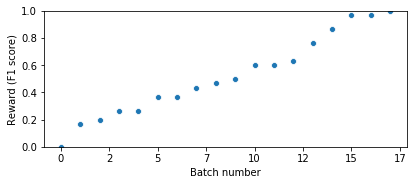

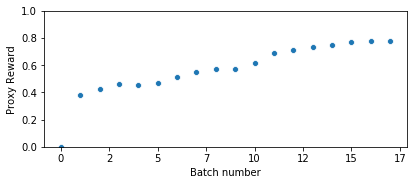

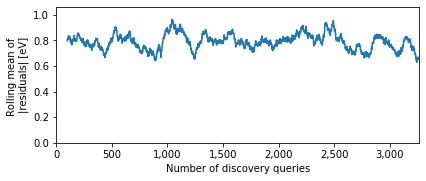

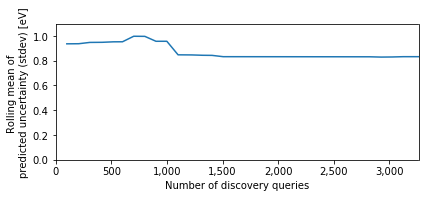

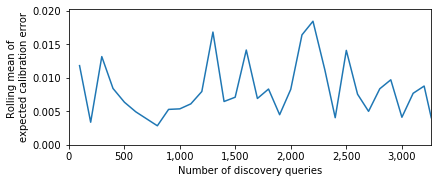

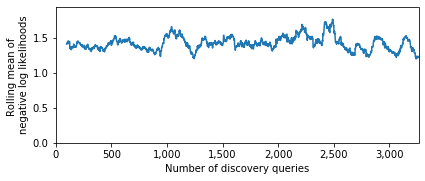

In [7]:
reward_fig, proxy_fig, accuracy_fig, uncertainty_fig, calibration_fig, nll_fig = discoverer.plot_performance(window=100)